# **Multigap Resistive Plate Chamber**
## *Muon telescope characterization*
### All the exercises and questions are written...
# ***... IN BOLD, ITALICS, UPPERCASE AND THIS SIZE***
---

# **Part 1.a.** FEE and datashape

#### The inner scheme of the detector is as follows. The signals are collected in the extremes of the strips, both *Front* and *Back*.

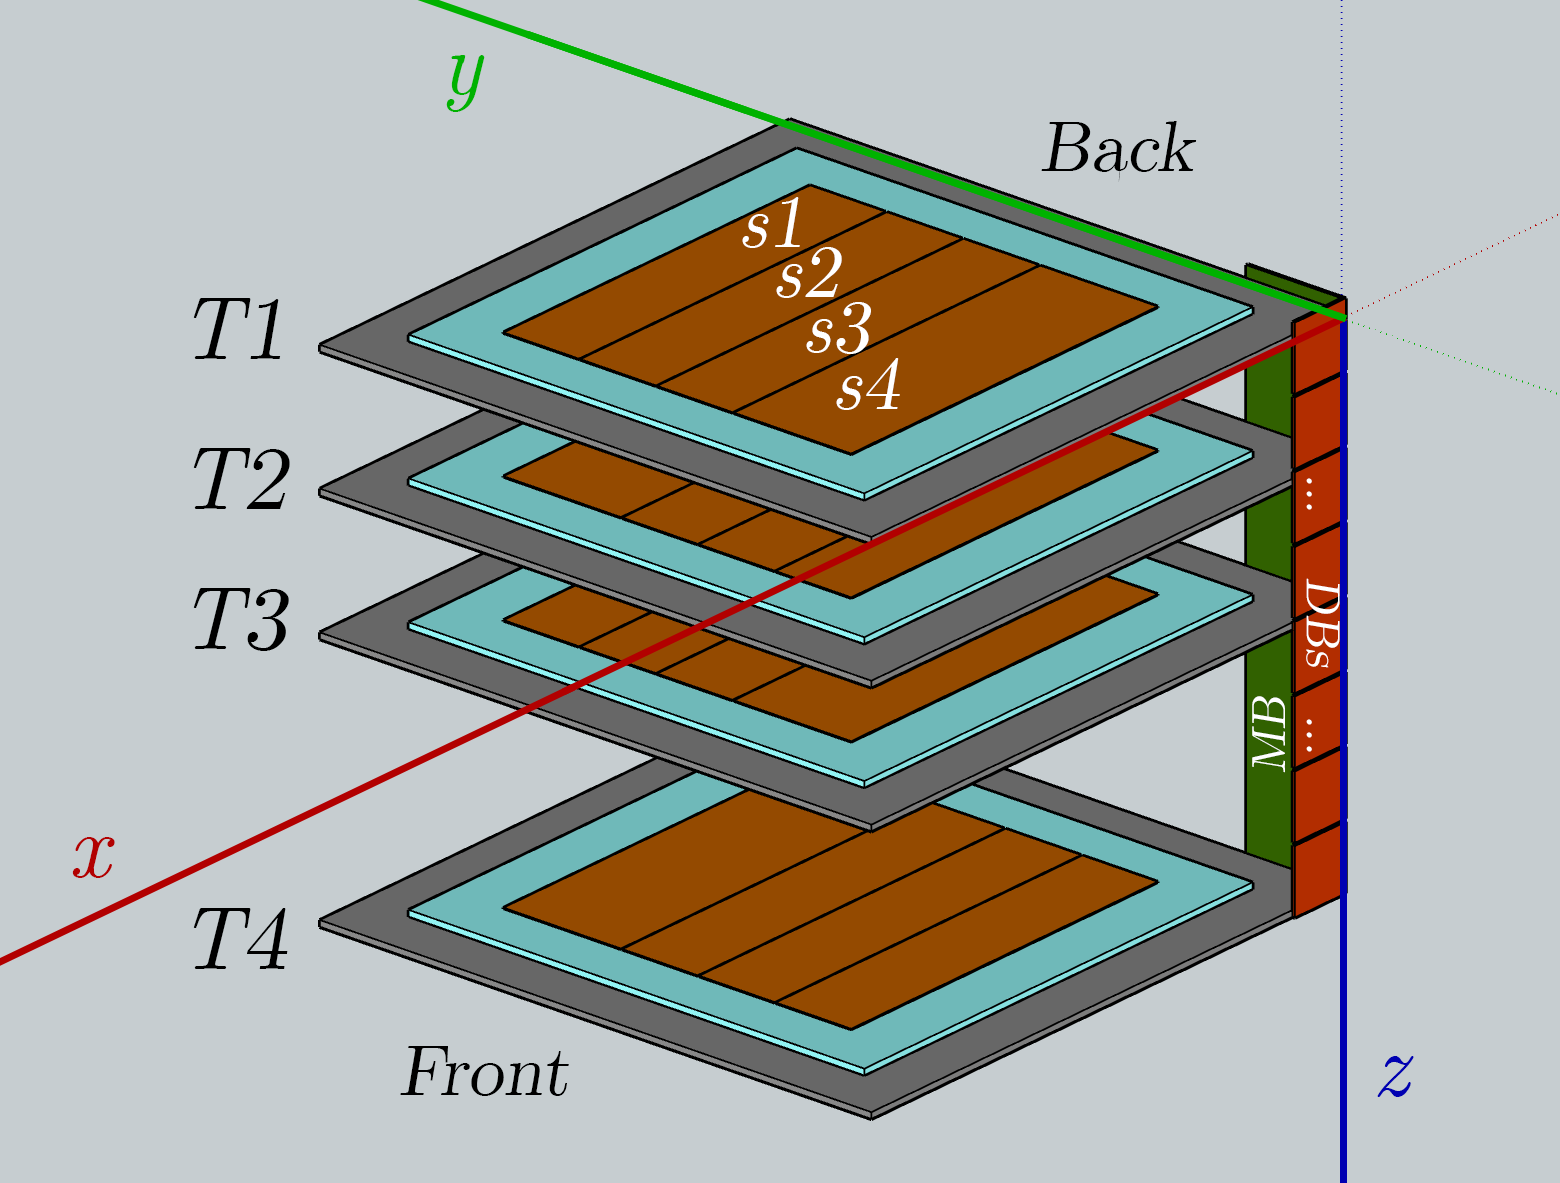

#### The physical RPC signal collected in the strip travels to both sides, where it is collected, and follows this scheme:

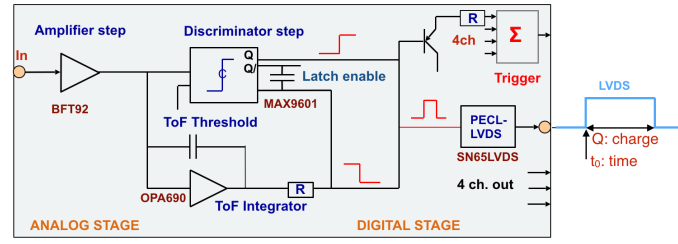

#### Let's see how those values are digitized.

## Import the repository with the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the desired directory in your Google Drive
import os
os.chdir("/content/drive/My Drive") # You can change this to any other directory

# Clone the repository
!git clone https://github.com/cayesoneira/MRPC_DRD1_2024.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'MRPC_DRD1_2024'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 74 (delta 17), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 12.49 MiB | 5.15 MiB/s, done.
Resolving deltas: 100% (17/17), done.


## Access the data

In [2]:
from google.colab import drive
import os

# Assuming the file you want to read is within the cloned repository
file_path = "/content/drive/My Drive/MRPC_DRD1_2024/DATA/event_file.txt"  # Replace with the actual file path

try:
    with open(file_path, 'r') as file:
        file_content = file.read()
        lines = file_content.splitlines()
        print("\n".join(lines[:5])) # print the first five lines

except FileNotFoundError:
    print(f"File not found at: {file_path}")
    file_content = "" # Assign an empty string to file content if file not found

2024 12 01 21 33 59  1   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 -111.7458 0000.0000  0000.0000 0000.0000 -111.1917 0000.0000   0000.0000 0000.0000 0098.5776 0000.0000  0000.0000 0000.0000 0106.9561 0000.0000   0000.0000 0000.0000 -107.7959 -108.7893  0000.0000 0000.0000 0000.0000 -111.2751   0000.0000 0000.0000 0095.8335 0101.0149  0000.0000 0000.0000 0000.0000 0104.8093
2024 12 01 21 33 59  1   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000

Note the structure of the code: each line is an event, containing info for all the signal values in each channel. 32 channels, from each one comes one time and charge value, so in total 64 signal columns. Also, in the left, time and trigger type (1 means coincidence).

**All the signal values are in ns, even charge, which is ToT ns.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(file_path, sep='\s+', header=None, nrows=None)
data.columns = ['year', 'month', 'day', 'hour', 'minute', 'second'] + [f'column_{i}' for i in range(6, len(data.columns))]
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])

column_indices = {
    'T1_F': range(55, 59), 'T1_B': range(59, 63), 'Q1_F': range(63, 67), 'Q1_B': range(67, 71),
    'T2_F': range(39, 43), 'T2_B': range(43, 47), 'Q2_F': range(47, 51), 'Q2_B': range(51, 55),
    'T3_F': range(23, 27), 'T3_B': range(27, 31), 'Q3_F': range(31, 35), 'Q3_B': range(35, 39),
    'T4_F': range(7, 11), 'T4_B': range(11, 15), 'Q4_F': range(15, 19), 'Q4_B': range(19, 23)
}

# Extract and assign appropriate column names
columns_data = {'datetime': data['datetime'].values}
for key, idx_range in column_indices.items():
    for i, col_idx in enumerate(idx_range):
        column_name = f'{key}_{i+1}'
        columns_data[column_name] = data.iloc[:, col_idx].values

# Create a DataFrame from the columns data
df = pd.DataFrame(columns_data)
print(df.columns)

Index(['datetime', 'T1_F_1', 'T1_F_2', 'T1_F_3', 'T1_F_4', 'T1_B_1', 'T1_B_2',
       'T1_B_3', 'T1_B_4', 'Q1_F_1', 'Q1_F_2', 'Q1_F_3', 'Q1_F_4', 'Q1_B_1',
       'Q1_B_2', 'Q1_B_3', 'Q1_B_4', 'T2_F_1', 'T2_F_2', 'T2_F_3', 'T2_F_4',
       'T2_B_1', 'T2_B_2', 'T2_B_3', 'T2_B_4', 'Q2_F_1', 'Q2_F_2', 'Q2_F_3',
       'Q2_F_4', 'Q2_B_1', 'Q2_B_2', 'Q2_B_3', 'Q2_B_4', 'T3_F_1', 'T3_F_2',
       'T3_F_3', 'T3_F_4', 'T3_B_1', 'T3_B_2', 'T3_B_3', 'T3_B_4', 'Q3_F_1',
       'Q3_F_2', 'Q3_F_3', 'Q3_F_4', 'Q3_B_1', 'Q3_B_2', 'Q3_B_3', 'Q3_B_4',
       'T4_F_1', 'T4_F_2', 'T4_F_3', 'T4_F_4', 'T4_B_1', 'T4_B_2', 'T4_B_3',
       'T4_B_4', 'Q4_F_1', 'Q4_F_2', 'Q4_F_3', 'Q4_F_4', 'Q4_B_1', 'Q4_B_2',
       'Q4_B_3', 'Q4_B_4'],
      dtype='object')


So the data is loaded in a dataframe.

---

# **Part 1.b.** Knowing the variables

# ***HISTOGRAM ONE TIME COLUMN DATA***

# ***HISTOGRAM ONE CHARGE COLUMN DATA***

# **What can we do with these magnitudes?** Position, time and charge calculations and calibrations.

A simple linear combination of the avaliable data gives the magnitudes of interest. For the times:

$$\frac{T_{F} \pm T_{B} }{2}$$

And for the charges:
$$\frac{Q_{F} \pm Q
_{B} }{2}$$

In [4]:
# For plane 2 and strip 2
T_F = df['T2_F_2']
T_B = df['T2_B_2']
Q_F = df['Q2_F_2']
Q_B = df['Q2_B_2']

T_diff = (T_F - T_B) / 2
T_sum = (T_F + T_B) / 2
Q_diff = (Q_F - Q_B) / 2
Q_sum = (Q_F + Q_B) / 2

## Calculating $X$

The relation is:

$$X_{M, s} = \frac{T^{F}_{M, s} - T^{B}_{M, s} }{2} \cdot V_{\mathrm{strip}} + \varepsilon_{T},$$

where $V_{\mathrm{strip}}$ is the velocity of the signal in the strip and $\varepsilon$ is a translation to correct for the different lengths of the cables.

Time difference is:

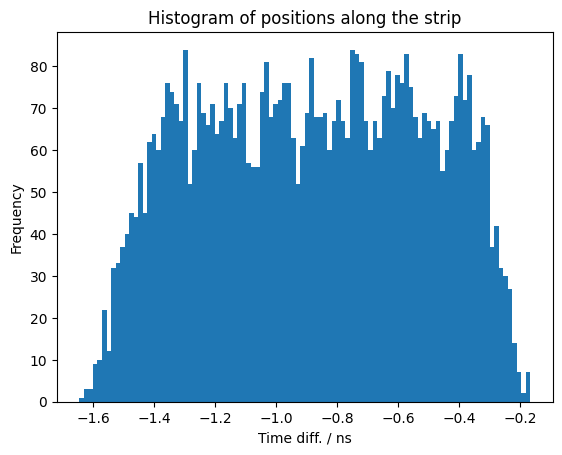

In [5]:
v = T_diff

# Remove all the zero elements in the vector and outliers
w = v
w = w[w != 0]
Q1 = w.quantile(0.25)
Q3 = w.quantile(0.75)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=100)
plt.xlabel('Time diff. / ns')
plt.ylabel('Frequency')
plt.title('Histogram of positions along the strip')
plt.show()

# ***MODIFY $V_{strip}$ and $\varepsilon$ TO MATCH THE SIZE OF THE STRIP (300 mm) AND SET THE CENTER OF THE STRIP AT 0 mm SO THE RANGE IS (-150 mm, 150 mm)***

In [6]:
v_strip = 1
eps = 0

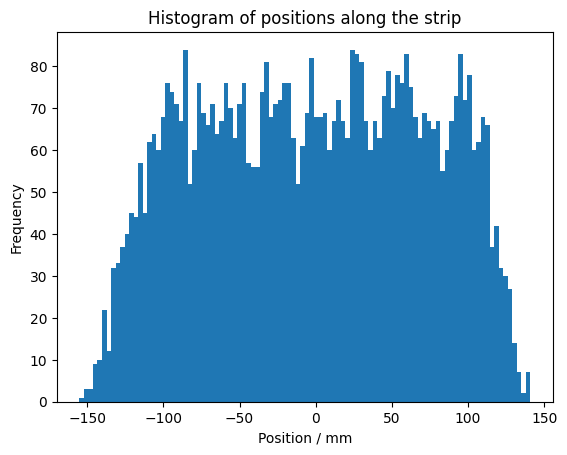

In [7]:
v = T_diff
v = v[v != 0]
v_cal = (v + eps) * v_strip

# Remove all the zero elements in the vector and outliers
w = v_cal
w = w[w != 0]
Q1 = w.quantile(0.25)
Q3 = w.quantile(0.75)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=100)
plt.xlabel('Position / mm')
plt.ylabel('Frequency')
plt.title('Histogram of positions along the strip')
plt.show()

# ***CREATE A SMALL FUNCTION TO CALCULATE $\varepsilon_{T}$ GIVEN THE DATA COLUMN***

## Calculating incident time, $T_{0}$

The time of incidence of a particle to the plane is directly related with the half-sum of times. We will further study this below. For the moment, see the histogram, which shows only relative times.

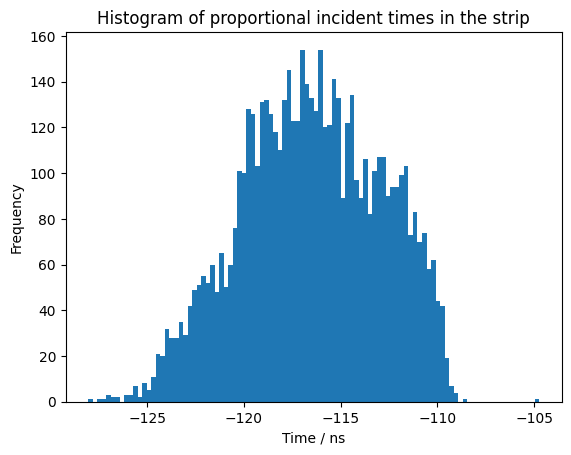

In [8]:
w = T_sum

w = w[w != 0]
Q1 = w.quantile(0.25)
Q3 = w.quantile(0.75)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

plt.hist(w, bins=100)
plt.xlabel('Time / ns')
plt.ylabel('Frequency')
plt.title('Histogram of proportional incident times in the strip')
plt.show()

## Calculating mean charge in a strip, $Q$

The mean charge between both sides of the strip is relevant to study the amount of charge produced by the muon in the ionizationand subsequent exponential amplification.

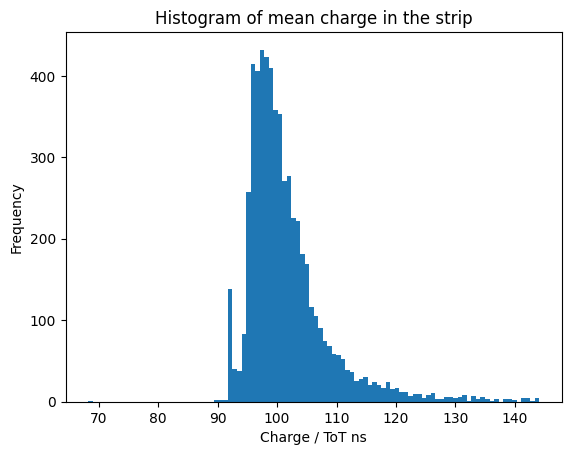

In [9]:
w = Q_sum

w = w[w != 0]
Q1 = w.quantile(0.25)
Q3 = w.quantile(0.95)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=100)
plt.xlabel('Charge / ToT ns')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.title('Histogram of mean charge in the strip')
plt.show()

**Note that there are actually several regions in the charge spectrum, being the most remarkable:**
- **Crosstalk charge:** leakage between strips that are parallel.
- **Avalanche region:** average phenomena inside of the RPC.
- **Streamer region:** bigger charge multiplication.

Streamers are bigger avalanches, often followed by a precursor one. The following figure was obtained from *Study of streamer development in Resistive Plate Chamber*, J. Datta, (DOI:10.1088/1748-0221/15/12/C12006).

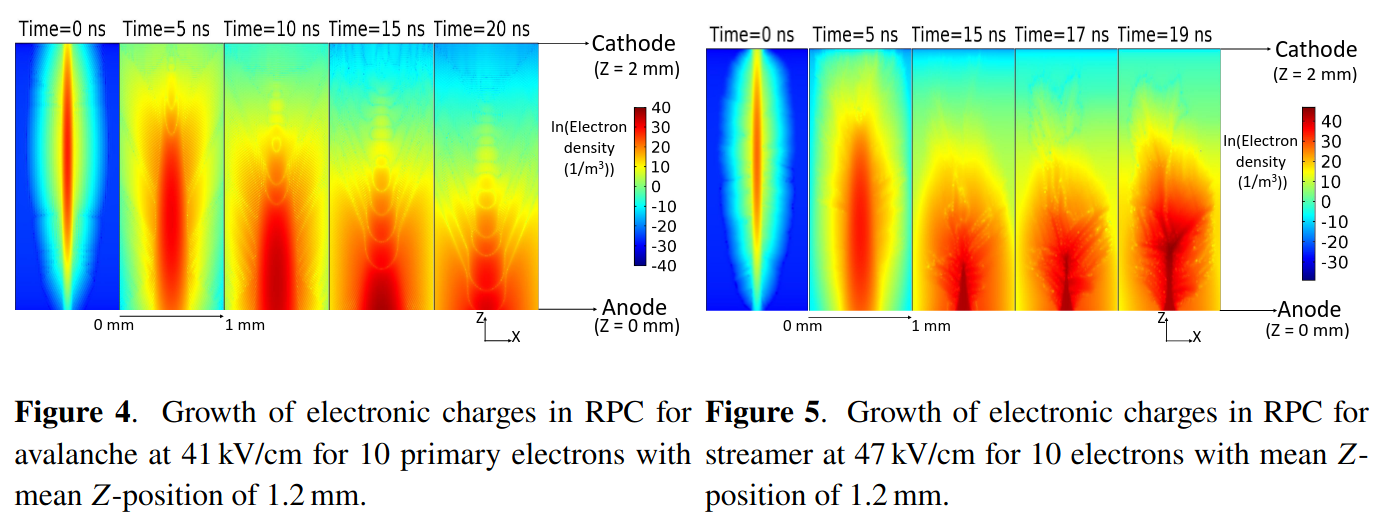

The calibration of charge consists on a simple translation to put close to 0 the crosstalk region. Also ToT ns could be transformed into pC, but since the relation is almost linear, we keep working with arbitrary units.

$$Q_{\mathrm{cal}} = Q + \varepsilon_{Q}$$

# ***SELECT $\varepsilon_{Q}$ TO PUT THE ORIGIN TO THE LEFT OF THE FIRST PEAK***

In [10]:
eps = 0

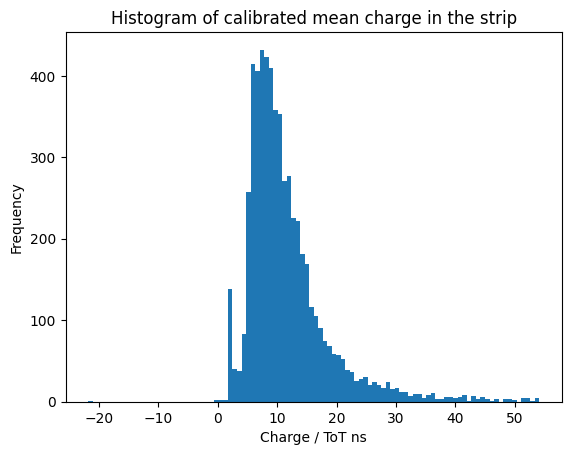

In [11]:
w = Q_sum
w = w[w != 0]
w = w + eps
Q1 = w.quantile(0.25)
Q3 = w.quantile(0.95)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=100)
plt.xlabel('Charge / ToT ns')
plt.ylabel('Frequency')
plt.title('Histogram of calibrated mean charge in the strip')
plt.show()

# ***OPTIONAL: CREATE A FUNCTION TO RETRIEVE $\varepsilon_{Q}$***

## Calculating charge difference, $Q_{\mathrm{diff}}$

The difference of charges indicates the quality of the measurement: different charges indicate problems.

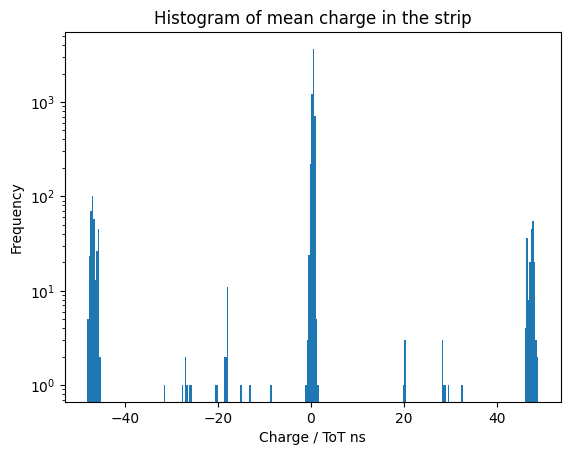

In [12]:
w = Q_diff

w = w[w != 0]
Q1 = w.quantile(0.02)
Q3 = w.quantile(0.98)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=300)
plt.xlabel('Charge / ToT ns')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Histogram of mean charge in the strip')
plt.show()

Let's look closer into the central positions:

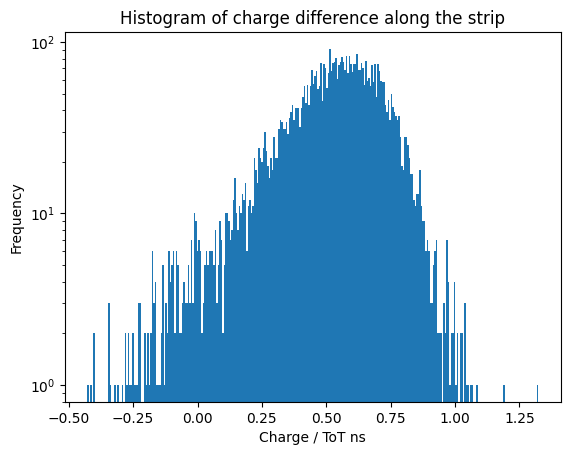

In [13]:
w = Q_diff

w = w[w != 0]
Q1 = w.quantile(0.15)
Q3 = w.quantile(0.85)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=300)
plt.xlabel('Charge / ToT ns')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Histogram of charge difference along the strip')
plt.show()

#### This part defined the main magnitudes of interest for the telescope.

# ***CREATE SOME SCATTER PLOTS OF THE SUMS AND DIFFS RELATED ONE WITH EACH OTHER. SEARCH FOR CORRELATIONS AND POSSIBLE NEEDED CORRECTIONS.***

---

# Part 1.b. Timing performance of the RPCs
RPCs are detectors known for its good performance in large areas. Even though this detector is small, and has not been designed for timing, the resolution is still good, as we may see.

Let's choose two strips in different planes, for example the middle ones, since they will have more statistics (because of acceptance).

We will, in the same process, calibrate the time of incidence for two strips.

We need $X$ and the time of incidence, $$T_{0} = \frac{T_{F} + T_{B}}{2}$$ to correct for different positions along the strip.

In [14]:
plane_top = 1
plane_bot = 4

X_top = ( df[f'T{plane_top}_F_2'] - df[f'T{plane_top}_B_2'] ) / 2 * 200
X_bot = ( df[f'T{plane_bot}_F_2'] - df[f'T{plane_bot}_B_2'] ) / 2 * 200

T_top = ( df[f'T{plane_top}_F_2'] + df[f'T{plane_top}_B_2'] ) / 2
T_bot = ( df[f'T{plane_bot}_F_2'] + df[f'T{plane_bot}_B_2'] ) / 2

Calibrate both X distributions:

In [ ]:
eps_top = 0
eps_bot = 0

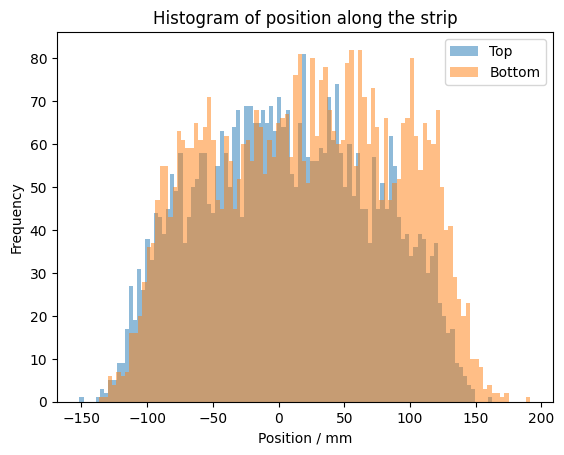

In [15]:
w = X_top
z = X_bot

w = w[w != 0]
Q1 = w.quantile(0.15)
Q3 = w.quantile(0.85)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

z = z[z != 0]
Q1 = z.quantile(0.15)
Q3 = z.quantile(0.85)
IQR = Q3 - Q1
z = z[(z >= Q1 - 1.5 * IQR) & (z <= Q3 + 1.5 * IQR)]

w = w + eps_top
z = z + eps_bot

# Plot
plt.hist(w, bins=100, alpha = 0.5, label='Top')
plt.hist(z, bins=100, alpha = 0.5, label='Bottom')
plt.xlabel('Position / mm')
plt.ylabel('Frequency')
plt.legend()
#plt.yscale('log')
plt.title('Histogram of position along the strip')
plt.show()

Now filter only the columns that have reasonable values in the position along the strip:

In [16]:
# Apply the calibration
X_top_cal = X_top + (eps_top * (X_top != 0))
X_bot_cal = X_bot + (eps_bot * (X_bot != 0))

# Remove outliers
cond = (abs(X_top_cal) < 150) & (abs(X_bot_cal) < 150)
X_top_filt = X_top_cal[cond]
X_bot_filt = X_bot_cal[cond]
T_top_filt = T_top[cond]
T_bot_filt = T_bot[cond]

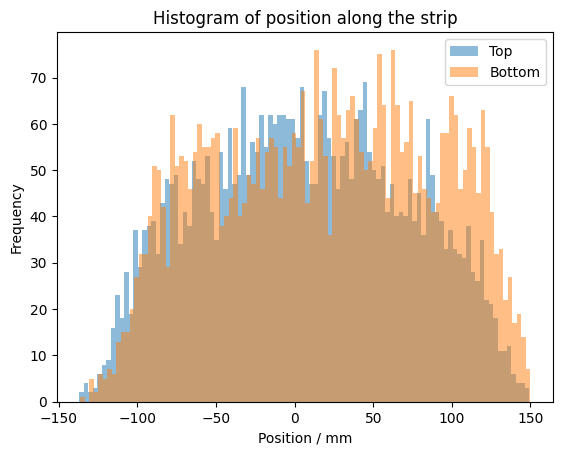

In [17]:
w = X_top_filt
z = X_bot_filt

w = w[w != 0]
Q1 = w.quantile(0.15)
Q3 = w.quantile(0.85)
IQR = Q3 - Q1
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

z = z[z != 0]
Q1 = z.quantile(0.15)
Q3 = z.quantile(0.85)
IQR = Q3 - Q1
z = z[(z >= Q1 - 1.5 * IQR) & (z <= Q3 + 1.5 * IQR)]

# Plot
plt.hist(w, bins=100, alpha = 0.5, label='Top')
plt.hist(z, bins=100, alpha = 0.5, label='Bottom')
plt.xlabel('Position / mm')
plt.ylabel('Frequency')
plt.legend()
#plt.yscale('log')
plt.title('Histogram of position along the strip')
plt.show()

Now we need to calculate the difference between in times of incidence above and below. To do so, we incorporate the information of X that we have to account for the flying time.

In [18]:
cond = (X_top_filt != 0) & (X_bot_filt != 0) & (T_top_filt != 0) & (T_bot_filt != 0)
X_top_clean = X_top_filt[cond]
X_bot_clean = X_bot_filt[cond]
T_top_clean = T_top_filt[cond]
T_bot_clean = T_bot_filt[cond]

# ***CHOOSE THE LIMITS IN THE CONDITION SO IT FILTERS OUTLIERS***

In [ ]:
lower_bound = -100
upper_bound = 100

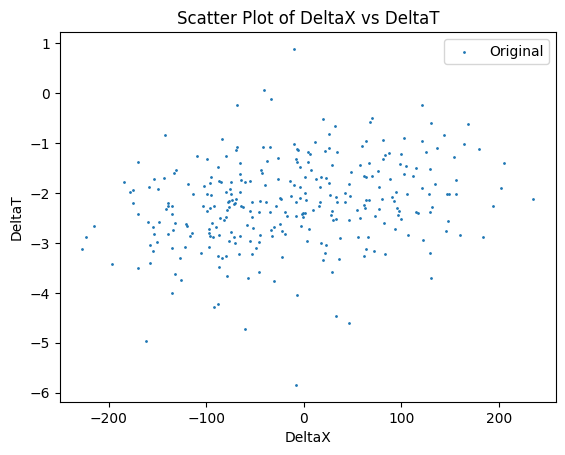

In [19]:
DeltaT = T_top_clean - T_bot_clean
DeltaX = X_top_clean - X_bot_clean

cond = (DeltaT > lower_bound) & (DeltaT < upper_bound)
DeltaT = DeltaT[cond]
DeltaX = DeltaX[cond]

# Scatter plot 2D
plt.scatter(DeltaX, DeltaT, s = 1, label = 'Original')
plt.xlabel('DeltaX')
plt.ylabel('DeltaT')
plt.legend()
plt.title('Scatter Plot of DeltaX vs DeltaT')
plt.show()

Now let's take into account the flight time of the particle from one strip to the other:

$\Delta X$ is stored, $\Delta Y$ and $\Delta Z$ are given by the geometry of the telescope.

If the particle travels at the speed of light, $c = 300\ \mathrm{mm/ns}$, then the total travel time is:

$$t = 1/c \cdot \sqrt{ (\Delta X)^{2} + (\Delta Y)^{2} + (\Delta Z)^{2} }$$

# ***MEASURE THE VALUE OF $\Delta Y$ AND $\Delta Z$ AND PUT THEM IN THE CALCULATION BELOW***

In [20]:
dY = 0
dZ = 0

In [21]:
c = 300 # mm/ns
DeltaY = 0*DeltaX + dY
DeltaZ = 0*DeltaX + dZ
t = np.sqrt( DeltaX**2 + DeltaY**2 + DeltaZ**2 ) / c

print(t.describe())

count    301.000000
mean       0.265553
std        0.174420
min        0.001667
25%        0.116033
50%        0.249467
75%        0.391000
max        0.784500
dtype: float64


And the time delay can be corrected using the flight time for different points in the strip:

In [22]:
timing = DeltaT - t

Ready to plot

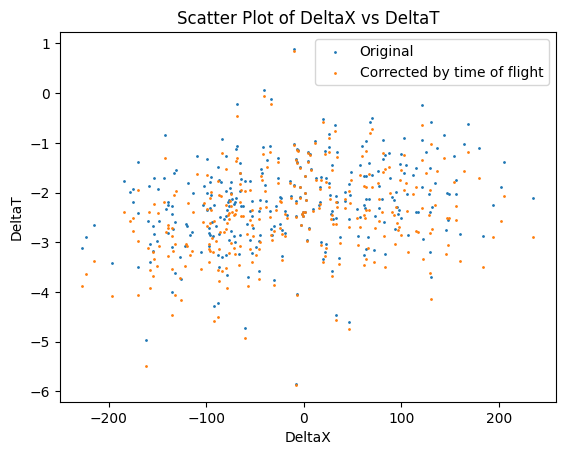

In [23]:
plt.scatter(DeltaX, DeltaT, s = 1, label = 'Original')
plt.scatter(DeltaX, timing, s = 1, label = 'Corrected by time of flight')
plt.xlabel('DeltaX')
plt.ylabel('DeltaT')
plt.legend()
plt.title('Scatter Plot of DeltaX vs DeltaT')
plt.show()

So finally the timing can be calculated:

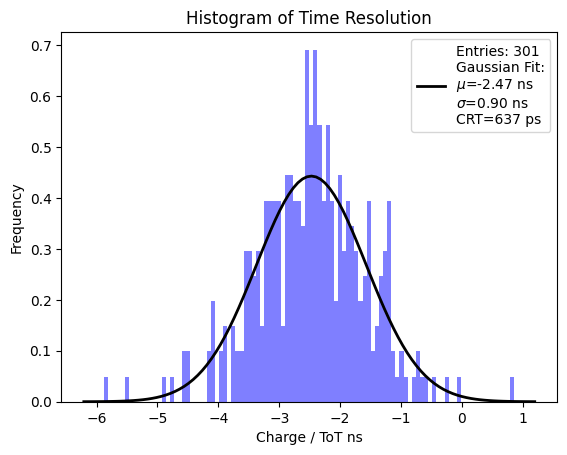

In [24]:
from scipy.stats import norm

# Assuming 'timing' is a numpy array or pandas Series with time resolution data
w = timing

w = w[w != 0]
Q1 = w.quantile(0.15)  # 15th percentile
Q3 = w.quantile(0.85)  # 85th percentile
IQR = Q3 - Q1          # Interquartile range
w = w[(w >= Q1 - 1.5 * IQR) & (w <= Q3 + 1.5 * IQR)]

plt.hist(w, bins=100, density=True, alpha=0.5, color='b')
mu, std = norm.fit(w)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Entries: {len(w)}\nGaussian Fit:\n$\mu$={mu:.2f} ns\n$\sigma$={std:.2f} ns\nCRT={std/np.sqrt(2)*1000:.3g} ps')
plt.xlabel('Charge / ToT ns')
plt.ylabel('Frequency')
plt.title('Histogram of Time Resolution')
plt.legend()
plt.show()

---
---
# **Part 2.** Event dataflow

### Once we are familiar with the datashape, we can start working on the dataflow.

## Access the data

In [25]:
from google.colab import drive
import os

try:
    with open(file_path, 'r') as file:
        file_content = file.read()
        lines = file_content.splitlines()
        print("\n".join(lines[:5])) # print the first five lines

except FileNotFoundError:
    print(f"File not found at: {file_path}")
    file_content = "" # Assign an empty string to file content if file not found

2024 12 01 21 33 59  1   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 -111.7458 0000.0000  0000.0000 0000.0000 -111.1917 0000.0000   0000.0000 0000.0000 0098.5776 0000.0000  0000.0000 0000.0000 0106.9561 0000.0000   0000.0000 0000.0000 -107.7959 -108.7893  0000.0000 0000.0000 0000.0000 -111.2751   0000.0000 0000.0000 0095.8335 0101.0149  0000.0000 0000.0000 0000.0000 0104.8093
2024 12 01 21 33 59  1   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000  0000.0000 0000.0000 0000.0000 0000.0000   0000.0000 0000.0000 0000.0000 0000.0000

# Parameter and function definition

In [26]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.constants import c
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy.linalg as linalg
from math import sqrt
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
import os

# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# Header ----------------------------------------------------------------------
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# Execution options -----------------------------------------------------------
# -----------------------------------------------------------------------------

# Plots and savings -------------------------
create_plots = True
save_plots = False
show_plots = True
create_pdf = False
limit = False
limit_number = 10000
number_of_time_cal_figures = 5
save_calibrations = False
presentation = False
save_figures = False
force_replacement = True # Creates a new datafile even if there is already one that looks complete
article_format = False
residual_plots = True

# Charge front-back
charge_front_back = False

# Y position -------------------------
y_position_complex_method = True

# Time calibration
time_calibration = True

# RPC variables
weighted = False

# TimTrack -------------------------
fixed_speed = False
res_ana_removing_planes = False
timtrack_iteration = False
number_of_TT_executions = 2
plot_three_planes = False

# -----------------------------------------------------------------------------
# Filters ---------------------------------------------------------------------
# -----------------------------------------------------------------------------

# General -------------------------

# Qsum
Q_left_pre_cal = 80
Q_right_pre_cal = 400
# Qdif
Q_diff_pre_cal_threshold = 5
# Tsum
T_sum_left_pre_cal = -130
T_sum_right_pre_cal = -105
# Tdif
T_diff_pre_cal_threshold = 5

# Qsum
Q_sum_left_cal = -5
Q_sum_right_cal = 300
# Qdif
Q_diff_cal_threshold = 5
# Tsum
# ...
# Tdif
T_diff_cal_threshold = 2


# Once calculated the RPC variables
T_sum_RPC_left = -130
T_sum_RPC_right = -100
T_diff_RPC_left = -1
T_diff_RPC_right = 1
Q_RPC_left = 0
Q_RPC_right = 250
Y_RPC_left = -150
Y_RPC_right = 150

# TimTrack filter -------------------------
pos_filter = 500
proj_filter = 1.6
t0_left_filter = -130
t0_right_filter = -105
slowness_filter_left = -0.01
slowness_filter_right = 0.02 # 0.025
charge_strip_left_filter = 0
charge_strip_right_filter = 100
charge_event_left_filter = 0
charge_event_right_filter = 120

res_ystr_filter = 50
res_tsum_filter = 1
res_tdif_filter = 0.1


# -----------------------------------------------------------------------------
# Calibrations ----------------------------------------------------------------
# -----------------------------------------------------------------------------

# General
calibrate_strip_T_percentile = 15
calibrate_strip_Q_percentile = 20
calibrate_strip_Q_FB_percentile = 5

# Time sum
CRT_gaussian_fit_quantile = 0.03
strip_time_diff_bound = 10

# Front-back charge
distance_sum_charges_left_fit = -5
distance_sum_charges_right_fit = 200
distance_diff_charges_up_fit = 5
distance_diff_charges_low_fit = -5
distance_sum_charges_plot = 800
front_back_fit_threshold = 4 # It was 1.4

# Time dif calibration (time_dif_reference)
time_dif_distance = 10
time_dif_reference = np.array([
    [-0.0573, 0.031275, 1.033875, 0.761475],
    [-0.914, -0.873975, -0.19815, 0.452025],
    [0.8769, 1.2008, 1.014, 2.43915],
    [1.508825, 2.086375, 1.6876, 3.023575]
])

# Charge sum calibration (charge_sum_reference)
charge_sum_distance = 10
charge_sum_reference = np.array([
    [89.4319, 98.19605, 95.99055, 91.83875],
    [96.55775, 94.50385, 94.9254, 91.0775],
    [92.12985, 92.23395, 90.60545, 95.5214],
    [93.75635, 93.57425, 93.07055, 89.27305]
])

# Charge dif calibration (charge_dif_reference)
charge_dif_distance = 10
charge_dif_reference = np.array([
    [4.512, 0.58715, 1.3204, -1.3918],
    [-4.50885, 0.918, -3.39445, -0.12325],
    [-3.8931, -3.28515, 3.27295, 1.0554],
    [-2.29505, 0.012, 2.49045, -2.14565]
])

time_sum_distance = 10
time_sum_reference = np.array([
    [0.0, -0.3886208, -0.53020947, 0.33711737],
    [-0.80494094, -0.68836069, -2.01289387, -1.13481931],
    [-0.23899338, -0.51373738, 0.50845317, 0.11685095],
    [0.33586285, 1.08329847, 0.91410244, 0.58815813]
])

# -----------------------------------------------------------------------------
# Variables to modify ---------------------------------------------------------
# -----------------------------------------------------------------------------

beta = 0.99 # Given the last fitting of slowness

anc_sy = 30
anc_sts = 0.28
anc_std = 0.03

# Old ones
# anc_sy = 40
# anc_sts = 0.3
# anc_std = 0.05

# Y position parameters
transf_exp = 1
induction_section = 30  # 40 In mm. Width of the induction section for all strips
threshold = 15  # Not a real distance. Adjust this value as needed for "closeness"

# -----------------------------------------------------------------------------
# Variables to not touch unless necessary -------------------------------------
# -----------------------------------------------------------------------------

fig_idx = 1
plot_list = []

# Front-back charge
output_order = 0
degree_of_polynomial = 4

y_widths = [np.array([63, 63, 63, 98]), np.array([98, 63, 63, 63])]  # T1-T3 and T2-T4 widths
z_positions = np.array([0, 150, 310, 345.5])  # In mm
def y_pos(y_width):
    return np.cumsum(y_width) - (np.sum(y_width) + y_width) / 2
y_pos_T = [y_pos(y_widths[0]), y_pos(y_widths[1])]
yz_big = np.array([[[y, z] for y in y_pos_T[i % 2]] for i, z in enumerate(z_positions)])

# This has to be replaced in the inner code
y_width_T1_and_T3 = y_widths[0]
y_width_T2_and_T4 = y_widths[1]
y_pos_T1_and_T3 = y_pos(y_width_T1_and_T3)
y_pos_T2_and_T4 = y_pos(y_width_T2_and_T4)

c_mm_ns = c/1000000
muon_speed = beta * c_mm_ns
strip_speed = 2/3 * c_mm_ns # 200 mm/ns

# Efficiency calculation
strip_length = 300
transversal_length = np.sum(y_widths[0])
scale_factor_x = 1
scale_factor_y = 1
strip_length_fiducial = strip_length * scale_factor_x
transversal_length_fiducial = transversal_length * scale_factor_y

# Timtrack parameters
vc    = beta * c_mm_ns #mm/ns
sc    = 1/vc
ss    = 1/strip_speed # slowness of the signal in the strip
cocut = 1  # convergence cut
d0    = 10 # initial value of the convergence parameter
nplan = 4
lenx  = strip_length


# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# Function definition ---------------------------------------------------------
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------

# Calibration functions
def calibrate_strip_T(column):
    q = calibrate_strip_T_percentile
    mask = (column < T_diff_pre_cal_threshold) & (column > -T_diff_pre_cal_threshold)
    column = column[mask]
    column = column[column != 0]
    column = column[(np.percentile(column, q) < column) & (column < np.percentile(column, 100 - q))]
    column = column[(np.percentile(column, q) < column) & (column < np.percentile(column, 100 - q))]
    column = column[(np.percentile(column, q) < column) & (column < np.percentile(column, 100 - q))]
    offset = np.median([np.min(column), np.max(column)])
    return offset

def calibrate_strip_Q(Q_sum):
    q = calibrate_strip_Q_percentile
    mask_Q = (Q_sum != 0)
    Q_sum = Q_sum[mask_Q]
    mask_Q = (Q_sum > Q_left_pre_cal) & (Q_sum < Q_right_pre_cal)
    Q_sum = Q_sum[mask_Q]
    Q_sum = Q_sum[Q_sum > np.percentile(Q_sum, q)]
    mean = np.mean(Q_sum)
    std = np.std(Q_sum)
    Q_sum = Q_sum[ abs(Q_sum - mean) < std ]
    offset = np.min(Q_sum)
    return offset

def calibrate_strip_Q_FB(Q_F, Q_B):
    q = calibrate_strip_Q_FB_percentile

    mask_Q = (Q_F != 0)
    Q_F = Q_F[mask_Q]
    mask_Q = (Q_F > Q_left_pre_cal) & (Q_F < Q_right_pre_cal)
    Q_F = Q_F[mask_Q]
    Q_F = Q_F[Q_F > np.percentile(Q_F, q)]
    mean = np.mean(Q_F)
    std = np.std(Q_F)
    Q_F = Q_F[ abs(Q_F - mean) < std ]
    offset_F = np.min(Q_F)

    mask_Q = (Q_B != 0)
    Q_B = Q_B[mask_Q]
    mask_Q = (Q_B > Q_left_pre_cal) & (Q_B < Q_right_pre_cal)
    Q_B = Q_B[mask_Q]
    Q_B = Q_B[Q_B > np.percentile(Q_B, q)]
    mean = np.mean(Q_B)
    std = np.std(Q_B)
    Q_B = Q_B[ abs(Q_B - mean) < std ]
    offset_B = np.min(Q_B)

    return (offset_F - offset_B) / 2

import builtins
enumerate = builtins.enumerate

def polynomial(x, *coeffs):
    return np.sum(c * x**i for i, c in enumerate(coeffs))

def scatter_2d_and_fit(xdat, ydat, title, x_label, y_label, name_of_file):
    global fig_idx

    ydat_translated = ydat

    xdat_plot = xdat[(xdat < distance_sum_charges_plot) & (xdat > -distance_sum_charges_plot) & (ydat_translated < distance_sum_charges_plot) & (ydat_translated > -distance_sum_charges_plot)]
    ydat_plot = ydat_translated[(xdat < distance_sum_charges_plot) & (xdat > -distance_sum_charges_plot) & (ydat_translated < distance_sum_charges_plot) & (ydat_translated > -distance_sum_charges_plot)]
    xdat_pre_fit = xdat[(xdat < distance_sum_charges_right_fit) & (xdat > distance_sum_charges_left_fit) & (ydat_translated < distance_diff_charges_up_fit) & (ydat_translated > distance_diff_charges_low_fit)]
    ydat_pre_fit = ydat_translated[(xdat < distance_sum_charges_right_fit) & (xdat > distance_sum_charges_left_fit) & (ydat_translated < distance_diff_charges_up_fit) & (ydat_translated > distance_diff_charges_low_fit)]

    # Fit a polynomial of specified degree using curve_fit
    initial_guess = [1] * (degree_of_polynomial + 1)
    coeffs, _ = curve_fit(polynomial, xdat_pre_fit, ydat_pre_fit, p0=initial_guess)
    y_pre_fit = polynomial(xdat_pre_fit, *coeffs)

    # Filter data for fitting based on residues
    threshold = front_back_fit_threshold  # Set your desired threshold here
    residues = np.abs(ydat_pre_fit - y_pre_fit)  # Calculate residues
    xdat_fit = xdat_pre_fit[residues < threshold]
    ydat_fit = ydat_pre_fit[residues < threshold]

    # Perform fit on filtered data
    coeffs, _ = curve_fit(polynomial, xdat_fit, ydat_fit, p0=initial_guess)

    y_mean = np.mean(ydat_fit)
    y_check = polynomial(xdat_fit, *coeffs)
    ss_res = np.sum((ydat_fit - y_check)**2)
    ss_tot = np.sum((ydat_fit - y_mean)**2)
    r_squared = 1 - (ss_res / ss_tot)
    if r_squared < 0.5:
        print(f"---> R**2 in {name_of_file[0:4]}: {r_squared:.2g}")

    if create_plots:
        x_fit = np.linspace(min(xdat_fit), max(xdat_fit), 100)
        y_fit = polynomial(x_fit, *coeffs)

        x_final = xdat_plot
        y_final = ydat_plot - polynomial(xdat_plot, *coeffs)

        plt.close()

        # (16,6) was very nice
        if article_format:
            ww = (10.84, 4)
        else:
            ww = (13.33, 5)

        plt.figure(figsize=ww)  # Use plt.subplots() to create figure and axis
        plt.scatter(xdat_plot, ydat_plot, s=1, label="Original data points")
        # plt.scatter(xdat_pre_fit, ydat_pre_fit, s=1, color="magenta", label="Points for prefitting")
        plt.scatter(xdat_fit, ydat_fit, s=1, color="orange", label="Points for fitting")
        plt.scatter(x_final, y_final, s=1, color="green", label="Calibrated points")
        plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit: ' + ' '.join([f'a{i}={coeff:.2g}' for i, coeff in enumerate(coeffs[::-1])]))

        if not article_format:
            plt.title(f"Fig. {output_order}, {title}")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xlim([-5, 400])
        plt.ylim([-11, 11])

        plt.grid()
        plt.legend(markerscale=5)  # Increase marker scale by 5 times

        plt.tight_layout()
        # plt.savefig(f"{output_order}_{name_of_file}.png", format="png")

        if save_plots:
            name_of_file = 'charge_diff_vs_charge_sum_cal'
            final_filename = f'{fig_idx}_{name_of_file}.png'
            fig_idx += 1
            plot_list.append(final_filename)
            plt.savefig(final_filename, format='png')

        if show_plots: plt.show()
        plt.close()
    return coeffs

def summary_skew(vdat):
    # Calculate the 5th and 95th percentiles
    try:
        percentile_left = np.percentile(vdat, 20)
        percentile_right = np.percentile(vdat, 80)
    except IndexError:
        print("Problem with indices")
        # print(vector)

    # Filter values inside the 5th and 95th percentiles
    vdat = [x for x in vdat if percentile_left <= x <= percentile_right]
    mean = np.mean(vdat)
    std = np.std(vdat)
    skewness = skew(vdat)
    return f"mean = {mean:.2g}, std = {std:.2g}, skewness = {skewness:.2g}"


from scipy.stats import norm

def hist_1d(vdat, bin_number, title, axis_label, name_of_file):
    global fig_idx
    # global save_figures

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)

    # Create histogram without plotting it
    # counts, bins, _ = ax.hist(vdat, bins=bin_number, alpha=0.5, color="red",
    #                           label=f"All hits, {len(vdat)} events, {summary_skew(vdat)}", density=False)

    vdat = np.array(vdat)  # Convert list to NumPy array
    strip_time_diff_bound = 10
    cond = (vdat > -strip_time_diff_bound) & (vdat < strip_time_diff_bound)  # This should result in a boolean array
    vdat = vdat[cond]

    counts, bins, _ = ax.hist(vdat, bins=bin_number, alpha=0.5, color="red",
                              label=f"All hits, {len(vdat)} events", density=False)

    # Calculate bin centers for fitting the Gaussian
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Fit a Gaussian
    h1_q = CRT_gaussian_fit_quantile
    lower_bound = np.quantile(vdat, h1_q)
    upper_bound = np.quantile(vdat, 1 - h1_q)

    cond = (vdat > lower_bound) & (vdat < upper_bound)  # This should result in a boolean array
    vdat = vdat[cond]

    mu, std = norm.fit(vdat)

    # Plot the Gaussian fit
    p = norm.pdf(bin_centers, mu, std) * len(vdat) * (bins[1] - bins[0])  # Scale to match histogram
    label_plot = f'Gaussian fit:\n    $\mu={mu:.2g}$,\n    $\sigma={std:.2g}$\n    CRT$={std/np.sqrt(2)*1000:.3g}$ ps'
    ax.plot(bin_centers, p, 'k', linewidth=2, label=label_plot)

    ax.legend()
    ax.set_title(title)
    plt.xlabel(axis_label)
    plt.ylabel("Counts")
    plt.tight_layout()

    if save_plots:
        name_of_file = 'timing'
        final_filename = f'{fig_idx}_{name_of_file}.png'
        fig_idx += 1
        plot_list.append(final_filename)
        plt.savefig(final_filename, format='png')

    if show_plots: plt.show()
    plt.close()


# Define the combined function to plot histograms and optionally fit Gaussian
def plot_histograms_and_gaussian(df, columns, title, figure_number, quantile=0.99, fit_gaussian=False):
    global fig_idx
    nrows, ncols = (2, 3) if figure_number == 1 else (3, 4)

    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows), constrained_layout=True)
    axs = axs.flatten()

    # Define Gaussian function
    def gaussian(x, mu, sigma, amplitude):
        return amplitude * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

    # Plot histograms and fit Gaussian if needed
    for i, col in enumerate(columns):
        data = df[col].values
        data = data[data != 0]  # Filter out zero values

        # Check if data is empty or has fewer points than needed
        if len(data) == 0:
            # Leave plot empty if no data
            axs[i].text(0.5, 0.5, "No data", transform=axs[i].transAxes, ha='center', va='center', color='gray')
            continue

        # Plot histogram
        hist_data, bin_edges, _ = axs[i].hist(data, bins='auto', alpha=0.75, label='Data')
        axs[i].set_title(col)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

        # Fit Gaussian if needed and if there's enough data
        if fit_gaussian and len(data) >= 10:
            try:
                # Quantile filtering
                lower_bound, upper_bound = np.quantile(data, [(1 - quantile), quantile])
                filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

                if len(filtered_data) < 2:  # Ensure there are enough points to fit a Gaussian
                    axs[i].text(0.5, 0.5, "Not enough data to fit", transform=axs[i].transAxes, ha='center', va='center', color='gray')
                    continue

                # Fit Gaussian to the filtered data
                bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                popt, _ = curve_fit(gaussian, bin_centers, hist_data, p0=[np.mean(filtered_data), np.std(filtered_data), max(hist_data)])
                mu, sigma, amplitude = popt
                x = np.linspace(min(filtered_data), max(filtered_data), 1000)
                axs[i].plot(x, gaussian(x, mu, sigma, amplitude), 'r-', label=f'Gaussian Fit\nμ={mu:.2g}, σ={sigma:.2g}')
                axs[i].legend()
            except (RuntimeError, ValueError):
                axs[i].text(0.5, 0.5, "Fit failed", transform=axs[i].transAxes, ha='center', va='center', color='red')

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle(title, fontsize=16)

    if save_plots:
        final_filename = f'{fig_idx}_{title.replace(" ", "_")}.png'
        fig_idx += 1
        plot_list.append(final_filename)
        plt.savefig(final_filename, format='png')

    if show_plots: plt.show()
    plt.close()


# Data reading

----------------------- Filter 1: by date ----------------------------
Starting date is 2024.12.01_21.33.59.
Datafile found and it is not empty, but 'force_replacement' is True, so it creates new datafiles anyway.


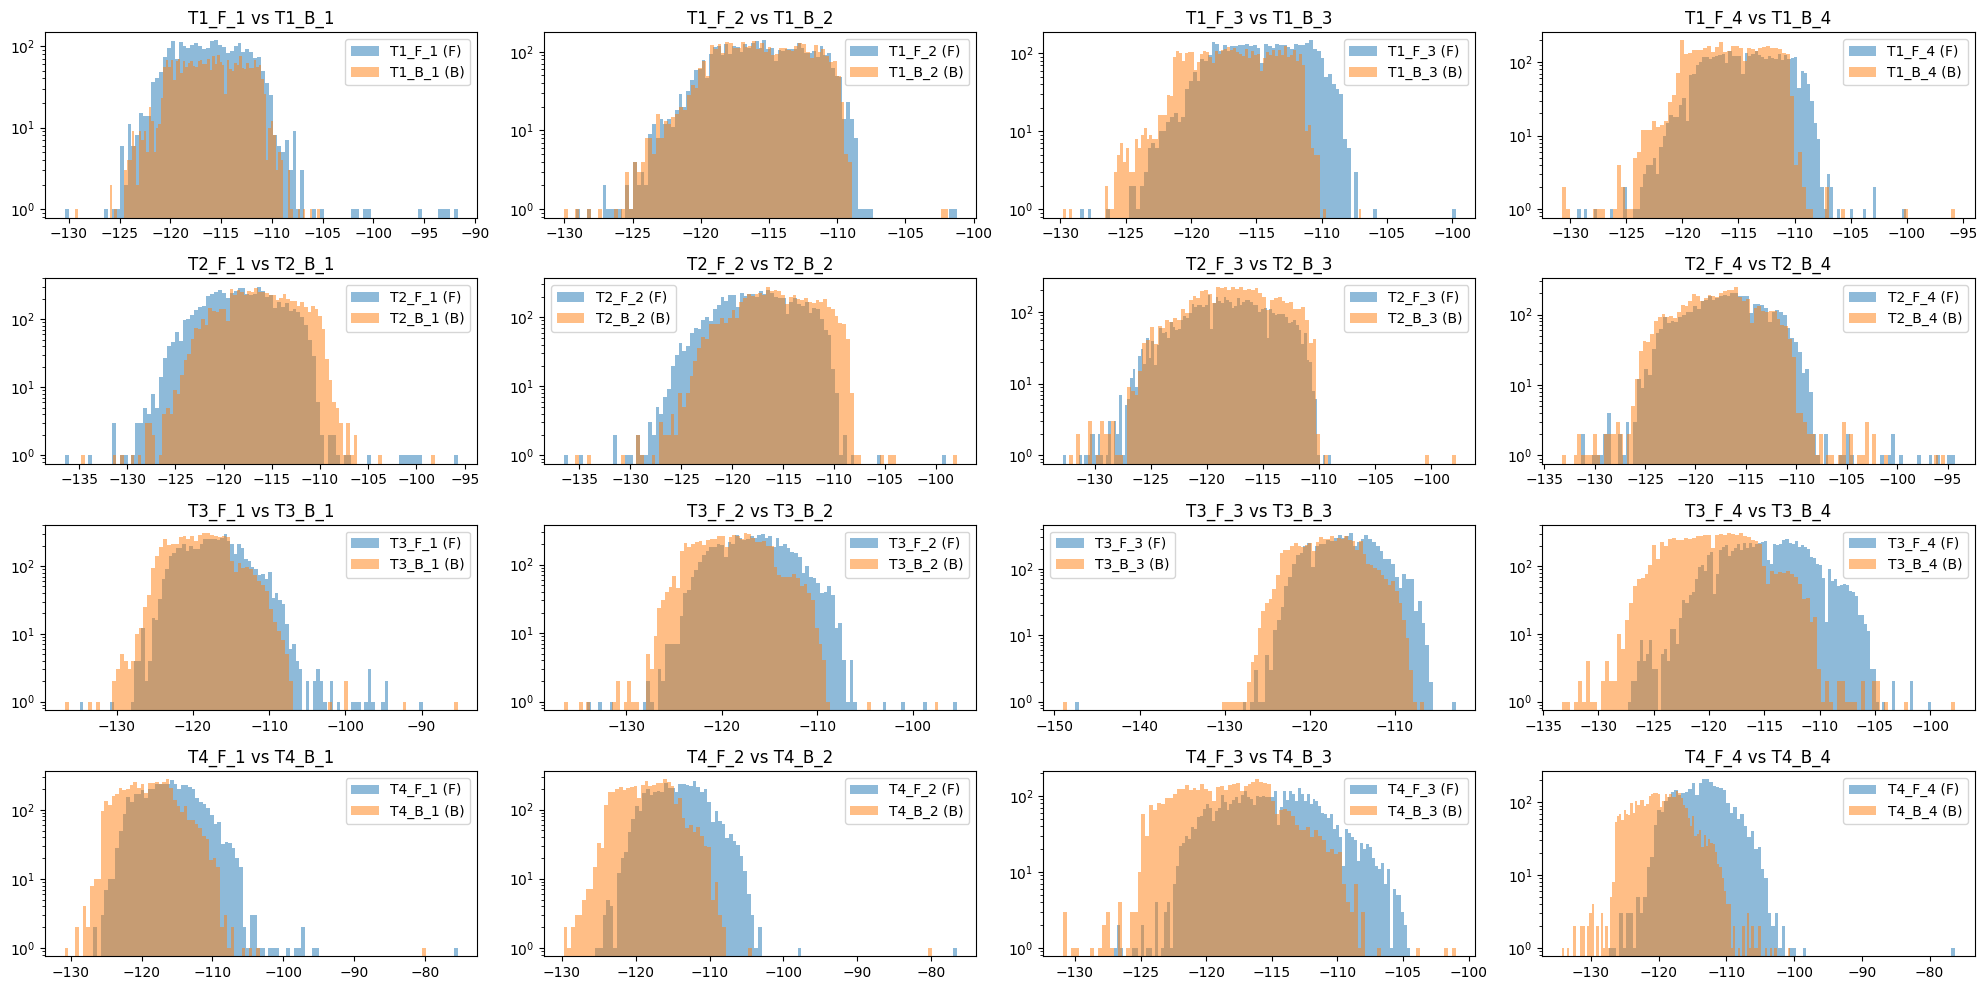

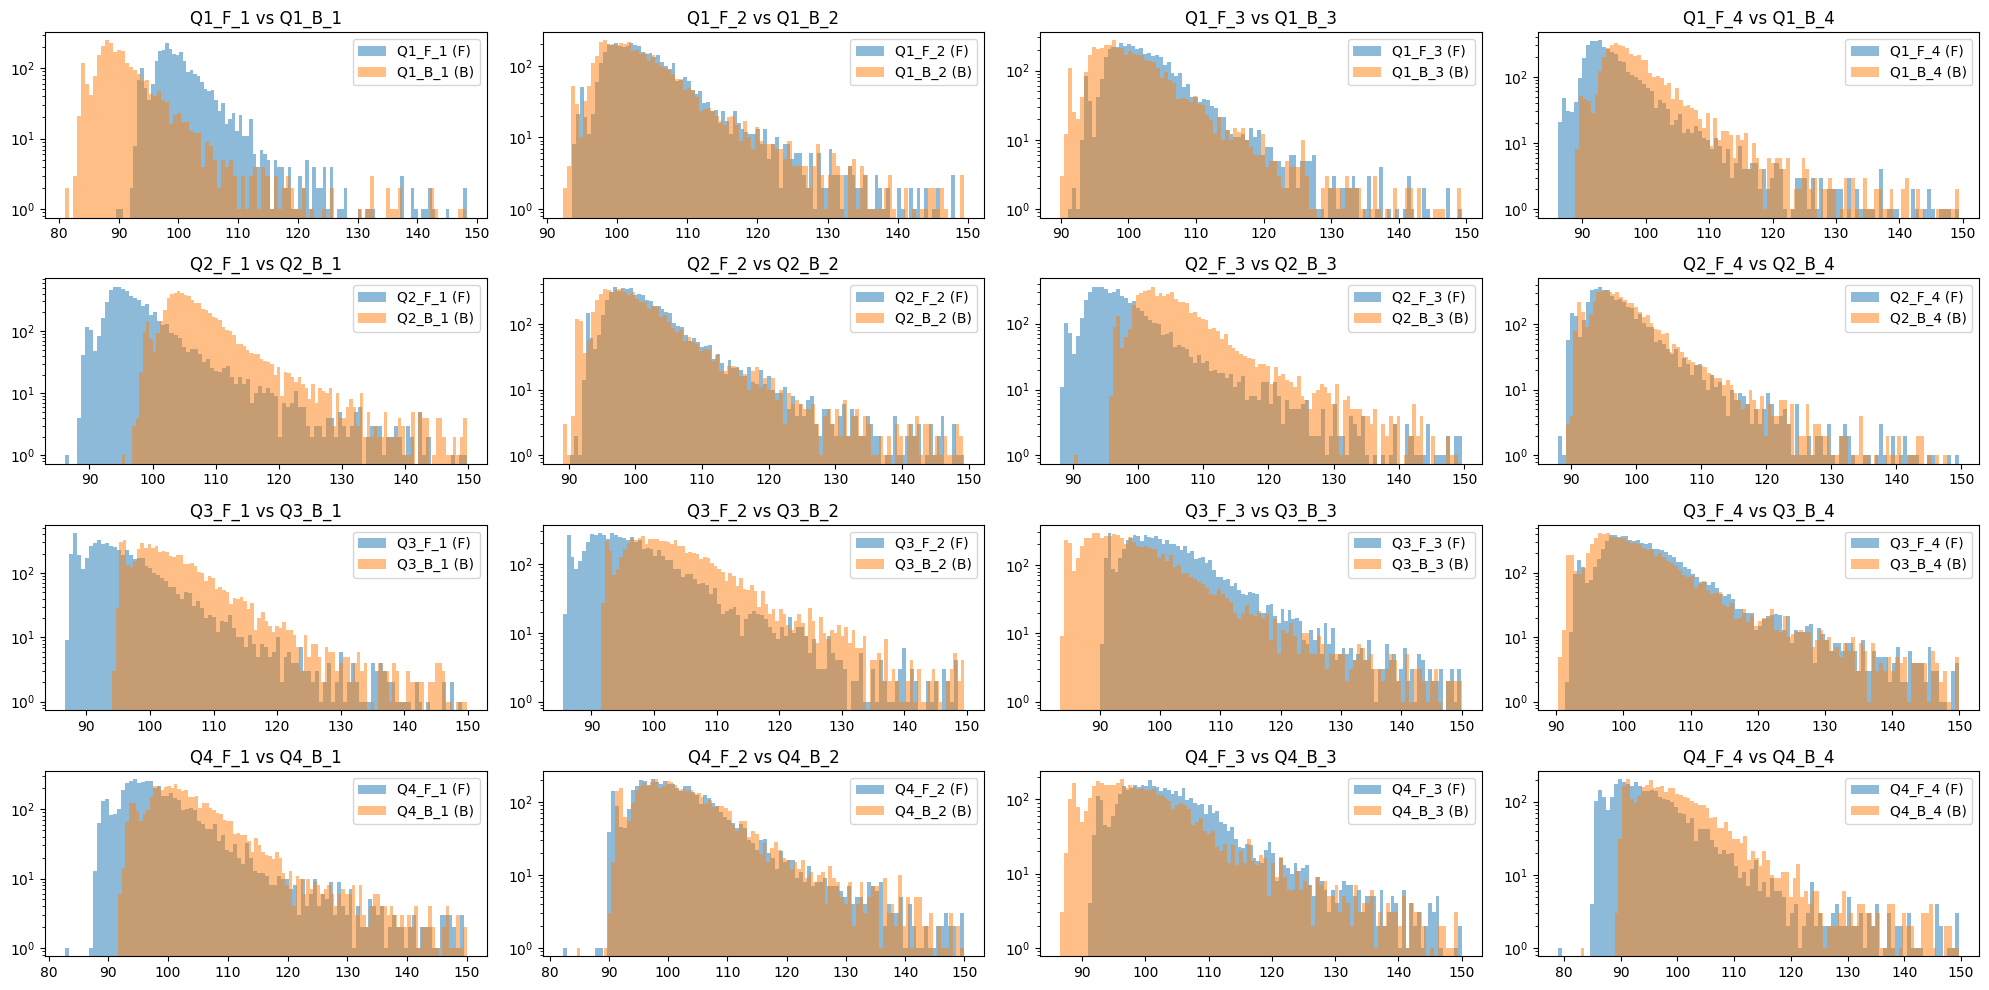

<ipython-input-27-8ce68b7e3873>:155: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_columns = data_columns.applymap(lambda x: 0 if builtins.isinstance(x, (builtins.int, builtins.float)) and (x < -1e6 or x > 1e6) else x)


In [27]:
left_limit_time = pd.to_datetime("1-1-2000", format='%d-%m-%Y')
right_limit_time = pd.to_datetime("1-1-2100", format='%d-%m-%Y')

file_path_input = file_path
data = pd.read_csv(file_path_input, sep='\s+', header=None, nrows=limit_number if limit else None)

data.columns = ['year', 'month', 'day', 'hour', 'minute', 'second'] + [f'column_{i}' for i in range(6, len(data.columns))]
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])

print("----------------------- Filter 1: by date ----------------------------")
filtered_data = data[(data['datetime'] >= left_limit_time) & (data['datetime'] <= right_limit_time)]
raw_data_len = len(filtered_data)

datetime_value = filtered_data['datetime'][0]
datetime_str = str(datetime_value)
save_filename_suffix = datetime_str.replace(' ', "_").replace(':', ".").replace('-', ".")
print(f"Starting date is {save_filename_suffix}.")

save_filename = f"list_events_{save_filename_suffix}.txt"

# Check if the file exists and its size
if os.path.exists(save_filename):
    if os.path.getsize(save_filename) >= 1 * 1024 * 1024: # Bugger than 1MB
        if force_replacement == False:
            print("Datafile found and it looks completed. Exiting...")
            sys.exit()  # Exit the script
        else:
            print("Datafile found and it is not empty, but 'force_replacement' is True, so it creates new datafiles anyway.")
    else:
        print("Datafile found, but empty.")

column_indices = {
    'T1_F': range(55, 59), 'T1_B': range(59, 63), 'Q1_F': range(63, 67), 'Q1_B': range(67, 71),
    'T2_F': range(39, 43), 'T2_B': range(43, 47), 'Q2_F': range(47, 51), 'Q2_B': range(51, 55),
    'T3_F': range(23, 27), 'T3_B': range(27, 31), 'Q3_F': range(31, 35), 'Q3_B': range(35, 39),
    'T4_F': range(7, 11), 'T4_B': range(11, 15), 'Q4_F': range(15, 19), 'Q4_B': range(19, 23)
}

# Extract and assign appropriate column names
columns_data = {'datetime': filtered_data['datetime'].values}
for key, idx_range in column_indices.items():
    for i, col_idx in enumerate(idx_range):
        column_name = f'{key}_{i+1}'
        columns_data[column_name] = filtered_data.iloc[:, col_idx].values

# Create a DataFrame from the columns data
final_df = pd.DataFrame(columns_data)


# New channel-wise plot -------------------------------------------------------
log_scale = True
T_clip_min = -150
T_clip_max = -75
Q_clip_min = 60
Q_clip_max = 150
num_bins = 100  # Parameter for the number of bins

# Create the grand figure for T values
if create_plots:
    fig_T, axes_T = plt.subplots(4, 4, figsize=(20, 10))  # Adjust the layout as necessary
    axes_T = axes_T.flatten()

    for i, key in enumerate(['T1', 'T2', 'T3', 'T4']):
        for j in range(4):
            col_F = f'{key}_F_{j+1}'
            col_B = f'{key}_B_{j+1}'
            y_F = final_df[col_F]
            y_B = final_df[col_B]

            # Plot histograms with T-specific clipping and bins
            axes_T[i*4 + j].hist(y_F[(y_F != 0) & (y_F > T_clip_min) & (y_F < T_clip_max)],
                                 bins=num_bins, alpha=0.5, label=f'{col_F} (F)')
            axes_T[i*4 + j].hist(y_B[(y_B != 0) & (y_B > T_clip_min) & (y_B < T_clip_max)],
                                 bins=num_bins, alpha=0.5, label=f'{col_B} (B)')
            axes_T[i*4 + j].set_title(f'{col_F} vs {col_B}')
            axes_T[i*4 + j].legend()

            if log_scale:
                axes_T[i*4 + j].set_yscale('log')  # For T values


    plt.tight_layout()

    if save_plots:
        final_filename_T = f'{fig_idx}_grand_figure_T.png'
        fig_idx += 1
        plot_list.append(final_filename_T)
        plt.savefig(final_filename_T, format='png')

    if show_plots: plt.show()
    plt.close(fig_T)

# Create the grand figure for Q values
if create_plots:
    fig_Q, axes_Q = plt.subplots(4, 4, figsize=(20, 10))  # Adjust the layout as necessary
    axes_Q = axes_Q.flatten()

    for i, key in enumerate(['T1', 'T2', 'T3', 'T4']):
        for j in range(4):
            col_F = f'{key.replace("T", "Q")}_F_{j+1}'
            col_B = f'{key.replace("T", "Q")}_B_{j+1}'
            y_F = final_df[col_F]
            y_B = final_df[col_B]

            # Plot histograms with Q-specific clipping and bins
            axes_Q[i*4 + j].hist(y_F[(y_F != 0) & (y_F > Q_clip_min) & (y_F < Q_clip_max)],
                                 bins=num_bins, alpha=0.5, label=f'{col_F} (F)')
            axes_Q[i*4 + j].hist(y_B[(y_B != 0) & (y_B > Q_clip_min) & (y_B < Q_clip_max)],
                                 bins=num_bins, alpha=0.5, label=f'{col_B} (B)')
            axes_Q[i*4 + j].set_title(f'{col_F} vs {col_B}')
            axes_Q[i*4 + j].legend()

            if log_scale:
                axes_Q[i*4 + j].set_yscale('log')  # For Q values


    plt.tight_layout()

    if save_plots:
        final_filename_Q = f'{fig_idx}_grand_figure_Q.png'
        fig_idx += 1
        plot_list.append(final_filename_Q)
        plt.savefig(final_filename_Q, format='png')

    if show_plots: plt.show()
    plt.close(fig_Q)
# -----------------------------------------------------------------------------


# Compute T_sum, T_diff, Q_sum, Q_diff
new_columns_data = {'datetime': final_df['datetime'].values}
for key in ['T1', 'T2', 'T3', 'T4']:
    T_F_cols = [f'{key}_F_{i+1}' for i in range(4)]
    T_B_cols = [f'{key}_B_{i+1}' for i in range(4)]
    Q_F_cols = [f'{key.replace("T", "Q")}_F_{i+1}' for i in range(4)]
    Q_B_cols = [f'{key.replace("T", "Q")}_B_{i+1}' for i in range(4)]

    T_F = final_df[T_F_cols].values
    T_B = final_df[T_B_cols].values
    Q_F = final_df[Q_F_cols].values
    Q_B = final_df[Q_B_cols].values

    for i in range(4):
        new_columns_data[f'{key}_T_sum_{i+1}'] = (T_F[:, i] + T_B[:, i]) / 2
        new_columns_data[f'{key}_T_diff_{i+1}'] = (T_F[:, i] - T_B[:, i]) / 2
        new_columns_data[f'{key.replace("T", "Q")}_Q_sum_{i+1}'] = (Q_F[:, i] + Q_B[:, i]) / 2
        new_columns_data[f'{key.replace("T", "Q")}_Q_diff_{i+1}'] = (Q_F[:, i] - Q_B[:, i]) / 2


new_df = pd.DataFrame(new_columns_data)

timestamp_column = new_df['datetime']  # Adjust if the column name is different
data_columns = new_df.drop(columns=['datetime'])
# data_columns = data_columns.map(lambda x: 0 if isinstance(x, (int, float)) and (x < -1e6 or x > 1e6) else x)
data_columns = data_columns.applymap(lambda x: 0 if builtins.isinstance(x, (builtins.int, builtins.float)) and (x < -1e6 or x > 1e6) else x)
new_df = pd.concat([timestamp_column, data_columns], axis=1)

# Filters and calibrations

## *First filters*

In [28]:
print("-------------------- Filter 2: uncalibrated data ---------------------")

# FILTER 2: TSUM, TDIF, QSUM, QDIF PRECALIBRATED THRESHOLDS --> 0 if out ------------------------------
for col in new_df.columns:
    if 'T_sum' in col:
        new_df[col] = np.where((new_df[col] > T_sum_right_pre_cal) | (new_df[col] < T_sum_left_pre_cal), 0, new_df[col])
    if 'T_diff' in col:
        new_df[col] = np.where((new_df[col] > T_diff_pre_cal_threshold) | (new_df[col] < -T_diff_pre_cal_threshold), 0, new_df[col])
    if 'Q_sum' in col:
        new_df[col] = np.where((new_df[col] > Q_right_pre_cal) | (new_df[col] < Q_left_pre_cal), 0, new_df[col])
    if 'Q_diff' in col:
        new_df[col] = np.where((new_df[col] > Q_diff_pre_cal_threshold) | (new_df[col] < -Q_diff_pre_cal_threshold), 0, new_df[col])


# -----------------------------------------------------------------------------
print("--------------------- Filter 3: calibrated data ----------------------")

calibrated_data = new_df.copy()

-------------------- Filter 2: uncalibrated data ---------------------
--------------------- Filter 3: calibrated data ----------------------


## *Charge sum calibration*

In [29]:
calibration_Q = []
for key in ['Q1', 'Q2', 'Q3', 'Q4']:
    Q_sum_cols = [f'{key}_Q_sum_{i+1}' for i in range(4)]
    Q_sum = new_df[Q_sum_cols].values
    calibration_q_component = [calibrate_strip_Q(Q_sum[:,i]) for i in range(4)]
    calibration_Q.append(calibration_q_component)
calibration_Q = np.array(calibration_Q)

print(f"Charge sum calibration:\n{calibration_Q}")
# print("---------------------------")

diff = np.abs(calibration_Q - charge_sum_reference) > charge_sum_distance
nan_mask = np.isnan(calibration_Q)
values_replaced_q_sum = np.any(diff | nan_mask)
calibration_Q[diff | nan_mask] = charge_sum_reference[diff | nan_mask]
if values_replaced_q_sum:
    print("Some values were replaced in the calibration Q sum.")

for i, key in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    for j in range(4):
        mask = new_df[f'{key}_Q_sum_{j+1}'] != 0
        calibrated_data.loc[mask, f'{key}_Q_sum_{j+1}'] -= calibration_Q[i][j]

for col in calibrated_data.columns:
    if 'Q_sum' in col:
        calibrated_data[col] = np.where((calibrated_data[col] > Q_sum_right_cal) | (calibrated_data[col] < Q_sum_left_cal), 0, calibrated_data[col])

for key in ['T1', 'T2', 'T3', 'T4']:
    for i in range(4):
        mask = (calibrated_data[f'{key.replace("T", "Q")}_Q_sum_{i+1}'] == 0)
        calibrated_data.loc[mask, [f'{key}_T_diff_{i+1}', f'{key}_T_sum_{i+1}',
                                   f'{key.replace("T", "Q")}_Q_diff_{i+1}', f'{key.replace("T", "Q")}_Q_sum_{i+1}']] = 0

Charge sum calibration:
[[92.59905 99.31615 97.45505 93.5032 ]
 [98.99255 96.6381  97.59365 94.19485]
 [95.048   94.3786  92.7645  97.95165]
 [96.409   96.52035 95.7972  92.25195]]


## *Time diff (position) calibration*

In [30]:
calibration_T = []
for key in ['T1', 'T2', 'T3', 'T4']:
    T_dif_cols = [f'{key}_T_diff_{i+1}' for i in range(4)]
    T_dif = new_df[T_dif_cols].values
    calibration_t_component = [calibrate_strip_T(T_dif[:, i]) for i in range(4)]
    calibration_T.append(calibration_t_component)
calibration_T = np.array(calibration_T)

print(f"Time dif calibration:\n{calibration_T}")

diff = np.abs(calibration_T - time_dif_reference) > time_dif_distance
nan_mask = np.isnan(calibration_T)
values_replaced_t_dif = np.any(diff | nan_mask)
calibration_T[diff | nan_mask] = time_dif_reference[diff | nan_mask]
if values_replaced_t_dif:
    print("Some values were replaced in the calibration T dif.")

for i, key in enumerate(['T1', 'T2', 'T3', 'T4']):
    for j in range(4):
        mask = new_df[f'{key}_T_diff_{j+1}'] != 0
        calibrated_data.loc[mask, f'{key}_T_diff_{j+1}'] -= calibration_T[i][j]

for col in calibrated_data.columns:
    if 'T_diff' in col:
        calibrated_data[col] = np.where((calibrated_data[col] > T_diff_cal_threshold) | (calibrated_data[col] < -T_diff_cal_threshold), 0, calibrated_data[col])

for key in ['T1', 'T2', 'T3', 'T4']:
    for i in range(4):
        mask = (calibrated_data[f'{key}_T_diff_{i+1}'] == 0)
        calibrated_data.loc[mask, [f'{key}_T_diff_{i+1}', f'{key}_T_sum_{i+1}',
                                   f'{key.replace("T", "Q")}_Q_diff_{i+1}', f'{key.replace("T", "Q")}_Q_sum_{i+1}']] = 0

Time dif calibration:
[[-0.0367    0.03175   1.006325  0.746875]
 [-0.899725 -0.878075 -0.189125  0.444825]
 [ 0.8879    1.161675  1.000975  2.451   ]
 [ 1.49635   2.10285   1.683325  3.038325]]


## *Charge difference calibration and filtering*

In [31]:
calibration_Q_FB = []
for key in ['Q1', 'Q2', 'Q3', 'Q4']:
    Q_F_cols = [f'{key}_F_{i+1}' for i in range(4)]
    Q_F = final_df[Q_F_cols].values
    Q_B_cols = [f'{key}_B_{i+1}' for i in range(4)]
    Q_B = final_df[Q_B_cols].values
    calibration_q_FB_component = [calibrate_strip_Q_FB(Q_F[:,i], Q_B[:,i]) for i in range(4)]
    calibration_Q_FB.append(calibration_q_FB_component)
calibration_Q_FB = np.array(calibration_Q_FB)

print(f"Charge dif calibration:\n{calibration_Q_FB}")

diff = np.abs(calibration_Q_FB - charge_dif_reference) > charge_dif_distance
nan_mask = np.isnan(calibration_Q_FB)
values_replaced_q_dif = np.any(diff | nan_mask)
calibration_Q_FB[diff | nan_mask] = charge_dif_reference[diff | nan_mask]
if values_replaced_q_dif:
    print("Some values were replaced in the calibration Q front-back.")

for i, key in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    for j in range(4):
        mask = new_df[f'{key}_Q_diff_{j+1}'] != 0
        calibrated_data.loc[mask, f'{key}_Q_diff_{j+1}'] -= calibration_Q_FB[i][j]

# Add datetime column to calibrated_data -----------------------------
calibrated_data['datetime'] = final_df['datetime']

Charge dif calibration:
[[ 4.9264   0.5648   1.1696  -1.43155]
 [-4.3607   0.76075 -3.51585 -0.2786 ]
 [-3.8344  -3.19925  3.3038   0.96895]
 [-2.3474  -0.08865  2.3622  -2.2324 ]]


## *One-side events filter*

In [32]:
for key in ['T1', 'T2', 'T3', 'T4']:
    for i in range(4):
        mask = (calibrated_data[f'{key}_T_diff_{i+1}'] == 0) | (calibrated_data[f'{key}_T_sum_{i+1}'] == 0) | \
               (calibrated_data[f'{key.replace("T", "Q")}_Q_diff_{i+1}'] == 0) | (calibrated_data[f'{key.replace("T", "Q")}_Q_sum_{i+1}'] == 0)
        calibrated_data.loc[mask, [f'{key}_T_diff_{i+1}', f'{key}_T_sum_{i+1}',
                                   f'{key.replace("T", "Q")}_Q_diff_{i+1}', f'{key.replace("T", "Q")}_Q_sum_{i+1}']] = 0

## *Charge front-back correction*

In [33]:
if charge_front_back:
    for key in ['Q1', 'Q2', 'Q3', 'Q4']:
        for i in range(4):
            Q_sum = calibrated_data[f'{key}_Q_sum_{i+1}'].values
            Q_diff = calibrated_data[f'{key}_Q_diff_{i+1}'].values
            if np.sum(Q_sum) == 0: continue # Do not correct if there is no data
            title = f"{key}_{i+1}. Charge diff. vs. charge sum."
            x_label = "Charge sum"
            y_label = "Charge diff"
            name_of_file = f"{key}_{i+1}_charge_analysis_scatter_diff_vs_sum"
            coeffs = scatter_2d_and_fit(Q_sum, Q_diff, title, x_label, y_label, name_of_file)
            correction = polynomial(Q_sum, *coeffs)

            # Apply correction only where Q_diff is not zero
            Q_diff_cal = Q_diff.copy()  # Copy original Q_diff to preserve values

            # Apply correction to non-zero Q_diff values
            non_zero_indices = Q_diff != 0  # Mask for non-zero values
            Q_diff_cal[non_zero_indices] = Q_diff[non_zero_indices] - correction[non_zero_indices]

            # Update the DataFrame with corrected values
            calibrated_data[f'{key}_Q_diff_{i+1}'] = Q_diff_cal

    Q_diff_cal_threshold_anc = Q_diff_cal_threshold

    # ADD THE SUBFIGURES HERE OF THE 16 CALIBRATIONS
    print('Charge front-back correction performed.')

    if create_plots:
        num_columns = len(calibrated_data.columns) - 1  # Exclude 'datetime'
        num_rows = (num_columns + 7) // 8  # Adjust as necessary for better layout
        fig, axes = plt.subplots(num_rows, 8, figsize=(20, num_rows * 2))
        axes = axes.flatten()
        for i, col in enumerate([col for col in calibrated_data.columns if col != 'datetime']):
            y = calibrated_data[col]
            axes[i].hist(y[y != 0], bins=300, alpha=0.5, label=col)
            axes[i].set_title(col)
            axes[i].legend()
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.suptitle('Calibrated data, included Front-back correction')

        if save_plots:
            name_of_file = 'calibrated_including_ch_diff'
            final_filename = f'{fig_idx}_{name_of_file}.png'
            fig_idx += 1
            plot_list.append(final_filename)
            plt.savefig(final_filename, format='png')

        if show_plots: plt.show()
        plt.close()

else:
    print('Charge front-back correction was selected to not be performed.')
    Q_diff_cal_threshold_anc = 10


print("----------------- Filter 5: charge difference filter -----------------")
for col in calibrated_data.columns:
    if 'Q_diff' in col:
        calibrated_data[col] = np.where((calibrated_data[col] > Q_diff_cal_threshold_anc) | (calibrated_data[col] < Q_diff_cal_threshold_anc), 0, calibrated_data[col])

Charge front-back correction was selected to not be performed.
----------------- Filter 5: charge difference filter -----------------


## ***Time sum (incidence) calibration***

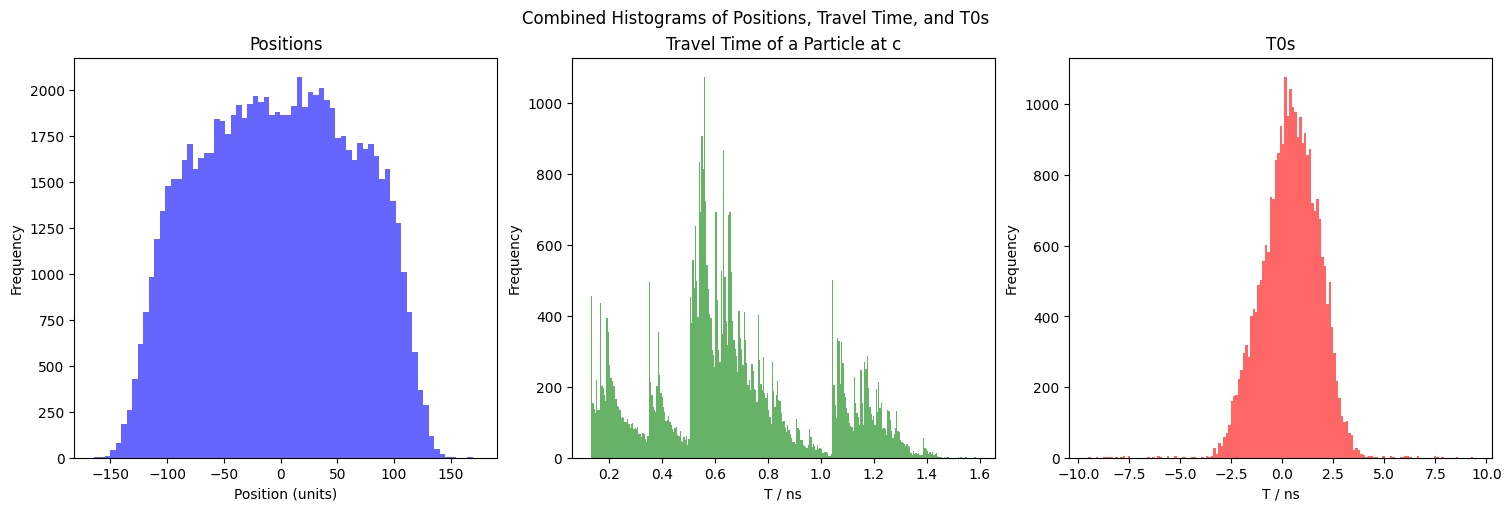

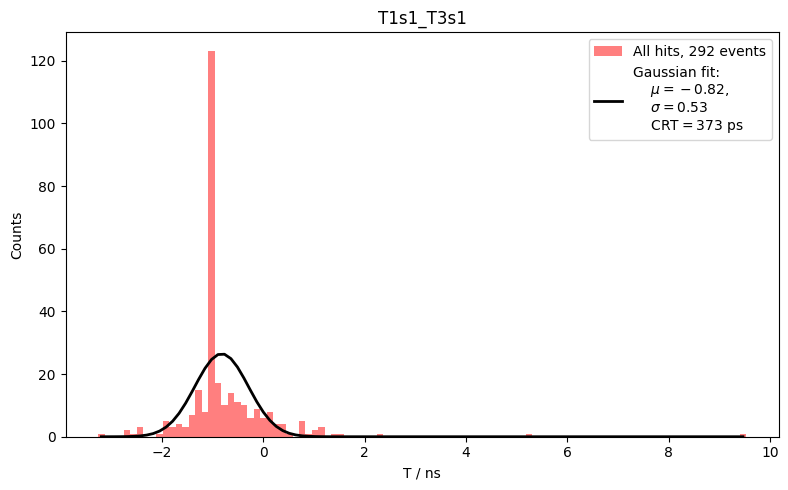

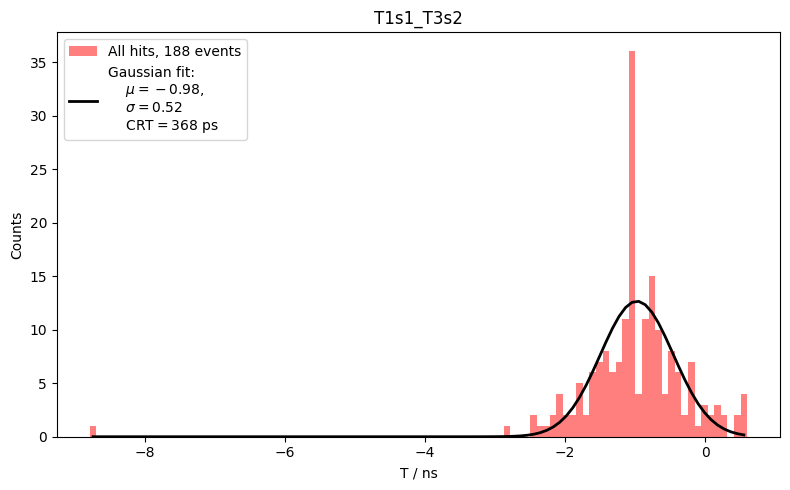

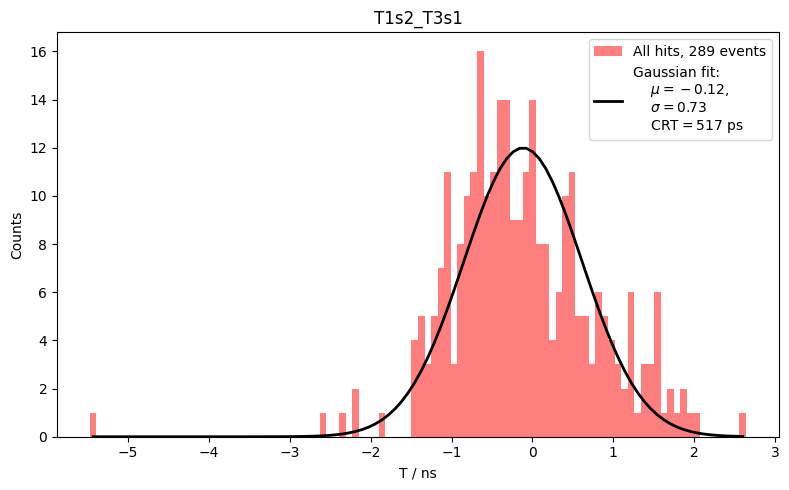

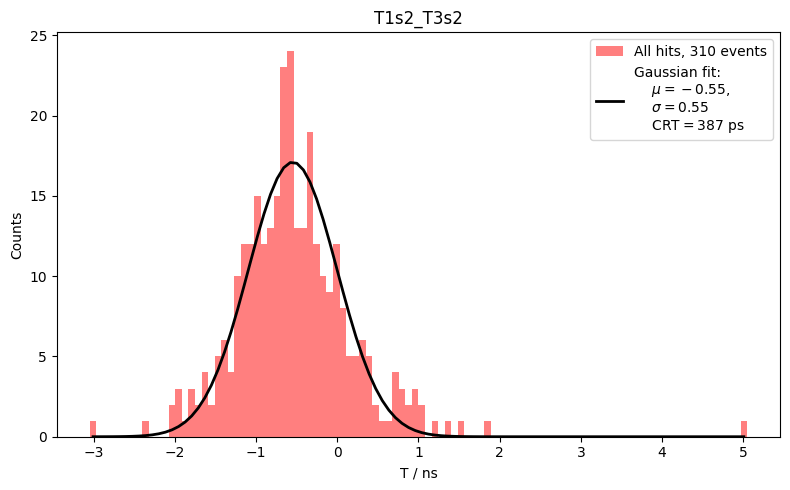

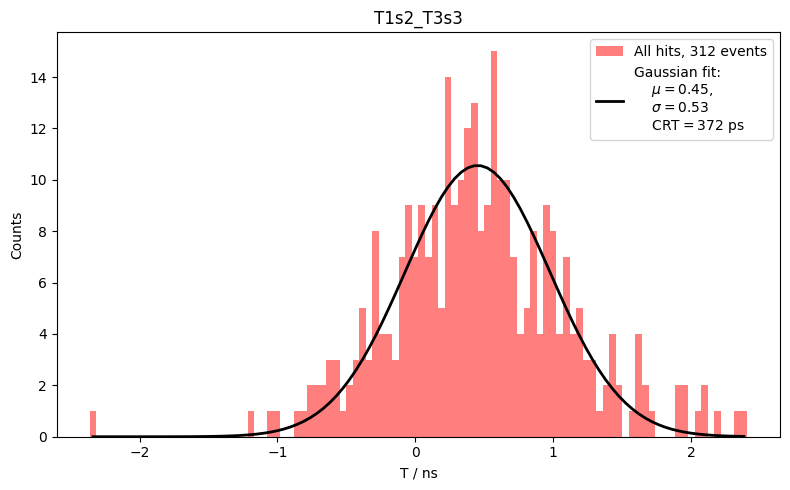

---------------------------
CRT Avg: 403.3 ps
---------------------------
---------------------------
Calibration in times is:
 [[ 0.          0.61016477  0.70085013 -0.13411277]
 [ 0.96293367  1.05420959  2.38360452  1.3893428 ]
 [ 0.777902    1.07811337  0.09831363  0.52786561]
 [ 0.28177768 -0.32802106 -0.32140314 -0.04246553]]


In [34]:
if time_calibration:
    # Initialize an empty list to store the resulting matrices for each event
    event_matrices = []

    # Iterate over each event (row) in the DataFrame
    for _, row in calibrated_data.iterrows():
        event_matrix = []
        for module in ['T1', 'T2', 'T3', 'T4']:
            # Find the index of the strip with the maximum Q_sum for this module
            Q_sum_cols = [f'{module.replace("T", "Q")}_Q_sum_{i+1}' for i in range(4)]
            Q_sum_values = row[Q_sum_cols].values

            if sum(Q_sum_values) == 0:
                event_matrix.append([0, 0, 0])
                continue

            max_index = np.argmax(Q_sum_values) + 1

            # Get the corresponding T_sum and T_diff for the module and strip
            T_sum_col = f'{module}_T_sum_{max_index}'
            T_diff_col = f'{module}_T_diff_{max_index}'
            T_sum_value = row[T_sum_col]
            T_diff_value = row[T_diff_col]

            # Append the row to the event matrix
            event_matrix.append([max_index, T_sum_value, T_diff_value])

        # Convert the event matrix to a numpy array and append it to the list of event matrices
        event_matrices.append(np.array(event_matrix))

    # Convert the list of event matrices to a 3D numpy array (events x modules x features)
    event_matrices = np.array(event_matrices)


    def calculate_diff(T_a, s_a, T_b, s_b, ps):
        # First position
        x_1 = ps[T_a-1, 1]
        yz_1 = yz_big[T_a-1, s_a-1]
        xyz_1 = np.append(x_1, yz_1)

        # Second position
        x_2 = ps[T_b-1, 1]
        yz_2 = yz_big[T_b-1, s_b-1]
        xyz_2 = np.append(x_2, yz_2)

        pos_x.append(x_1)
        pos_x.append(x_2)

        t_0_1 = ps[T_a-1, 2]
        t_0_2 = ps[T_b-1, 2]
        t_0.append(t_0_1)
        t_0.append(t_0_2)

        # Length
        dist = np.sqrt(np.sum((xyz_2 - xyz_1)**2))
        travel_time = dist / muon_speed

        v_travel_time.append(travel_time)

        # diff = travel_time
        diff = ps[T_b-1, 2] - ps[T_a-1, 2] - travel_time
        # diff = ps[T_b-1, 2] - ps[T_a-1, 2]
        return diff

    # Three layers spaced
    T1s1_T4s1 = []
    T1s1_T4s2 = []
    T1s2_T4s1 = []
    T1s2_T4s2 = []
    T1s2_T4s3 = []
    T1s3_T4s2 = []
    T1s3_T4s3 = []
    T1s3_T4s4 = []
    T1s4_T4s3 = []
    T1s4_T4s4 = []
    T1s1_T4s3 = []
    T1s3_T4s1 = []
    T1s2_T4s4 = []
    T1s4_T4s2 = []
    T1s1_T4s4 = []

    # Two layers spaced
    T1s1_T3s1 = []
    T1s1_T3s2 = []
    T1s2_T3s1 = []
    T1s2_T3s2 = []
    T1s2_T3s3 = []
    T1s3_T3s2 = []
    T1s3_T3s3 = []
    T1s3_T3s4 = []
    T1s4_T3s3 = []
    T1s4_T3s4 = []
    T1s1_T3s3 = []
    T1s3_T3s1 = []
    T1s2_T3s4 = []
    T1s4_T3s2 = []
    T1s1_T3s4 = []

    T2s1_T4s1 = []
    T2s1_T4s2 = []
    T2s2_T4s1 = []
    T2s2_T4s2 = []
    T2s2_T4s3 = []
    T2s3_T4s2 = []
    T2s3_T4s3 = []
    T2s3_T4s4 = []
    T2s4_T4s3 = []
    T2s4_T4s4 = []
    T2s1_T4s3 = []
    T2s3_T4s1 = []
    T2s2_T4s4 = []
    T2s4_T4s2 = []
    T2s1_T4s4 = []

    # One layer spaced
    T1s1_T2s1 = []
    T1s1_T2s2 = []
    T1s2_T2s1 = []
    T1s2_T2s2 = []
    T1s2_T2s3 = []
    T1s3_T2s2 = []
    T1s3_T2s3 = []
    T1s3_T2s4 = []
    T1s4_T2s3 = []
    T1s4_T2s4 = []
    T1s1_T2s3 = []
    T1s3_T2s1 = []
    T1s2_T2s4 = []
    T1s4_T2s2 = []
    T1s1_T2s4 = []

    T2s1_T3s1 = []
    T2s1_T3s2 = []
    T2s2_T3s1 = []
    T2s2_T3s2 = []
    T2s2_T3s3 = []
    T2s3_T3s2 = []
    T2s3_T3s3 = []
    T2s3_T3s4 = []
    T2s4_T3s3 = []
    T2s4_T3s4 = []
    T2s1_T3s3 = []
    T2s3_T3s1 = []
    T2s2_T3s4 = []
    T2s4_T3s2 = []
    T2s1_T3s4 = []

    T3s1_T4s1 = []
    T3s1_T4s2 = []
    T3s2_T4s1 = []
    T3s2_T4s2 = []
    T3s2_T4s3 = []
    T3s3_T4s2 = []
    T3s3_T4s3 = []
    T3s3_T4s4 = []
    T3s4_T4s3 = []
    T3s4_T4s4 = []
    T3s1_T4s3 = []
    T3s3_T4s1 = []
    T3s2_T4s4 = []
    T3s4_T4s2 = []
    T3s1_T4s4 = []

    pos_x = []
    v_travel_time = []
    t_0 = []

    # -----------------------------------------------------------------------------
    # Perform the calculation of a strip vs. the any other one --------------------
    # -----------------------------------------------------------------------------

    i = 0
    for event in event_matrices:
        if limit and i >= limit_number:
            break
        if np.all(event[:,0] == 0):
            continue

        istrip = event[:, 0]
        t0 = event[:,1] - strip_length / 2 / strip_speed
        x = event[:,2] * strip_speed

        ps = np.column_stack(( istrip, x,  t0 ))
        ps[:,2] = ps[:,2] - ps[0,2]

        # ---------------------------------------------------------------------
        # Fill the time differences vectors -----------------------------------
        # ---------------------------------------------------------------------

        # Three layers spacing ------------------------------------------------
        # T1-T4 ---------------------------------------------------------------
        T_a = 1; T_b = 4
        # Same strips
        s_a = 1; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Adjacent strips
        s_a = 1; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Two separated strips
        s_a = 1; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Three separated strips
        s_a = 1; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))

        # Two layers spacing --------------------------------------------------
        # T1-T3 ---------------------------------------------------------------
        T_a = 1; T_b = 3
        # Same strips
        s_a = 1; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T3s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Adjacent strips
        s_a = 1; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T3s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Two separated strips
        s_a = 1; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T3s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Three separated strips
        s_a = 1; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))

        # T2-T4 ---------------------------------------------------------------
        T_a = 2; T_b = 4
        # Same strips
        s_a = 1; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s4_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Adjacent strips
        s_a = 1; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s4_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Two separated strips
        s_a = 1; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s4_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Three separated strips
        s_a = 1; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))

        # One layer spacing ---------------------------------------------------
        # T3-T4 ---------------------------------------------------------------
        T_a = 3; T_b = 4
        # Same strips
        s_a = 1; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s1_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s2_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s3_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s4_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Adjacent strips
        s_a = 1; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s1_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s2_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s2_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s3_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s3_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s4_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Two separated strips
        s_a = 1; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s1_T4s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s3_T4s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s2_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s4_T4s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Three separated strips
        s_a = 1; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T3s1_T4s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))

        # T1-T2 ---------------------------------------------------------------
        T_a = 1; T_b = 2
        # Same strips
        s_a = 1; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T2s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T2s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T2s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T2s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Adjacent strips
        s_a = 1; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T2s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T2s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T2s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T2s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T2s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T2s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Two separated strips
        s_a = 1; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T2s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s3_T2s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s2_T2s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s4_T2s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Three separated strips
        s_a = 1; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T1s1_T2s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))

        # T2-T3 ---------------------------------------------------------------
        T_a = 2; T_b = 3
        # Same strips
        s_a = 1; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T3s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s4_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Adjacent strips
        s_a = 1; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T3s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s4_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Two separated strips
        s_a = 1; s_b = 3
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T3s3.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 3; s_b = 1
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s3_T3s1.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 2; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s2_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        s_a = 4; s_b = 2
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s4_T3s2.append(calculate_diff(T_a, s_a, T_b, s_b, ps))
        # Three separated strips
        s_a = 1; s_b = 4
        if ps[T_a-1, 0] == s_a and ps[T_b-1, 0] == s_b: T2s1_T3s4.append(calculate_diff(T_a, s_a, T_b, s_b, ps))

        i += 1


    vectors = [
        T1s1_T3s1, T1s1_T3s2, T1s2_T3s1, T1s2_T3s2, T1s2_T3s3,
        T1s3_T3s2, T1s3_T3s3, T1s3_T3s4, T1s4_T3s3, T1s4_T3s4,
        T1s1_T3s3, T1s3_T3s1, T1s2_T3s4, T1s4_T3s2, T1s1_T3s4,\

        T1s1_T4s1, T1s1_T4s2, T1s2_T4s1, T1s2_T4s2, T1s2_T4s3,
        T1s3_T4s2, T1s3_T4s3, T1s3_T4s4, T1s4_T4s3, T1s4_T4s4,
        T1s1_T4s3, T1s3_T4s1, T1s2_T4s4, T1s4_T4s2, T1s1_T4s4,\

        T2s1_T4s1, T2s1_T4s2, T2s2_T4s1, T2s2_T4s2, T2s2_T4s3,
        T2s3_T4s2, T2s3_T4s3, T2s3_T4s4, T2s4_T4s3, T2s4_T4s4,
        T2s1_T4s3, T2s3_T4s1, T2s2_T4s4, T2s4_T4s2, T2s1_T4s4,\

        T3s1_T4s1, T3s1_T4s2, T3s2_T4s1, T3s2_T4s2, T3s2_T4s3,
        T3s3_T4s2, T3s3_T4s3, T3s3_T4s4, T3s4_T4s3, T3s4_T4s4,
        T3s1_T4s3, T3s3_T4s1, T3s2_T4s4, T3s4_T4s2, T3s1_T4s4,\

        T1s1_T2s1, T1s1_T2s2, T1s2_T2s1, T1s2_T2s2, T1s2_T2s3,
        T1s3_T2s2, T1s3_T2s3, T1s3_T2s4, T1s4_T2s3, T1s4_T2s4,
        T1s1_T2s3, T1s3_T2s1, T1s2_T2s4, T1s4_T2s2, T1s1_T2s4,\

        T2s1_T3s1, T2s1_T3s2, T2s2_T3s1, T2s2_T3s2, T2s2_T3s3,
        T2s3_T3s2, T2s3_T3s3, T2s3_T3s4, T2s4_T3s3, T2s4_T3s4,
        T2s1_T3s3, T2s3_T3s1, T2s2_T3s4, T2s4_T3s2, T2s1_T3s4
    ]


    if create_plots:
        # Convert data to numpy arrays and filter
        pos_x = np.array(pos_x)
        pos_x = pos_x[(-200 < pos_x) & (pos_x < 200) & (pos_x != 0)]
        v_travel_time = np.array(v_travel_time)
        v_travel_time = v_travel_time[v_travel_time < 1.6]
        t_0 = np.array(t_0)
        t_0 = t_0[(-10 < t_0) & (t_0 < 10)]
        t_0 = t_0[t_0 != 0]

        # Prepare a figure with 1x3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

        # Plot histogram for positions (pos_x)
        axs[0].hist(pos_x, bins='auto', alpha=0.6, color='blue')
        axs[0].set_title('Positions')
        axs[0].set_xlabel('Position (units)')
        axs[0].set_ylabel('Frequency')

        # Plot histogram for travel time (v_travel_time)
        axs[1].hist(v_travel_time, bins=300, alpha=0.6, color='green')
        axs[1].set_title('Travel Time of a Particle at c')
        axs[1].set_xlabel('T / ns')
        axs[1].set_ylabel('Frequency')

        # Plot histogram for T0s (t_0)
        axs[2].hist(t_0, bins='auto', alpha=0.6, color='red')
        axs[2].set_title('T0s')
        axs[2].set_xlabel('T / ns')
        axs[2].set_ylabel('Frequency')

        # Show the combined figure
        plt.suptitle('Combined Histograms of Positions, Travel Time, and T0s')

        if save_plots:
            name_of_file = 'positions_travel_time_tzeros'
            final_filename = f'{fig_idx}_{name_of_file}.png'
            fig_idx += 1
            plot_list.append(final_filename)
            plt.savefig(final_filename, format='png')

        if show_plots: plt.show()
        plt.close()

        # No fit: loop over each vector and plot histogram
        for i, vector in enumerate(vectors):
            var_name = [name for name, val in globals().items() if val is vector][0]
            if i >= number_of_time_cal_figures: break
            hist_1d(vector, 100, var_name, "T / ns", var_name)

    # Dictionary to store CRT values
    crt_values = {}
    for i, vector in enumerate(vectors):
        var_name = [name for name, val in globals().items() if val is vector][0]
        vdat = np.array(vector)
        if len(vdat) > 1:
            try:
                vdat = vdat[(vdat > np.quantile(vdat, CRT_gaussian_fit_quantile)) & (vdat < np.quantile(vdat, 1 - CRT_gaussian_fit_quantile))]
            except IndexError:
                print(f"IndexError encountered for {var_name}, setting CRT to 0")
                vdat = np.array([0])

        CRT = norm.fit(vdat)[1] / np.sqrt(2) if len(vdat) > 0 else 0
        # print(f"CRT for {var_name} is {CRT:.4g}")
        crt_values[f'CRT_{var_name}'] = CRT

    crt_df = pd.DataFrame(crt_values, index=calibrated_data.index)
    calibrated_data = pd.concat([calibrated_data, crt_df], axis=1)
    calibrated_data = calibrated_data.copy()
    crt_values = calibrated_data.filter(like='CRT_').iloc[0].values
    Q1, Q3 = np.percentile(crt_values, [25, 75])
    crt_values = crt_values[crt_values <= 1]
    filtered_crt_values = crt_values[(crt_values >= Q1 - 1.5 * (Q3 - Q1)) & (crt_values <= Q3 + 1.5 * (Q3 - Q1))]
    calibrated_data['CRT_avg'] = np.mean(filtered_crt_values)
    # print(f"CRT values: {crt_values}, Filtered: {filtered_crt_values}, Avg: {calibrated_data['CRT_avg'][0]:.4g}")
    print("---------------------------")
    print(f"CRT Avg: {calibrated_data['CRT_avg'][0]*1000:.4g} ps")
    print("---------------------------")


    def summary(vector):
        quantile_left = CRT_gaussian_fit_quantile * 100
        quantile_right = 100 - CRT_gaussian_fit_quantile * 100

        vector = np.array(vector)  # Convert list to NumPy array
        strip_time_diff_bound = 10
        cond = (vector > -strip_time_diff_bound) & (vector < strip_time_diff_bound)  # This should result in a boolean array
        vector = vector[cond]

        if len(vector) < 100:
            return np.nan
        try:
            percentile_left = np.percentile(vector, quantile_left)
            percentile_right = np.percentile(vector, quantile_right)
        except IndexError:
            print("Gave issue with:")
            print(vector)
            return np.nan
        vector = [x for x in vector if percentile_left <= x <= percentile_right]
        if len(vector) == 0:
            return np.nan
        mu, std = norm.fit(vector)
        return mu

    # Create row and column indices
    rows = ['T{}s{}'.format(i, j) for i in range(1, 5) for j in range(1, 5)]
    columns = ['T{}s{}'.format(i, j) for i in range(1, 5) for j in range(1, 5)]

    df = pd.DataFrame(index=rows, columns=columns)
    for vector in vectors:
        var_name = [name for name, val in globals().items() if val is vector][0]
        if var_name == "vector":
            continue
        current_prefix = str(var_name.split('_')[0])
        current_suffix = str(var_name.split('_')[1])
        # Key part: create the antisymmetric matrix
        df.loc[current_prefix, current_suffix] = summary(vector)
        df.loc[current_suffix, current_prefix] = -df.loc[current_prefix, current_suffix]

    # -----------------------------------------------------------------------------
    # Brute force method
    # -----------------------------------------------------------------------------
    brute_force_analysis = False
    if brute_force_analysis:
        # Main itinerary
        itinerary = ["T1s1", "T3s1", "T1s2", "T3s2", "T1s3", "T3s3", "T1s4", "T3s4","T4s4", "T2s4", "T4s3", "T2s3", "T4s2", "T2s2", "T4s1", "T2s1"]
        import random
        k = 0
        max_iter = 2000000
        brute_force_list = []
        # Create row and column indices
        rows = ['T{}'.format(i) for i in range(1, 5)]
        columns = ['s{}'.format(i) for i in range(1,5)]
        brute_force_df = pd.DataFrame(0, index=rows, columns=columns)
        jump = False
        while k < max_iter:
            if k % 50000 == 0: print(f"Itinerary {k}")
            brute_force_df[brute_force_df.columns] = 0
            step = itinerary
            a = []
            for i in range(len(itinerary)):
                if i > 0:
                    # Storing new values
                    a.append( df[step[i - 1]][step[i]] )
                relative_time = sum(a)
                if np.isnan(relative_time):
                    jump = True
                    break
                ind1 = str(step[i][0:2])
                ind2 = str(step[i][2:4])
                brute_force_df.loc[ind1,ind2] = brute_force_df.loc[ind1,ind2] + relative_time
            # If the path is succesful, print it, then we can copy it from terminal
            # and save it for the next step.
            if jump == False:
                print(itinerary)
            # Shuffle the path
            random.shuffle(itinerary)
            # Iterate
            k += 1
            if jump:
                jump = False
                continue
            # Substract a value from the entire DataFrame
            brute_force_df = brute_force_df.sub(brute_force_df.iloc[0, 0])
            # Append the matrix to the big list
            brute_force_list.append(brute_force_df.values)
        # Calculate the mean of all the paths
        calibrated_times_bf = np.nanmean(brute_force_list, axis=0)
        calibration_times = calibrated_times_bf

    # -----------------------------------------------------------------------------
    # Selected paths method
    # -----------------------------------------------------------------------------
    itineraries = [
    ['T1s1', 'T3s1', 'T1s2', 'T3s2', 'T1s3', 'T3s3', 'T1s4', 'T3s4', 'T4s4', 'T2s4', 'T4s3', 'T2s3', 'T4s2', 'T2s2', 'T4s1', 'T2s1'],
    ['T3s4', 'T1s4', 'T2s4', 'T4s4', 'T2s2', 'T4s3', 'T2s3', 'T1s3', 'T3s3', 'T2s1', 'T4s2', 'T1s2', 'T3s2', 'T1s1', 'T4s1', 'T3s1'],
    ['T3s2', 'T1s2', 'T2s2', 'T4s1', 'T3s1', 'T1s1', 'T3s3', 'T4s2', 'T2s3', 'T1s3', 'T3s4', 'T2s4', 'T4s4', 'T1s4', 'T4s3', 'T2s1'],
    ['T2s4', 'T4s2', 'T1s4', 'T4s4', 'T2s3', 'T4s1', 'T1s3', 'T3s3', 'T1s2', 'T2s2', 'T3s2', 'T2s1', 'T3s1', 'T1s1', 'T4s3', 'T3s4'],
    ['T2s4', 'T4s4', 'T2s2', 'T1s2', 'T3s1', 'T1s1', 'T4s3', 'T2s3', 'T4s1', 'T1s3', 'T3s4', 'T1s4', 'T3s3', 'T2s1', 'T4s2', 'T3s2'],
    ['T3s1', 'T2s1', 'T1s2', 'T4s3', 'T1s3', 'T2s2', 'T3s3', 'T4s1', 'T3s2', 'T1s1', 'T4s4', 'T2s3', 'T3s4', 'T2s4', 'T4s2', 'T1s4'],
    ['T2s3', 'T4s4', 'T2s4', 'T4s2', 'T1s1', 'T3s2', 'T2s1', 'T3s1', 'T4s1', 'T1s3', 'T2s2', 'T1s2', 'T3s3', 'T1s4', 'T4s3', 'T3s4'],
    ['T2s4', 'T3s4', 'T4s2', 'T1s1', 'T2s1', 'T3s1', 'T1s2', 'T4s1', 'T1s3', 'T4s4', 'T2s2', 'T3s3', 'T1s4', 'T2s3', 'T4s3', 'T3s2'],
    ['T3s3', 'T1s2', 'T3s2', 'T2s1', 'T4s3', 'T2s3', 'T4s4', 'T3s4', 'T2s4', 'T1s4', 'T4s2', 'T2s2', 'T1s3', 'T4s1', 'T1s1', 'T3s1'],
    ['T2s4', 'T3s4', 'T1s4', 'T3s3', 'T4s1', 'T2s3', 'T4s2', 'T2s1', 'T3s2', 'T1s3', 'T4s3', 'T2s2', 'T1s2', 'T4s4', 'T1s1', 'T3s1'],
    ['T4s2', 'T3s2', 'T4s3', 'T1s3', 'T2s2', 'T4s1', 'T1s1', 'T2s1', 'T3s3', 'T1s4', 'T2s3', 'T3s4', 'T2s4', 'T4s4', 'T1s2', 'T3s1'],
    ['T1s3', 'T2s3', 'T3s4', 'T1s4', 'T4s4', 'T2s4', 'T4s3', 'T1s2', 'T3s1', 'T4s1', 'T2s1', 'T4s2', 'T3s2', 'T1s1', 'T3s3', 'T2s2'],
    ['T2s4', 'T4s3', 'T1s2', 'T2s1', 'T3s2', 'T2s2', 'T4s2', 'T3s3', 'T1s4', 'T2s3', 'T1s3', 'T3s4', 'T4s4', 'T1s1', 'T3s1', 'T4s1'],
    ['T2s2', 'T1s2', 'T4s1', 'T1s1', 'T3s1', 'T2s1', 'T3s3', 'T4s2', 'T2s4', 'T4s4', 'T1s4', 'T2s3', 'T3s4', 'T4s3', 'T1s3', 'T3s2'],
    ['T3s1', 'T2s1', 'T3s3', 'T2s2', 'T4s2', 'T2s4', 'T4s4', 'T1s2', 'T3s2', 'T1s3', 'T3s4', 'T1s4', 'T2s3', 'T4s1', 'T1s1', 'T4s3'],
    ['T4s2', 'T3s2', 'T2s2', 'T4s4', 'T3s3', 'T1s4', 'T2s3', 'T1s3', 'T3s4', 'T2s4', 'T4s3', 'T2s1', 'T1s2', 'T3s1', 'T4s1', 'T1s1'],
    ['T1s2', 'T3s3', 'T4s4', 'T1s1', 'T4s1', 'T3s1', 'T2s1', 'T3s2', 'T1s3', 'T3s4', 'T2s3', 'T4s3', 'T2s2', 'T4s2', 'T2s4', 'T1s4'],
    ['T3s3', 'T1s2', 'T4s2', 'T3s2', 'T1s3', 'T2s2', 'T4s1', 'T1s1', 'T3s1', 'T2s1', 'T4s3', 'T1s4', 'T2s4', 'T3s4', 'T4s4', 'T2s3'],
    ['T3s4', 'T1s3', 'T4s2', 'T2s4', 'T4s3', 'T3s2', 'T1s2', 'T3s3', 'T2s2', 'T4s1', 'T2s3', 'T1s4', 'T4s4', 'T2s1', 'T1s1', 'T3s1'],
    ['T2s1', 'T1s1', 'T3s1', 'T1s2', 'T3s3', 'T1s4', 'T2s3', 'T4s4', 'T3s4', 'T4s2', 'T2s4', 'T4s3', 'T1s3', 'T2s2', 'T4s1', 'T3s2'],
    ['T3s3', 'T2s2', 'T1s2', 'T4s4', 'T2s1', 'T3s2', 'T1s3', 'T3s4', 'T1s4', 'T2s3', 'T4s1', 'T3s1', 'T1s1', 'T4s3', 'T2s4', 'T4s2'],
    ['T3s2', 'T2s2', 'T4s2', 'T2s4', 'T1s4', 'T3s4', 'T1s3', 'T4s1', 'T1s2', 'T3s1', 'T1s1', 'T3s3', 'T4s4', 'T2s3', 'T4s3', 'T2s1'],
    ['T3s2', 'T1s2', 'T4s2', 'T1s1', 'T4s4', 'T2s3', 'T1s4', 'T3s3', 'T2s1', 'T3s1', 'T4s1', 'T2s2', 'T1s3', 'T3s4', 'T2s4', 'T4s3'],
    ['T3s2', 'T2s2', 'T3s3', 'T1s1', 'T4s2', 'T1s3', 'T4s3', 'T3s4', 'T2s4', 'T1s4', 'T2s3', 'T4s4', 'T1s2', 'T4s1', 'T3s1', 'T2s1'],
    ['T1s3', 'T3s4', 'T2s4', 'T1s4', 'T3s3', 'T1s2', 'T2s1', 'T4s4', 'T2s3', 'T4s1', 'T3s2', 'T4s2', 'T2s2', 'T4s3', 'T1s1', 'T3s1'],
    ['T2s1', 'T3s3', 'T1s4', 'T2s3', 'T3s4', 'T1s3', 'T4s2', 'T1s1', 'T3s1', 'T4s1', 'T2s2', 'T3s2', 'T1s2', 'T4s3', 'T2s4', 'T4s4'],
    ['T3s1', 'T4s1', 'T3s2', 'T1s1', 'T4s2', 'T2s4', 'T1s4', 'T2s3', 'T1s3', 'T3s3', 'T2s2', 'T1s2', 'T4s4', 'T3s4', 'T4s3', 'T2s1'],
    ['T1s3', 'T3s4', 'T2s4', 'T4s2', 'T1s4', 'T4s4', 'T3s3', 'T2s3', 'T4s3', 'T3s2', 'T4s1', 'T2s1', 'T1s1', 'T3s1', 'T1s2', 'T2s2'],
    ['T3s2', 'T2s2', 'T1s3', 'T4s3', 'T1s4', 'T2s3', 'T4s2', 'T1s1', 'T4s1', 'T3s1', 'T2s1', 'T1s2', 'T3s3', 'T4s4', 'T2s4', 'T3s4'],
    ['T2s3', 'T3s3', 'T1s1', 'T3s1', 'T1s2', 'T4s2', 'T2s1', 'T3s2', 'T4s1', 'T2s2', 'T4s4', 'T1s3', 'T3s4', 'T4s3', 'T1s4', 'T2s4'],
    ['T1s1', 'T3s1', 'T1s2', 'T4s1', 'T2s1', 'T3s2', 'T1s3', 'T2s3', 'T1s4', 'T4s4', 'T2s2', 'T4s3', 'T2s4', 'T3s4', 'T4s2', 'T3s3'],
    ['T1s3', 'T3s3', 'T1s4', 'T2s4', 'T3s4', 'T4s2', 'T2s3', 'T4s4', 'T1s2', 'T3s2', 'T2s2', 'T4s3', 'T2s1', 'T4s1', 'T3s1', 'T1s1'],
    ['T2s3', 'T3s4', 'T2s4', 'T4s4', 'T1s1', 'T4s1', 'T2s2', 'T4s2', 'T1s2', 'T3s1', 'T2s1', 'T3s2', 'T1s3', 'T3s3', 'T4s3', 'T1s4'],
    ['T2s4', 'T4s4', 'T1s2', 'T4s2', 'T2s3', 'T3s4', 'T1s4', 'T3s3', 'T1s3', 'T4s1', 'T2s1', 'T4s3', 'T2s2', 'T3s2', 'T1s1', 'T3s1'],
    ['T4s3', 'T2s1', 'T1s2', 'T2s2', 'T3s2', 'T1s1', 'T3s1', 'T4s1', 'T3s3', 'T4s2', 'T2s4', 'T1s4', 'T4s4', 'T2s3', 'T3s4', 'T1s3'],
    ['T2s2', 'T4s4', 'T2s4', 'T4s3', 'T2s3', 'T4s1', 'T2s1', 'T1s1', 'T3s1', 'T1s2', 'T3s2', 'T4s2', 'T1s3', 'T3s3', 'T1s4', 'T3s4'],
    ['T3s1', 'T4s1', 'T2s3', 'T4s3', 'T1s1', 'T2s1', 'T1s2', 'T2s2', 'T4s2', 'T2s4', 'T4s4', 'T3s4', 'T1s4', 'T3s3', 'T1s3', 'T3s2'],
    ['T4s2', 'T3s3', 'T2s1', 'T1s2', 'T4s4', 'T2s2', 'T4s3', 'T1s3', 'T3s4', 'T2s4', 'T1s4', 'T2s3', 'T4s1', 'T3s1', 'T1s1', 'T3s2'],
    ['T1s3', 'T3s4', 'T2s4', 'T4s2', 'T1s1', 'T3s1', 'T1s2', 'T2s2', 'T4s4', 'T2s3', 'T1s4', 'T3s3', 'T4s3', 'T3s2', 'T4s1', 'T2s1'],
    ['T3s2', 'T1s3', 'T4s2', 'T3s3', 'T2s3', 'T3s4', 'T2s4', 'T1s4', 'T4s4', 'T2s2', 'T4s1', 'T2s1', 'T3s1', 'T1s2', 'T4s3', 'T1s1'],
    ['T2s3', 'T4s4', 'T2s4', 'T1s4', 'T3s4', 'T1s3', 'T3s2', 'T2s2', 'T4s2', 'T2s1', 'T4s3', 'T3s3', 'T1s1', 'T3s1', 'T1s2', 'T4s1'],
    ['T4s1', 'T3s1', 'T1s1', 'T2s1', 'T4s4', 'T1s3', 'T2s3', 'T4s3', 'T2s2', 'T3s2', 'T1s2', 'T4s2', 'T3s3', 'T1s4', 'T3s4', 'T2s4'],
    ['T2s4', 'T4s3', 'T2s3', 'T4s1', 'T1s3', 'T2s2', 'T3s2', 'T4s2', 'T1s2', 'T3s1', 'T2s1', 'T3s3', 'T1s1', 'T4s4', 'T1s4', 'T3s4'],
    ['T1s4', 'T2s4', 'T4s3', 'T2s3', 'T3s3', 'T1s1', 'T3s2', 'T4s1', 'T1s3', 'T3s4', 'T4s4', 'T2s2', 'T4s2', 'T2s1', 'T3s1', 'T1s2'],
    ['T2s2', 'T4s1', 'T2s3', 'T1s3', 'T3s2', 'T1s1', 'T3s1', 'T1s2', 'T3s3', 'T2s1', 'T4s3', 'T2s4', 'T3s4', 'T4s2', 'T1s4', 'T4s4'],
    ['T2s2', 'T1s2', 'T2s1', 'T3s2', 'T1s1', 'T4s3', 'T2s4', 'T4s2', 'T2s3', 'T3s4', 'T1s4', 'T3s3', 'T4s4', 'T1s3', 'T4s1', 'T3s1'],
    ['T2s1', 'T3s1', 'T4s1', 'T2s3', 'T3s3', 'T2s2', 'T3s2', 'T1s3', 'T4s4', 'T1s2', 'T4s2', 'T1s1', 'T4s3', 'T3s4', 'T1s4', 'T2s4'],
    ['T1s1', 'T3s3', 'T2s3', 'T1s3', 'T3s4', 'T4s4', 'T1s4', 'T2s4', 'T4s3', 'T2s1', 'T4s1', 'T3s1', 'T1s2', 'T2s2', 'T4s2', 'T3s2'],
    ['T2s2', 'T4s3', 'T2s3', 'T3s3', 'T4s4', 'T1s2', 'T4s2', 'T2s4', 'T1s4', 'T3s4', 'T1s3', 'T4s1', 'T3s1', 'T1s1', 'T3s2', 'T2s1'],
    ['T4s1', 'T1s1', 'T3s1', 'T1s2', 'T2s1', 'T3s2', 'T2s2', 'T4s3', 'T3s3', 'T4s4', 'T2s4', 'T1s4', 'T3s4', 'T1s3', 'T2s3', 'T4s2'],
    ['T4s4', 'T1s3', 'T3s3', 'T2s2', 'T1s2', 'T3s1', 'T2s1', 'T3s2', 'T1s1', 'T4s1', 'T2s3', 'T4s2', 'T1s4', 'T3s4', 'T2s4', 'T4s3'],
    ['T1s3', 'T4s4', 'T3s4', 'T2s4', 'T4s2', 'T2s2', 'T3s3', 'T1s1', 'T3s1', 'T1s2', 'T3s2', 'T4s3', 'T1s4', 'T2s3', 'T4s1', 'T2s1'],
    ['T3s2', 'T4s3', 'T2s1', 'T1s1', 'T3s1', 'T4s1', 'T1s3', 'T2s2', 'T1s2', 'T4s4', 'T2s4', 'T1s4', 'T3s4', 'T2s3', 'T3s3', 'T4s2'],
    ['T2s3', 'T4s2', 'T2s1', 'T4s4', 'T2s2', 'T1s2', 'T3s1', 'T1s1', 'T3s3', 'T4s3', 'T3s2', 'T4s1', 'T1s3', 'T3s4', 'T1s4', 'T2s4'],
    ['T2s2', 'T3s2', 'T4s1', 'T3s1', 'T2s1', 'T1s2', 'T4s4', 'T1s1', 'T4s3', 'T2s3', 'T3s3', 'T1s3', 'T3s4', 'T1s4', 'T4s2', 'T2s4'],
    ['T4s4', 'T2s2', 'T1s3', 'T3s3', 'T1s4', 'T3s4', 'T2s4', 'T4s2', 'T1s2', 'T4s1', 'T3s1', 'T1s1', 'T3s2', 'T2s1', 'T4s3', 'T2s3'],
    ['T2s2', 'T3s2', 'T1s1', 'T3s1', 'T2s1', 'T3s3', 'T4s1', 'T2s3', 'T1s4', 'T4s4', 'T2s4', 'T3s4', 'T1s3', 'T4s3', 'T1s2', 'T4s2'],
    ['T2s3', 'T3s3', 'T2s2', 'T1s3', 'T3s2', 'T1s2', 'T3s1', 'T4s1', 'T1s1', 'T2s1', 'T4s4', 'T1s4', 'T4s3', 'T3s4', 'T2s4', 'T4s2'],
    ['T2s4', 'T1s4', 'T3s3', 'T1s1', 'T3s1', 'T4s1', 'T2s2', 'T3s2', 'T4s3', 'T1s3', 'T3s4', 'T2s3', 'T4s4', 'T2s1', 'T4s2', 'T1s2'],
    ['T3s1', 'T1s1', 'T4s4', 'T2s1', 'T3s3', 'T4s1', 'T1s2', 'T4s2', 'T1s4', 'T2s3', 'T3s4', 'T1s3', 'T2s2', 'T3s2', 'T4s3', 'T2s4'],
    ['T2s2', 'T4s4', 'T2s1', 'T4s3', 'T2s4', 'T1s4', 'T4s2', 'T3s4', 'T2s3', 'T1s3', 'T3s3', 'T1s2', 'T3s2', 'T4s1', 'T3s1', 'T1s1'],
    ['T3s2', 'T1s3', 'T2s3', 'T4s2', 'T2s4', 'T1s4', 'T3s3', 'T1s1', 'T2s1', 'T4s4', 'T3s4', 'T4s3', 'T1s2', 'T3s1', 'T4s1', 'T2s2'],
    ['T1s4', 'T2s3', 'T4s4', 'T3s3', 'T1s1', 'T4s1', 'T3s1', 'T2s1', 'T4s3', 'T1s3', 'T3s4', 'T2s4', 'T4s2', 'T1s2', 'T3s2', 'T2s2'],
    ['T1s1', 'T3s1', 'T2s1', 'T3s3', 'T2s3', 'T4s2', 'T3s4', 'T1s4', 'T2s4', 'T4s4', 'T1s2', 'T2s2', 'T4s1', 'T3s2', 'T1s3', 'T4s3'],
    ['T1s4', 'T2s4', 'T4s2', 'T3s4', 'T2s3', 'T4s1', 'T3s1', 'T1s2', 'T2s1', 'T4s4', 'T3s3', 'T1s1', 'T4s3', 'T1s3', 'T3s2', 'T2s2'],
    ['T1s1', 'T3s1', 'T2s1', 'T3s2', 'T4s1', 'T2s3', 'T1s3', 'T3s3', 'T1s2', 'T4s2', 'T2s2', 'T4s4', 'T3s4', 'T1s4', 'T2s4', 'T4s3'],
    ['T1s3', 'T2s2', 'T3s2', 'T2s1', 'T4s3', 'T1s1', 'T4s1', 'T3s1', 'T1s2', 'T4s2', 'T1s4', 'T3s3', 'T4s4', 'T2s3', 'T3s4', 'T2s4'],
    ['T3s1', 'T1s2', 'T4s4', 'T1s4', 'T4s3', 'T2s2', 'T4s1', 'T2s1', 'T1s1', 'T3s3', 'T2s3', 'T1s3', 'T3s4', 'T2s4', 'T4s2', 'T3s2'],
    ['T4s4', 'T1s1', 'T3s1', 'T2s1', 'T3s2', 'T4s1', 'T1s2', 'T4s2', 'T3s4', 'T2s4', 'T1s4', 'T3s3', 'T2s2', 'T1s3', 'T4s3', 'T2s3'],
    ['T1s1', 'T4s1', 'T3s1', 'T2s1', 'T3s2', 'T4s2', 'T2s4', 'T4s4', 'T1s2', 'T2s2', 'T4s3', 'T2s3', 'T3s4', 'T1s3', 'T3s3', 'T1s4'],
    ['T2s4', 'T3s4', 'T4s3', 'T1s3', 'T2s2', 'T4s1', 'T3s2', 'T1s2', 'T2s1', 'T4s2', 'T1s4', 'T2s3', 'T4s4', 'T3s3', 'T1s1', 'T3s1'],
    ['T2s4', 'T4s3', 'T1s2', 'T3s2', 'T2s2', 'T3s3', 'T4s1', 'T3s1', 'T1s1', 'T2s1', 'T4s2', 'T2s3', 'T3s4', 'T1s3', 'T4s4', 'T1s4'],
    ['T2s2', 'T1s3', 'T4s1', 'T3s1', 'T2s1', 'T1s1', 'T3s2', 'T1s2', 'T3s3', 'T4s3', 'T3s4', 'T1s4', 'T4s4', 'T2s4', 'T4s2', 'T2s3'],
    ['T2s4', 'T4s4', 'T2s2', 'T4s2', 'T3s4', 'T1s3', 'T2s3', 'T1s4', 'T4s3', 'T3s3', 'T1s2', 'T3s2', 'T1s1', 'T3s1', 'T2s1', 'T4s1'],
    ['T3s2', 'T2s1', 'T3s3', 'T1s1', 'T4s4', 'T2s2', 'T4s3', 'T1s2', 'T3s1', 'T4s1', 'T2s3', 'T4s2', 'T1s3', 'T3s4', 'T2s4', 'T1s4'],
    ['T3s1', 'T4s1', 'T3s3', 'T2s2', 'T3s2', 'T1s1', 'T2s1', 'T1s2', 'T4s4', 'T3s4', 'T2s4', 'T4s3', 'T1s3', 'T2s3', 'T4s2', 'T1s4'],
    ['T2s3', 'T4s2', 'T2s4', 'T1s4', 'T4s4', 'T2s2', 'T4s3', 'T1s1', 'T3s2', 'T4s1', 'T3s1', 'T1s2', 'T2s1', 'T3s3', 'T1s3', 'T3s4'],
    ['T2s4', 'T4s2', 'T1s1', 'T3s1', 'T1s2', 'T3s2', 'T1s3', 'T3s4', 'T1s4', 'T4s4', 'T2s3', 'T3s3', 'T4s1', 'T2s2', 'T4s3', 'T2s1'],
    ['T2s1', 'T4s4', 'T1s3', 'T4s1', 'T1s2', 'T3s1', 'T1s1', 'T3s2', 'T2s2', 'T4s2', 'T3s3', 'T4s3', 'T1s4', 'T2s4', 'T3s4', 'T2s3'],
    ['T4s1', 'T3s3', 'T4s3', 'T2s4', 'T4s2', 'T1s3', 'T3s4', 'T2s3', 'T1s4', 'T4s4', 'T2s2', 'T1s2', 'T3s2', 'T1s1', 'T3s1', 'T2s1'],
    ['T4s3', 'T2s1', 'T1s1', 'T3s2', 'T2s2', 'T3s3', 'T1s4', 'T2s3', 'T3s4', 'T4s2', 'T2s4', 'T4s4', 'T1s3', 'T4s1', 'T3s1', 'T1s2'],
    ['T4s4', 'T1s2', 'T3s1', 'T2s1', 'T3s2', 'T2s2', 'T1s3', 'T3s4', 'T1s4', 'T4s3', 'T2s4', 'T4s2', 'T2s3', 'T4s1', 'T1s1', 'T3s3'],
    ['T1s1', 'T3s2', 'T1s2', 'T4s2', 'T2s2', 'T1s3', 'T4s3', 'T2s4', 'T1s4', 'T3s4', 'T4s4', 'T2s3', 'T3s3', 'T2s1', 'T3s1', 'T4s1'],
    ['T2s1', 'T3s1', 'T1s1', 'T3s2', 'T4s2', 'T2s4', 'T3s4', 'T4s4', 'T1s2', 'T2s2', 'T1s3', 'T4s1', 'T3s3', 'T2s3', 'T1s4', 'T4s3'],
    ['T2s4', 'T4s4', 'T1s2', 'T4s2', 'T3s3', 'T2s1', 'T3s2', 'T1s3', 'T2s3', 'T1s4', 'T3s4', 'T4s3', 'T2s2', 'T4s1', 'T3s1', 'T1s1'],
    ['T2s2', 'T3s3', 'T2s3', 'T1s4', 'T3s4', 'T4s2', 'T1s2', 'T2s1', 'T3s1', 'T4s1', 'T1s3', 'T3s2', 'T4s3', 'T2s4', 'T4s4', 'T1s1'],
    ['T4s3', 'T2s2', 'T3s3', 'T4s2', 'T2s4', 'T3s4', 'T1s4', 'T2s3', 'T1s3', 'T4s1', 'T2s1', 'T3s1', 'T1s1', 'T3s2', 'T1s2', 'T4s4'],
    ['T3s1', 'T4s1', 'T3s2', 'T1s1', 'T4s2', 'T2s4', 'T1s4', 'T2s3', 'T3s4', 'T4s4', 'T1s2', 'T2s2', 'T1s3', 'T4s3', 'T2s1', 'T3s3'],
    ['T2s4', 'T3s4', 'T1s4', 'T2s3', 'T4s3', 'T1s2', 'T3s2', 'T1s1', 'T2s1', 'T3s1', 'T4s1', 'T1s3', 'T2s2', 'T4s2', 'T3s3', 'T4s4'],
    ['T2s1', 'T4s2', 'T1s3', 'T3s3', 'T4s3', 'T1s2', 'T4s1', 'T2s3', 'T1s4', 'T3s4', 'T2s4', 'T4s4', 'T2s2', 'T3s2', 'T1s1', 'T3s1'],
    ['T3s3', 'T1s1', 'T3s1', 'T2s1', 'T4s4', 'T1s2', 'T4s3', 'T3s2', 'T4s2', 'T2s4', 'T1s4', 'T3s4', 'T1s3', 'T2s3', 'T4s1', 'T2s2'],
    ['T2s3', 'T3s4', 'T4s3', 'T2s1', 'T1s1', 'T3s1', 'T1s2', 'T3s3', 'T4s1', 'T2s2', 'T4s2', 'T3s2', 'T1s3', 'T4s4', 'T2s4', 'T1s4'],
    ['T1s4', 'T2s4', 'T4s2', 'T1s3', 'T3s4', 'T4s3', 'T3s2', 'T2s2', 'T1s2', 'T3s3', 'T2s3', 'T4s1', 'T3s1', 'T1s1', 'T2s1', 'T4s4'],
    ['T1s1', 'T3s3', 'T1s2', 'T2s1', 'T3s1', 'T4s1', 'T3s2', 'T4s3', 'T2s2', 'T1s3', 'T4s4', 'T3s4', 'T4s2', 'T2s4', 'T1s4', 'T2s3'],
    ['T2s2', 'T1s2', 'T3s1', 'T2s1', 'T1s1', 'T4s3', 'T3s2', 'T4s1', 'T2s3', 'T4s2', 'T3s3', 'T1s4', 'T2s4', 'T3s4', 'T1s3', 'T4s4'],
    ['T1s1', 'T3s2', 'T1s3', 'T4s4', 'T1s4', 'T4s3', 'T2s2', 'T4s2', 'T2s4', 'T3s4', 'T2s3', 'T3s3', 'T1s2', 'T2s1', 'T4s1', 'T3s1'],
    ['T1s3', 'T4s4', 'T2s2', 'T1s2', 'T3s2', 'T4s3', 'T2s4', 'T3s4', 'T1s4', 'T2s3', 'T3s3', 'T2s1', 'T4s2', 'T1s1', 'T4s1', 'T3s1'],
    ['T1s4', 'T2s4', 'T4s3', 'T3s4', 'T4s4', 'T2s2', 'T4s1', 'T1s3', 'T3s2', 'T1s1', 'T3s1', 'T1s2', 'T4s2', 'T2s1', 'T3s3', 'T2s3'],
    ['T2s3', 'T1s3', 'T4s2', 'T3s2', 'T4s1', 'T1s2', 'T4s3', 'T2s4', 'T1s4', 'T3s4', 'T4s4', 'T2s2', 'T3s3', 'T1s1', 'T3s1', 'T2s1'],
    ['T4s1', 'T3s1', 'T1s2', 'T4s4', 'T1s4', 'T2s4', 'T4s3', 'T1s1', 'T2s1', 'T3s3', 'T2s2', 'T4s2', 'T3s2', 'T1s3', 'T2s3', 'T3s4'],
    ['T1s4', 'T2s4', 'T3s4', 'T4s3', 'T2s2', 'T3s2', 'T2s1', 'T4s4', 'T1s2', 'T3s1', 'T1s1', 'T4s2', 'T1s3', 'T2s3', 'T3s3', 'T4s1'],
    ['T3s2', 'T1s1', 'T4s3', 'T1s3', 'T2s2', 'T1s2', 'T4s1', 'T3s1', 'T2s1', 'T4s4', 'T3s3', 'T4s2', 'T3s4', 'T2s3', 'T1s4', 'T2s4'],
    ['T4s3', 'T1s2', 'T4s1', 'T2s3', 'T3s4', 'T1s4', 'T4s4', 'T2s4', 'T4s2', 'T2s2', 'T3s3', 'T1s3', 'T3s2', 'T1s1', 'T3s1', 'T2s1'],
    ['T2s2', 'T4s1', 'T1s2', 'T3s3', 'T2s3', 'T1s3', 'T3s2', 'T4s3', 'T1s4', 'T4s2', 'T3s4', 'T2s4', 'T4s4', 'T2s1', 'T3s1', 'T1s1'],
    ['T2s2', 'T4s1', 'T3s1', 'T1s1', 'T4s3', 'T2s4', 'T3s4', 'T1s4', 'T4s4', 'T1s3', 'T4s2', 'T2s3', 'T3s3', 'T1s2', 'T2s1', 'T3s2'],
    ['T4s3', 'T1s4', 'T2s3', 'T3s4', 'T1s3', 'T2s2', 'T3s3', 'T4s1', 'T1s1', 'T3s2', 'T2s1', 'T3s1', 'T1s2', 'T4s2', 'T2s4', 'T4s4'],
    ['T3s1', 'T2s1', 'T1s1', 'T4s3', 'T2s2', 'T1s3', 'T4s1', 'T3s3', 'T4s2', 'T3s2', 'T1s2', 'T4s4', 'T2s4', 'T1s4', 'T2s3', 'T3s4'],
    ['T2s4', 'T1s4', 'T4s4', 'T1s3', 'T2s3', 'T3s4', 'T4s3', 'T1s1', 'T3s1', 'T4s1', 'T3s2', 'T1s2', 'T2s2', 'T3s3', 'T2s1', 'T4s2'],
    ['T4s2', 'T3s2', 'T2s1', 'T3s1', 'T1s2', 'T4s1', 'T1s3', 'T2s2', 'T4s4', 'T3s4', 'T2s4', 'T4s3', 'T1s4', 'T2s3', 'T3s3', 'T1s1'],
    ['T3s2', 'T2s2', 'T4s4', 'T3s3', 'T2s1', 'T4s1', 'T2s3', 'T4s2', 'T1s2', 'T3s1', 'T1s1', 'T4s3', 'T1s4', 'T2s4', 'T3s4', 'T1s3'],
    ['T2s2', 'T1s3', 'T4s1', 'T3s1', 'T2s1', 'T3s3', 'T4s2', 'T1s2', 'T3s2', 'T1s1', 'T4s4', 'T2s4', 'T1s4', 'T3s4', 'T2s3', 'T4s3'],
    ]

    def has_duplicate_sublists(lst):
        seen = set()
        for sub_list in lst:
            sub_list_tuple = tuple(sub_list)
            if sub_list_tuple in seen:
                return True
            seen.add(sub_list_tuple)
        return False

    if has_duplicate_sublists(itineraries):
        print("Duplicated itineraries.")

    selected_path_list = []

    # Create row and column indices
    rows = ['T{}'.format(i) for i in range(1, 5)]
    columns = ['s{}'.format(i) for i in range(1,5)]

    # Create DataFrame
    selected_path_df = pd.DataFrame(0, index=rows, columns=columns)

    for itinerary in itineraries:
        selected_path_df[selected_path_df.columns] = 0
        step = itinerary
        a = []
        for i in range(len(step)):
            if i > 0:
                a.append( df[step[i - 1]][step[i]] )

            relative_time = sum(a)
            ind1 = str(step[i][0:2])
            ind2 = str(step[i][2:4])

            selected_path_df[ind2] = selected_path_df[ind2].astype(float)
            # selected_path_df.loc[ind1,ind2] = selected_path_df.loc[ind1,ind2] - relative_time
            selected_path_df.loc[ind1,ind2] = selected_path_df.loc[ind1,ind2] + relative_time # ORIGINALLY THERE WAS A MINUS BUT STOPPED WORKING SO I PUT THE + TO TRY

        # Substract a value from the entire DataFrame
        selected_path_df = selected_path_df.sub(selected_path_df.iloc[0, 0])
        # Append
        selected_path_list.append(selected_path_df.values)

    # Calculate the mean of all the paths
    calibrated_times_sp = np.nanmean(selected_path_list, axis=0)
    calibration_times = calibrated_times_sp


    # Time calibration matrix calculated --------------------------------------
    print("---------------------------")
    print("Calibration in times is:\n", calibration_times)

    diff = np.abs(calibration_times - time_sum_reference) > time_sum_distance
    nan_mask = np.isnan(calibration_times)
    values_replaced_t_sum = np.any(diff | nan_mask)
    calibration_times[diff | nan_mask] = time_sum_reference[diff | nan_mask]
    if values_replaced_t_sum:
        print("Some values were replaced in the calibration in times.")

    # Applying time calibration
    for i, key in enumerate(['T1', 'T2', 'T3', 'T4']):
        for j in range(4):
            mask = calibrated_data[f'{key}_T_sum_{j+1}'] != 0
            calibrated_data.loc[mask, f'{key}_T_sum_{j+1}'] += calibration_times[i][j]

else:
    calibration_times = time_sum_reference
    print("Calibration in times was set to the reference! (calibration was not performed)\n", calibration_times)

# Y position calculation

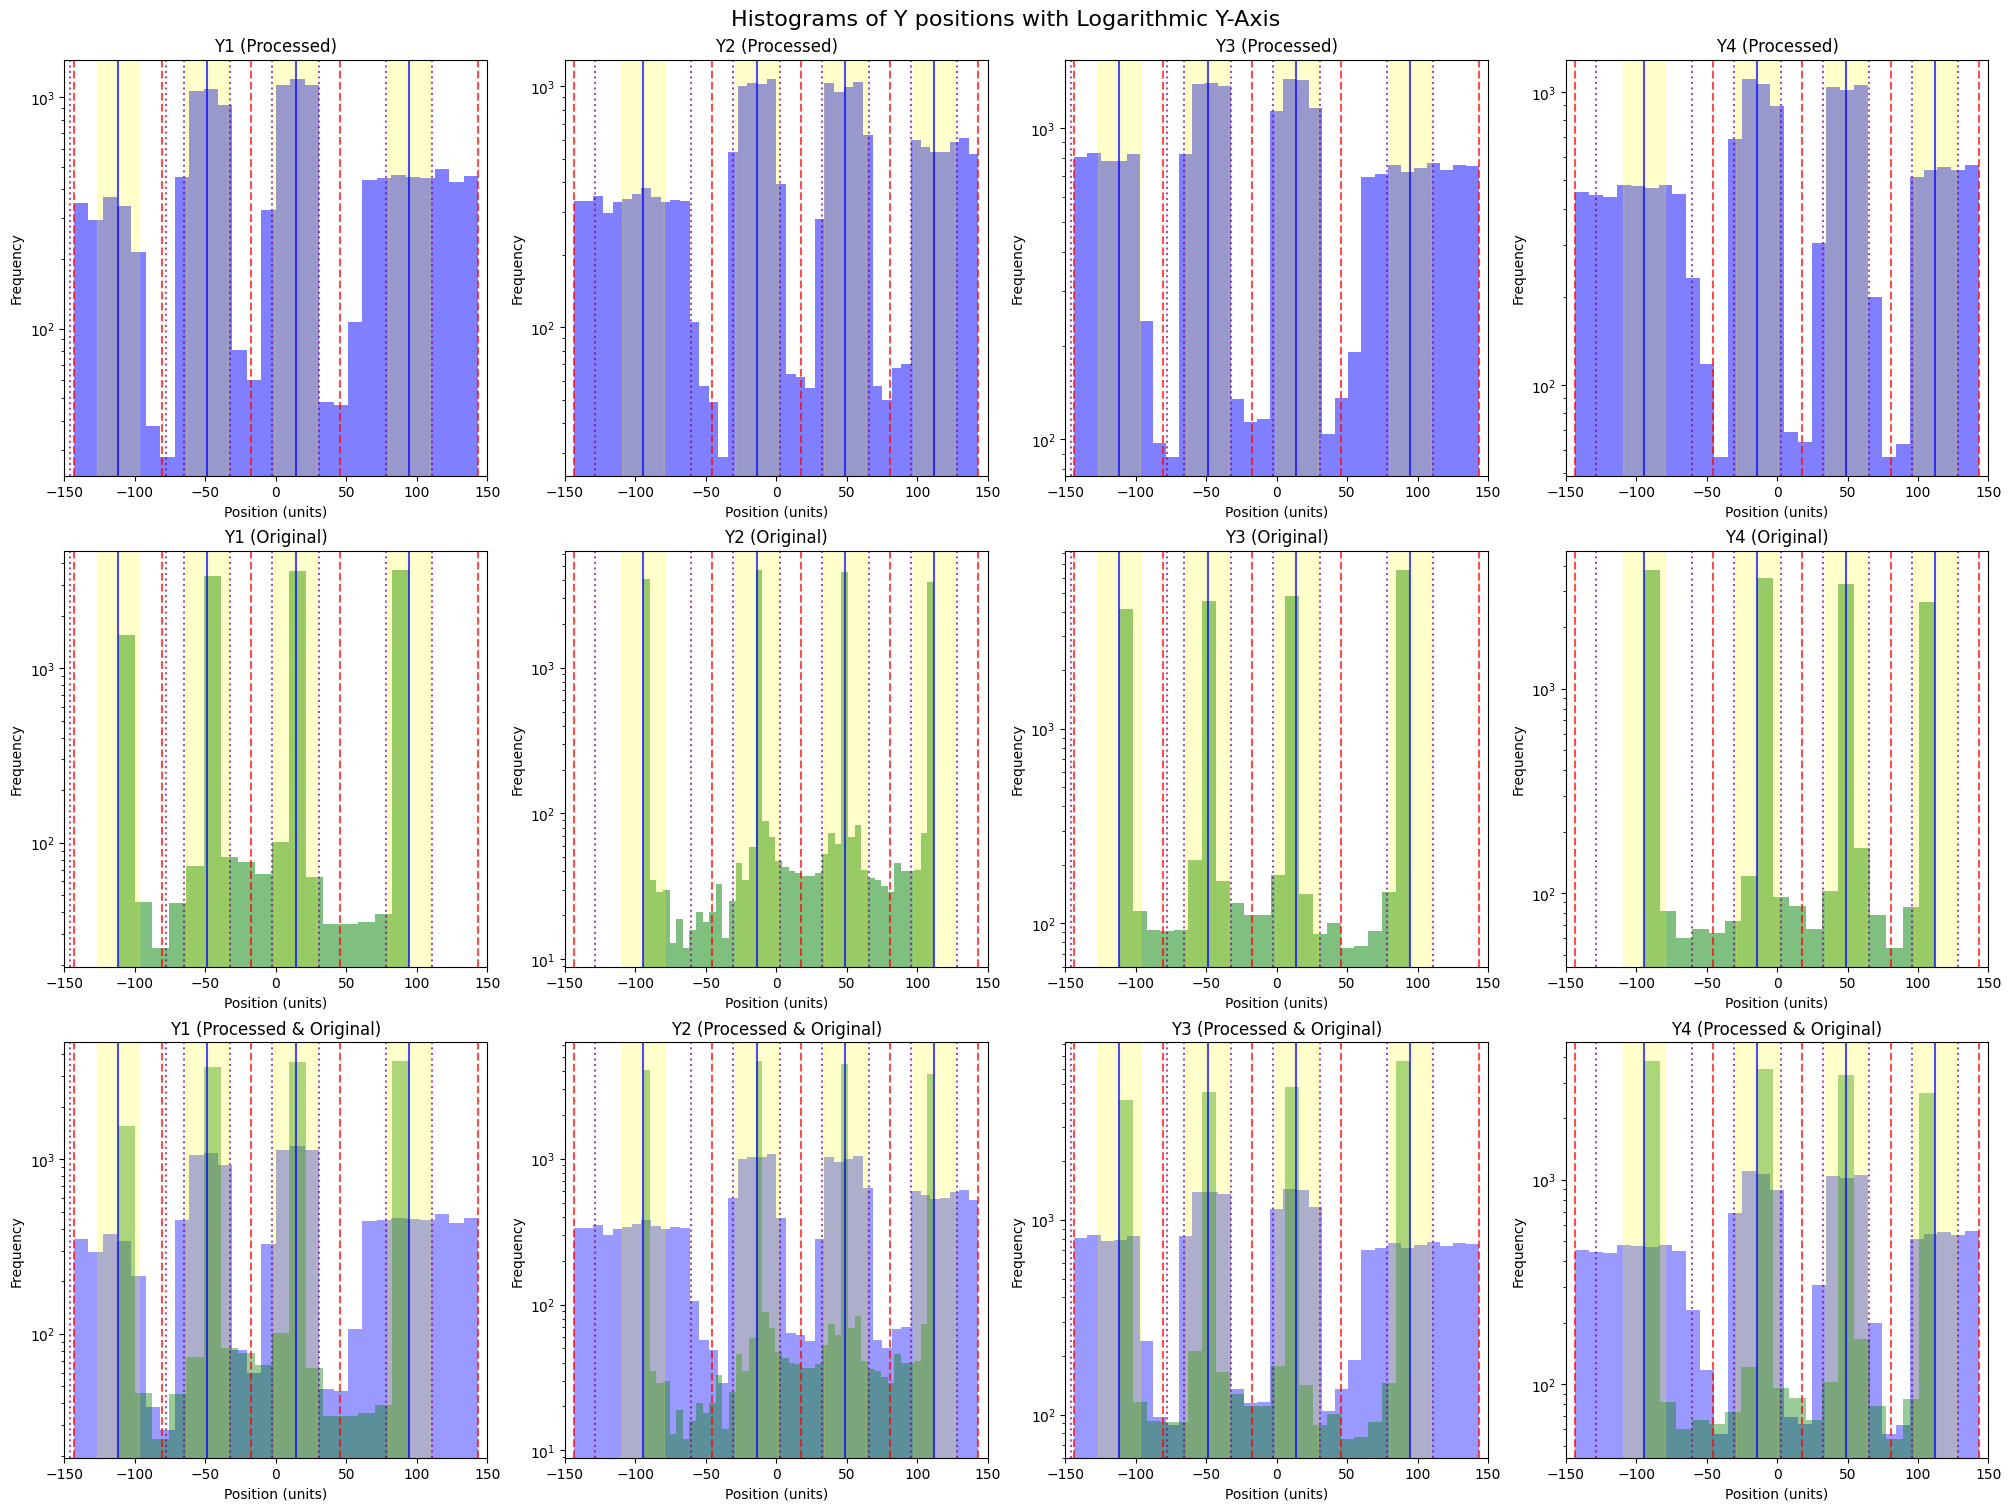

Y position calculated.


In [35]:
if y_position_complex_method:

    # Initialize empty lists for y values
    y_values_M1 = []
    y_values_M2 = []
    y_values_M3 = []
    y_values_M4 = []

    # To store original y values before applying the lost bands or threshold adjustments
    original_y_values_M1 = []
    original_y_values_M2 = []
    original_y_values_M3 = []
    original_y_values_M4 = []

    def transformation(Q, exp):
        Q = np.where(Q <= 0, 0, Q)
        value = Q ** exp
        return value

    # Loop through each module to compute y values
    for module in ['T1', 'T2', 'T3', 'T4']:
        if module in ['T1', 'T3']:
            thick_strip = 4
            y_pos = y_pos_T1_and_T3
            y_width = y_width_T1_and_T3
            lost_band = [width - induction_section for width in y_width]  # Calculate lost band
        elif module in ['T2', 'T4']:
            thick_strip = 1
            y_pos = y_pos_T2_and_T4
            y_width = y_width_T2_and_T4
            lost_band = [width - induction_section for width in y_width]  # Calculate lost band

        lost_band = np.array(lost_band) / 2

        # Get the relevant Q_sum columns for the current module
        Q_sum_cols = [f'{module.replace("T", "Q")}_Q_sum_{i+1}' for i in range(4)]
        Q_sum_values = calibrated_data[Q_sum_cols].abs()

        Q_sum_trans = transformation(Q_sum_values, transf_exp)

        # Compute the sum of Q_sum values row-wise
        Q_sum_total = Q_sum_trans.sum(axis=1)

        # Calculate y using vectorized operations
        epsilon = 1e-10  # A small value to avoid division by very small numbers or zero
        y = (Q_sum_trans * y_pos).sum(axis=1) / (Q_sum_total + epsilon)

        # Save original y values for comparison later (without lost band adjustments)
        original_y_values = y.copy()

        # Check if y is too close to any of the y_pos values
        for i in range(len(y)):
            if Q_sum_total[i] == 0:
                continue  # Skip rows where Q_sum_total is 0

            # Check if the y value is too close to any y_pos value
            for j in range(len(y_pos)):
                # Check if within the threshold
                if abs(y[i] - y_pos[j]) < threshold:
                    # Inside threshold: Generate a new value uniformly distributed in the lost band
                    lower_limit = y_pos[j] - lost_band[j]
                    upper_limit = y_pos[j] + lost_band[j]

                    # Special case for strips in positions (1, 4) to extend uniformly to the strip border
                    if j == 0:  # Strip 1: Extend to the left edge of the detector
                        lower_limit = -np.sum(y_width) / 2
                    elif j == len(y_pos) - 1:  # Strip 4: Extend to the right edge of the detector
                        upper_limit = np.sum(y_width) / 2

                    y[i] = np.random.uniform(lower_limit, upper_limit)

                elif threshold <= abs(y[i] - y_pos[j]) < y_width[j] / 2:
                    # Values between threshold and strip border are scaled between the lost band and the strip border
                    lower_limit = y_pos[j] - y_width[j] / 2
                    upper_limit = y_pos[j] + y_width[j] / 2
                    lost_band_value = lost_band[j]

                    if y[i] > y_pos[j]:
                        # Scale y[i] to fit between lost band and border (right side)
                        scaled_value = np.interp(
                            y[i],
                            [y_pos[j] + threshold, upper_limit],
                            [y_pos[j] + lost_band_value, upper_limit]
                        )
                        y[i] = scaled_value
                    else:
                        # Scale y[i] to fit between lost band and border (left side)
                        scaled_value = np.interp(
                            y[i],
                            [lower_limit, y_pos[j] - threshold],
                            [lower_limit, y_pos[j] - lost_band_value]
                        )
                        y[i] = scaled_value

        # Store the computed y values in the corresponding list
        if module == "T1":
            y_values_M1 = y
            original_y_values_M1 = original_y_values
        elif module == "T2":
            y_values_M2 = y
            original_y_values_M2 = original_y_values
        elif module == "T3":
            y_values_M3 = y
            original_y_values_M3 = original_y_values
        elif module == "T4":
            y_values_M4 = y
            original_y_values_M4 = original_y_values

else:

    # Initialize empty lists for y values
    y_values_M1 = []
    y_values_M2 = []
    y_values_M3 = []
    y_values_M4 = []

    # Loop through each module to compute y values
    for module in ['T1', 'T2', 'T3', 'T4']:
        if module in ['T1', 'T3']:
            thick_strip = 4
            y_pos = y_pos_T1_and_T3
        elif module in ['T2', 'T4']:
            thick_strip = 1
            y_pos = y_pos_T2_and_T4

        # Get the relevant Q_sum columns for the current module
        Q_sum_cols = [f'{module.replace("T", "Q")}_Q_sum_{i+1}' for i in range(4)]
        Q_sum_values = calibrated_data[Q_sum_cols].abs()

        # Compute the sum of Q_sum values row-wise
        Q_sum_total = Q_sum_values.sum(axis=1)

        # Calculate y using vectorized operations
        y = (Q_sum_values * y_pos).sum(axis=1) / Q_sum_total
        y[Q_sum_total == 0] = 0  # Set y to 0 where Q_sum_total is 0

        # Store the computed y values in the corresponding list
        if module == "T1":
            y_values_M1 = y.values
        elif module == "T2":
            y_values_M2 = y.values
        elif module == "T3":
            y_values_M3 = y.values
        elif module == "T4":
            y_values_M4 = y.values


y_values_dict = {
    'Y_1': y_values_M1,
    'Y_2': y_values_M2,
    'Y_3': y_values_M3,
    'Y_4': y_values_M4
}

y_values_df = pd.DataFrame(y_values_dict, index=calibrated_data.index)
calibrated_data = pd.concat([calibrated_data, y_values_df], axis=1)
calibrated_data = calibrated_data.copy()

if show_plots and y_position_complex_method:
    bin_number = 'auto'

    # Create a 3x4 grid for the plots
    fig, axs = plt.subplots(3, 4, figsize=(20, 15), constrained_layout=True)
    y_columns = ['Y_1', 'Y_2', 'Y_3', 'Y_4']
    titles = ['Y1', 'Y2', 'Y3', 'Y4']
    strip_borders_T1_and_T3 = np.cumsum(np.append(0, y_width_T1_and_T3)) - np.sum(y_width_T1_and_T3) / 2
    strip_borders_T2_and_T4 = np.cumsum(np.append(0, y_width_T2_and_T4)) - np.sum(y_width_T2_and_T4) / 2
    centers_dict = {'Y1': y_pos_T1_and_T3, 'Y3': y_pos_T1_and_T3, 'Y2': y_pos_T2_and_T4, 'Y4': y_pos_T2_and_T4}
    borders_dict = {'Y1': strip_borders_T1_and_T3, 'Y3': strip_borders_T1_and_T3, 'Y2': strip_borders_T2_and_T4, 'Y4': strip_borders_T2_and_T4}

    for i, (y_col, title) in enumerate(zip(y_columns, titles)):
        y_processed, y_original = calibrated_data[y_col].values, [original_y_values_M1, original_y_values_M2, original_y_values_M3, original_y_values_M4][i]
        y_non_zero_processed, y_non_zero_original = y_processed[y_processed != 0], y_original[y_original != 0]

        # Plot processed y-values
        axs[0, i].hist(y_non_zero_processed, bins=bin_number, alpha=0.5, color='blue', label='Processed')
        axs[0, i].set(title=f'{title} (Processed)', xlabel='Position (units)', ylabel='Frequency', xlim=(-150, 150), yscale='log')

        # Plot original y-values
        axs[1, i].hist(y_non_zero_original, bins=bin_number, alpha=0.5, color='green', label='Original')
        axs[1, i].set(title=f'{title} (Original)', xlabel='Position (units)', ylabel='Frequency', xlim=(-150, 150), yscale='log')

        # Plot both processed and original together in the third row
        axs[2, i].hist(y_non_zero_processed, bins=bin_number, alpha=0.4, color='blue', label='Processed')
        axs[2, i].hist(y_non_zero_original, bins=bin_number, alpha=0.4, color='green', label='Original')
        axs[2, i].set(title=f'{title} (Processed & Original)', xlabel='Position (units)', ylabel='Frequency', xlim=(-150, 150), yscale='log')

        # Add continuous lines for strip centers and borders in all rows
        for ax in [axs[0, i], axs[1, i], axs[2, i]]:
            for center in centers_dict[title]:
                ax.axvline(center, color='blue', linestyle='-', alpha=0.7)
            for border in borders_dict[title]:
                ax.axvline(border, color='red', linestyle='--', alpha=0.7)
            for band_border in [center + np.array([-lost_band[j], lost_band[j]]) for j, center in enumerate(centers_dict[title])]:
                ax.axvline(band_border[0], color='purple', linestyle=':', alpha=0.7)
                ax.axvline(band_border[1], color='purple', linestyle=':', alpha=0.7)
            for center in centers_dict[title]:
                ax.axvspan(center - threshold, center + threshold, color='yellow', alpha=0.2)

    plt.suptitle('Histograms of Y positions with Logarithmic Y-Axis', fontsize=16)

    if save_plots:
        name_of_file = 'y_positions_complex'
        final_filename = f'{fig_idx}_{name_of_file}.png'
        fig_idx += 1
        plot_list.append(final_filename)
        plt.savefig(final_filename, format='png')

    if show_plots: plt.show()
    plt.close()


if show_plots and y_position_complex_method == False:

    fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)
    y_columns = ['Y_1', 'Y_2', 'Y_3', 'Y_4']
    titles = ['Y1', 'Y2', 'Y3', 'Y4']

    # Loop through each Y column and plot in the corresponding subplot
    for i, (y_col, title) in enumerate(zip(y_columns, titles)):
        y = calibrated_data[y_col].values
        y_non_zero = y[y != 0]  # Filter out zeros

        # Plot histogram
        axs[i].hist(y_non_zero, bins=300, alpha=0.5, label=title)
        axs[i].set_title(title)
        axs[i].set_xlabel('Time (units)')
        axs[i].set_ylabel('Frequency')
        axs[i].set_yscale('log')  # Set y-axis to logarithmic scale
        axs[i].legend()

    plt.suptitle('Histograms of Y positions with Logarithmic Y-Axis', fontsize=16)

    if save_plots:
        name_of_file = 'y_positions_standard'
        final_filename = f'{fig_idx}_{name_of_file}.png'
        fig_idx += 1
        plot_list.append(final_filename)
        plt.savefig(final_filename, format='png')

    if show_plots: plt.show()
    plt.close()

print("Y position calculated.")

# Setting the variables for each RPC

In [36]:
exp_final_rpc = 1
weighting_threshold = 0.2

new_columns = {}

for i_plane in range(1, 5):
    # Get relevant column names for current plane
    T_sum_cols = [f'T{i_plane}_T_sum_{i+1}' for i in range(4)]
    T_diff_cols = [f'T{i_plane}_T_diff_{i+1}' for i in range(4)]
    Q_sum_cols = [f'Q{i_plane}_Q_sum_{i+1}' for i in range(4)]

    # Convert data to float, fill NaN, and calculate transformed charges
    T_sums, T_diffs, Q_sums = [calibrated_data[cols].astype(float).fillna(0) for cols in (T_sum_cols, T_diff_cols, Q_sum_cols)]

    # Apply weighting threshold
    Q_sums = np.array(Q_sums)
    Q_sums_og = Q_sums

    # Get maximum charge and apply threshold
    Q_max = np.max(Q_sums, axis=1)
    limit_value = weighting_threshold * Q_max[:, np.newaxis]
    Q_sums[Q_sums < limit_value] = 0

    # Compute the transformed charges
    Q_transformed = Q_sums ** exp_final_rpc
    Q_sum_axis = Q_transformed.sum(axis=1) + 1e-10

    # Calculate weighted sums
    weighted_T_sum = (T_sums.values * Q_transformed).sum(axis=1) / Q_sum_axis
    weighted_T_diff = (T_diffs.values * Q_transformed).sum(axis=1) / Q_sum_axis

    # Find the index of the maximum charge for each event
    Q_max_index = np.argmax(Q_sums_og, axis=1)

    # Extract T_sum and T_diff corresponding to the maximum charge index
    T_sum_max_charge = T_sums.values[np.arange(len(T_sums)), Q_max_index]
    T_diff_max_charge = T_diffs.values[np.arange(len(T_diffs)), Q_max_index]

    # Conditional logic to select weighted values or max charge based on `weighted`
    if weighted:
        # Use weighted values
        new_columns[f'T{i_plane}_T_sum_final'] = weighted_T_sum
        new_columns[f'T{i_plane}_T_diff_final'] = weighted_T_diff
    else:
        # Use values corresponding to the maximum charge index
        new_columns[f'T{i_plane}_T_sum_final'] = T_sum_max_charge
        new_columns[f'T{i_plane}_T_diff_final'] = T_diff_max_charge

    # Always store the final Q_sum
    new_columns[f'T{i_plane}_Q_sum_final'] = Q_sums_og.sum(axis=1)

# Concatenate all new columns to the calibrated_data DataFrame at once
new_columns_df = pd.DataFrame(new_columns, index=calibrated_data.index)
calibrated_data = pd.concat([calibrated_data, new_columns_df], axis=1)
calibrated_data = calibrated_data.copy()



print("--------------------- Filter 6: calibrated data ----------------------")
for col in calibrated_data.columns:
    if 'T_sum_final' in col:
        calibrated_data[col] = np.where((calibrated_data[col] < T_sum_RPC_left) | (calibrated_data[col] > T_sum_RPC_right), 0, calibrated_data[col])
    if 'T_diff_final' in col:
        calibrated_data[col] = np.where((calibrated_data[col] < T_diff_RPC_left) | (calibrated_data[col] > T_diff_RPC_right), 0, calibrated_data[col])
    if 'Q_sum_final' in col:
        calibrated_data[col] = np.where((calibrated_data[col] < Q_RPC_left) | (calibrated_data[col] > Q_RPC_right), 0, calibrated_data[col])
    if 'Y_' in col:
        calibrated_data[col] = np.where((calibrated_data[col] < Y_RPC_left) | (calibrated_data[col] > Y_RPC_right), 0, calibrated_data[col])

--------------------- Filter 6: calibrated data ----------------------


# TimTrack fitting algorithm

Slowness not fixed.
The file uncertainties_per_strip.txt does not exist in the working directory.
-----------------------------
30524 events to be fitted
-----------------------------
TimTrack iteration 0
-----------------------------


Processing events: 100%|██████████| 30524/30524 [02:02<00:00, 249.68it/s]


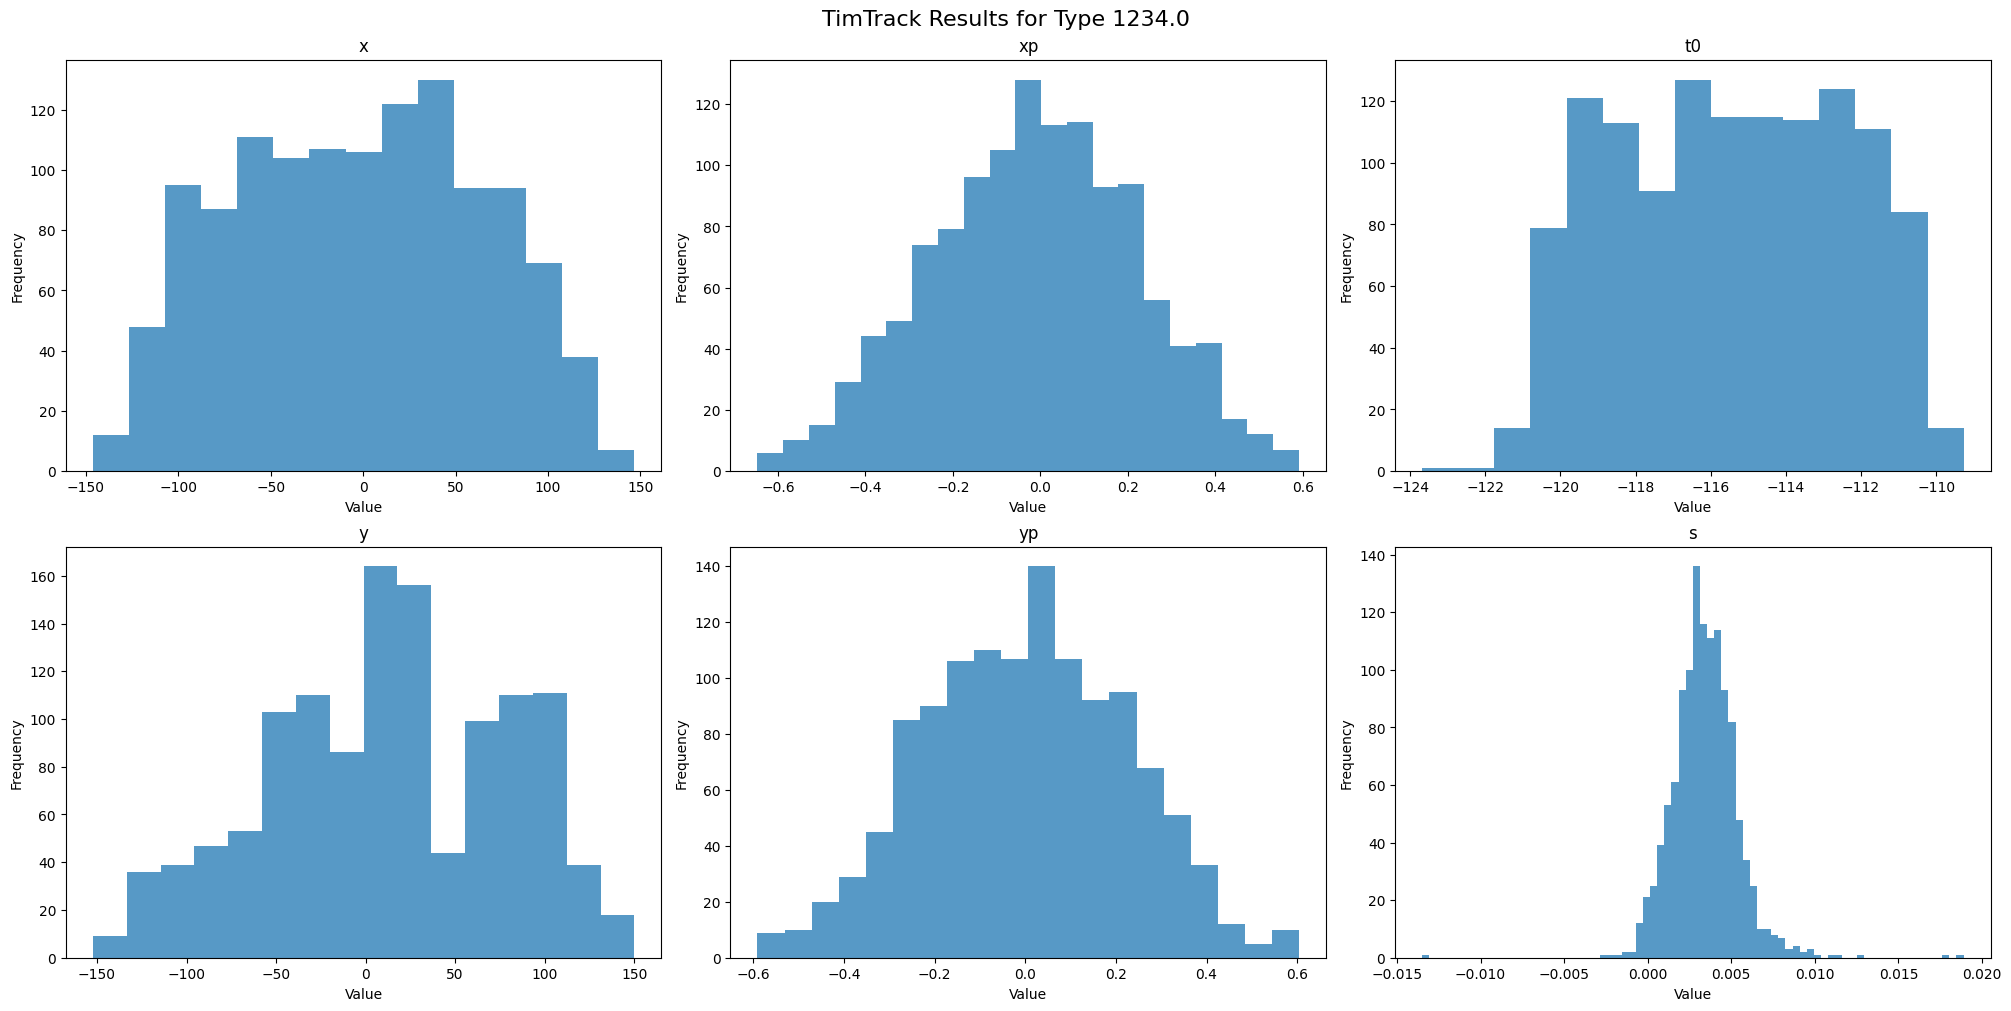

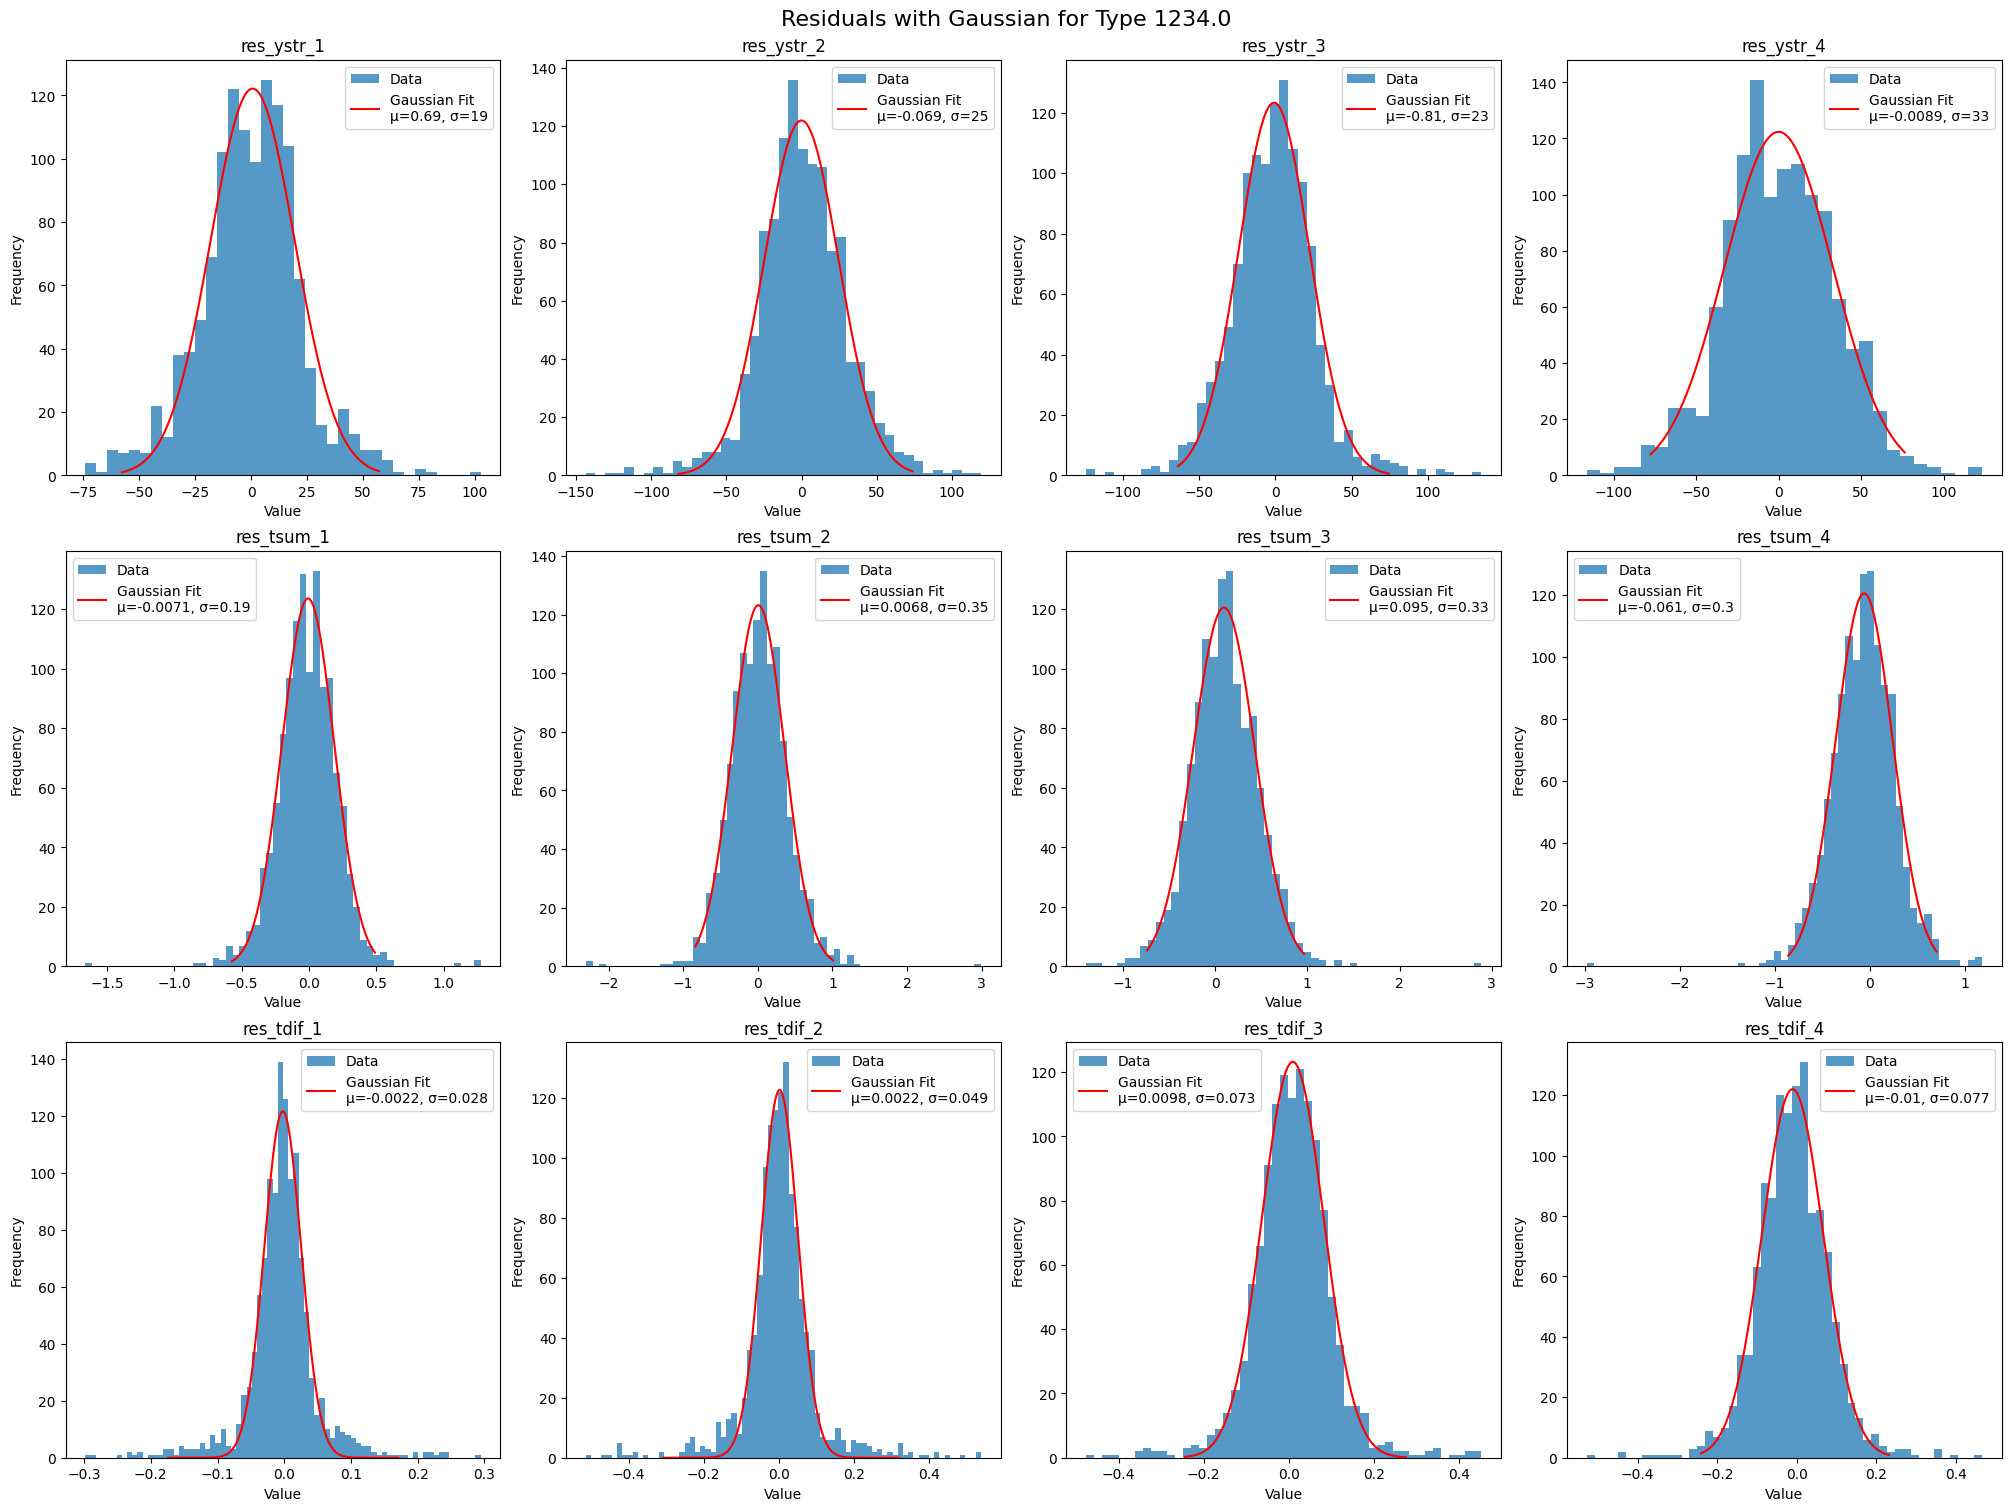

-----------------------------
Data purity is 56.6%
Datafile saved in 'list_events_2024.12.01_21.33.59.txt'.


In [37]:
if fixed_speed:
    print("Fixed the slowness to the speed of light.")
else:
    print("Slowness not fixed.")


# Uncertainties ---------------------------------------------------------------
uncertainty_filename = "uncertainties_per_strip.txt"
if os.path.exists(uncertainty_filename):
    print(f"The file {uncertainty_filename} exists in the working directory.")
    use_uncertainties = True
else:
    print(f"The file {uncertainty_filename} does not exist in the working directory.")
    use_uncertainties = False
if use_uncertainties:
    flattened_matrix_loaded = np.loadtxt('uncertainties_per_strip.txt')
    uncertainties_per_strip = flattened_matrix_loaded.reshape((4, 4, 3))
# -----------------------------------------------------------------------------

def fmgx(nvar, npar, vs, ss, zi): # G matrix for t measurements in X-axis
    mg = np.zeros([nvar, npar])
    XP = vs[1]; YP = vs[3]
    if fixed_speed:
        S0 = sc
    else:
        S0 = vs[5]
    kz = sqrt(1 + XP*XP + YP*YP)
    kzi = 1 / kz
    mg[0,2] = 1
    mg[0,3] = zi
    mg[1,1] = kzi * S0 * XP * zi
    mg[1,3] = kzi * S0 * YP * zi
    mg[1,4] = 1
    if fixed_speed == False: mg[1,5] = kz * zi
    mg[2,0] = ss
    mg[2,1] = ss * zi
    return mg

def fmwx(nvar, vsig): # Weigth matrix
    sy = vsig[0];  sts=vsig[1];  std =vsig[2]
    mw = np.zeros([nvar, nvar])
    mw[0,0] = 1/(sy*sy)
    mw[1,1] = 1/(sts*sts)
    mw[2,2] = 1/(std*std)
    return mw

def fvmx(nvar, vs, lenx, ss, zi): # Fitting model array with X-strips
    vm = np.zeros(nvar)
    X0 = vs[0]; XP = vs[1]; Y0 = vs[2]; YP = vs[3]; T0 = vs[4]
    if fixed_speed:
        S0 = sc
    else:
        S0 = vs[5]
    kz = np.sqrt(1 + XP*XP + YP*YP)
    xi = X0 + XP * zi
    yi = Y0 + YP * zi
    ti = T0 + kz * S0 * zi
    th = 0.5 * lenx * ss   # tau half
    lxmn = -lenx/2
    vm[0] = yi
    vm[1] = th + ti
    vm[2] = ss * (xi-lxmn) - th
    return vm

def fmkx(nvar, npar, vs, vsig, ss, zi): # K matrix
    mk  = np.zeros([npar,npar])
    mg  = fmgx(nvar, npar, vs, ss, zi)
    mgt = mg.transpose()
    mw  = fmwx(nvar, vsig)
    mk  = mgt @ mw @ mg
    return mk

def fvax(nvar, npar, vs, vdat, vsig, lenx, ss, zi): # va vector
    va = np.zeros(npar)
    mw = fmwx(nvar, vsig)
    vm = fvmx(nvar, vs, lenx, ss, zi)
    mg = fmgx(nvar, npar, vs, ss, zi)
    vg = vm - mg @ vs
    vdmg = vdat - vg
    va = mg.transpose() @ mw @ vdmg
    return va

def fs2(nvar, npar, vs, vdat, vsig, lenx, ss, zi):
    va = np.zeros(npar)
    mk = fmkx(nvar, npar, vs, vsig, ss, zi)
    va = fvax(nvar, npar, vs, vdat, vsig, lenx, ss, zi)
    vm = fvmx(nvar, vs, lenx, ss, zi)
    mg = fmgx(nvar, npar, vs, ss, zi)
    mw = fmwx(nvar, vsig)
    vg = vm - mg @ vs
    vdmg = vdat - vg
    mg = fmgx(nvar, npar, vs, ss, zi)
    sk = vs.transpose() @ mk @ vs
    sa = vs.transpose() @ va
    s0 = vdmg.transpose() @ mw @ vdmg
    s2 = sk - 2*sa + s0
    return s2

def fmahd(npar, vin1, vin2, merr): # Mahalanobis distance
    vdif  = np.subtract(vin1,vin2)
    vdsq  = np.power(vdif,2)
    verr  = np.diag(merr,0)
    vsig  = np.divide(vdsq,verr)
    dist  = np.sqrt(np.sum(vsig))
    return dist

def fres(vs, vdat, lenx, ss, zi):  # Residuals array
    X0 = vs[0]; XP = vs[1]; Y0 = vs[2]; YP = vs[3]; T0 = vs[4]
    if fixed_speed:
        S0 = sc
    else:
        S0 = vs[5]
    kz = sqrt(1 + XP*XP + YP*YP)
    # Fitted values
    xfit  = X0 + XP * zi
    yfit  = Y0 + YP * zi
    tffit = T0 + S0 * kz * zi + (lenx/2 + xfit) * ss
    tbfit = T0 + S0 * kz * zi + (lenx/2 - xfit) * ss
    tsfit = 0.5 * (tffit + tbfit)
    tdfit = 0.5 * (tffit - tbfit)
    # Data values
    ydat  = vdat[0]
    tsdat = vdat[1]
    tddat = vdat[2]
    # Residuals
    yr   = (yfit   - ydat)
    tsr  = (tsfit  - tsdat)
    tdr  = (tdfit  - tddat)
    # DeltaX_tsum = abs( (tsdat - ( T0 + S0 * kz * zi ) ) / 0.5 / ss - lenx)
    vres = [yr, tsr, tdr]
    return vres

if fixed_speed:
    npar = 5
else:
    npar = 6
nvar = 3

i = 0
ntrk  = len(calibrated_data)
if limit and limit_number < ntrk: ntrk = limit_number
print("-----------------------------")
print(f"{ntrk} events to be fitted")

timtrack_results = ['x', 'xp', 'y', 'yp', 't0', 's', 'type', 'th_chi',
                'charge_1', 'charge_2', 'charge_3', 'charge_4', 'charge_event',
                'res_ystr_1', 'res_ystr_2', 'res_ystr_3', 'res_ystr_4',
                'res_tsum_1', 'res_tsum_2', 'res_tsum_3', 'res_tsum_4',
                'res_tdif_1', 'res_tdif_2', 'res_tdif_3', 'res_tdif_4']

new_columns_df = pd.DataFrame(0., index=calibrated_data.index, columns=timtrack_results)
calibrated_data = pd.concat([calibrated_data, new_columns_df], axis=1)

if timtrack_iteration:
    repeat = number_of_TT_executions - 1
else:
    repeat = 0

iteration = 0

while iteration <= repeat:
    calibrated_data.loc[:, timtrack_results] = 0.0

    fitted = 0
    print("-----------------------------")
    print(f"TimTrack iteration {iteration}")
    print("-----------------------------")
    for idx, track in tqdm(calibrated_data.iterrows(), total=calibrated_data.shape[0], desc="Processing events"):

        # INTRODUCTION --------------------------------------------------------
        track_numeric = pd.to_numeric(track.drop('datetime'), errors='coerce')
        if track_numeric.isna().any() or np.isinf(track_numeric.values).any():
            print(track_numeric)
            continue

        name_type = ""
        planes_to_iterate = []

        charge_event = 0
        for i_plane in range(nplan):
            # Check if the sum of the charges in the current plane is non-zero
            charge_plane = getattr(track, f'T{i_plane + 1}_Q_sum_final')
            if charge_plane > 0:
                # Append the plane number to name_type and planes_to_iterate
                name_type += f'{i_plane + 1}'
                planes_to_iterate.append(i_plane + 1)
                calibrated_data.at[idx, f'charge_{i_plane + 1}'] = charge_plane
                charge_event =+ charge_plane

        calibrated_data.at[idx, 'charge_event'] = charge_event

        # Convert planes_to_iterate into a numpy array if needed for further processing
        planes_to_iterate = np.array(planes_to_iterate)

        # FITTING ----------------------------------------------------------------------------

        if len(planes_to_iterate) > 1:
            if fixed_speed:
                vs  = np.asarray([0,0,0,0,0])
            else:
                vs  = np.asarray([0,0,0,0,0,sc])
            mk  = np.zeros([npar, npar])
            va  = np.zeros(npar)
            istp = 0   # nb. of fitting steps
            dist = d0
            while dist>cocut:
                # for iplane, istrip in zip(planes_to_iterate, istrip_list):
                for iplane in planes_to_iterate:

                    # Data --------------------------------------------------------
                    zi  = z_positions[iplane - 1]                                        # z pos
                    yst = getattr(track, f'Y_{iplane}')                              # y position
                    sy  = anc_sy                           # uncertainty in y
                    ts  = getattr(track, f'T{iplane}_T_sum_final')
                    # ts  = getattr(track, f'T{iplane}_T_sum_{istrip}')            # t sum
                    sts = anc_std                                                       # uncertainty in t sum
                    td  = getattr(track, f'T{iplane}_T_diff_final')
                    # td  = getattr(track, f'T{iplane}_T_diff_{istrip}')            # t dif
                    std = anc_std                                                       # uncertainty in tdif
                    # -------------------------------------------------------------

                    vdat = [yst, ts, td]
                    vsig = [sy, sts, std]
                    mk = mk + fmkx(nvar, npar, vs, vsig, ss, zi)
                    va = va + fvax(nvar, npar, vs, vdat, vsig, lenx, ss, zi)
                istp = istp + 1
                merr = linalg.inv(mk)     # Error matrix
                vs0 = vs
                vs  = merr @ va          # sEa equation
                dist = fmahd(npar, vs, vs0, merr)
                if istp > 5:
                    continue
            dist = 10
            vsf = vs       # final saeta
            fitted += 1
        else:
            continue

        # RESIDUAL ANALYSIS ----------------------------------------------------------------------------

        # Theoretical chisq
        chi2 = fs2(nvar, npar, vsf, vdat, vsig, lenx, ss, zi)

        # Fit residuals
        res_ystr  = 0
        res_tsum = 0
        res_tdif = 0
        ndat     = 0

        if len(planes_to_iterate) > 1:
            # for iplane, istrip in zip(planes_to_iterate, istrip_list):
            for iplane in planes_to_iterate:

                ndat = ndat + nvar

                # Data --------------------------------------------------------
                zi  = z_positions[iplane - 1]                                        # z pos
                yst = getattr(track, f'Y_{iplane}')                              # y position
                sy  = anc_sy                           # uncertainty in y
                ts  = getattr(track, f'T{iplane}_T_sum_final')
                # ts  = getattr(track, f'T{iplane}_T_sum_{istrip}')            # t sum
                sts = anc_std                                                       # uncertainty in t sum
                td  = getattr(track, f'T{iplane}_T_diff_final')
                # td  = getattr(track, f'T{iplane}_T_diff_{istrip}')            # t dif
                std = anc_std                                                       # uncertainty in tdif
                # -------------------------------------------------------------

                vdat = [yst, ts, td]
                vsig = [sy, sts, std]
                vres = fres(vsf, vdat, lenx, ss, zi)

                calibrated_data.at[idx, f'res_ystr_{iplane}'] = vres[0]
                calibrated_data.at[idx, f'res_tsum_{iplane}'] = vres[1]
                calibrated_data.at[idx, f'res_tdif_{iplane}'] = vres[2]

                res_ystr   = res_ystr  + vres[0]
                res_tsum  = res_tsum + vres[1]
                res_tdif  = res_tdif + vres[2]

            ndf  = ndat - npar    # number of degrees of freedom; was ndat - npar

            calibrated_data.at[idx, 'type'] = builtins.int(name_type)
            calibrated_data.at[idx, 'th_chi'] = chi2

            calibrated_data.at[idx, 'x'] = vsf[0]
            calibrated_data.at[idx, 'xp'] = vsf[1]
            calibrated_data.at[idx, 'y'] = vsf[2]
            calibrated_data.at[idx, 'yp'] = vsf[3]
            calibrated_data.at[idx, 't0'] = vsf[4]

            if fixed_speed:
                calibrated_data.at[idx, 's'] = sc
            else:
                calibrated_data.at[idx, 's'] = vsf[5]

        # Residual analysis with 4-plane tracks (hide a plane and make a fit in the 3 remaining planes)
        if len(planes_to_iterate) == 4 and res_ana_removing_planes:

            # for iplane_ref, istrip_ref in zip(planes_to_iterate, istrip_list):
            for iplane_ref in planes_to_iterate:

                # Data --------------------------------------------------------
                z_ref  = z_positions[iplane_ref - 1]                                        # z pos
                y_strip_ref = getattr(track, f'Y_{iplane_ref}')                              # y position
                sy  = anc_sy                                          # uncertainty in y
                t_sum_ref  = getattr(track, f'T{iplane_ref}_T_sum_final')                    # uncertainty in y
                # t_sum_ref  = getattr(track, f'T{iplane_ref}_T_sum_{istrip_ref}')            # t sum
                sts = anc_sts    # uncertainty in t sum
                t_dif_ref  = getattr(track, f'T{iplane_ref}_T_diff_final')                                                        # uncertainty in t sum
                # t_dif_ref  = getattr(track, f'T{iplane_ref}_T_diff_{istrip_ref}')            # t dif
                std = anc_std                                                       # uncertainty in tdif
                # -----------------------------------------------------------------

                vdat_ref = [ y_strip_ref, t_sum_ref, t_dif_ref]

                # istrip_list_short = istrip_list[ planes_to_iterate != iplane_ref ]
                planes_to_iterate_short = planes_to_iterate[planes_to_iterate != iplane_ref]

                vs     = vsf  # We start with the previous 4-planes fit
                mk     = np.zeros([npar, npar])
                va     = np.zeros(npar)
                ist3 = 0
                dist = d0
                while dist>cocut:
                    # for iplane, istrip in zip(planes_to_iterate_short, istrip_list_short):
                    for iplane in planes_to_iterate_short:

                        # Data --------------------------------------------------------
                        zi  = z_positions[iplane - 1] - z_ref                                       # z pos
                        yst = getattr(track, f'Y_{iplane}')                              # y position
                        sy  = anc_sy               # uncertainty in y
                        ts  = getattr(track, f'T{iplane}_T_sum_final')                                                              # uncertainty in y
                        # ts  = getattr(track, f'T{iplane}_T_sum_{istrip}')            # t sum
                        sts = anc_sts                   # uncertainty in t sum
                        td  = getattr(track, f'T{iplane}_T_diff_final')                                                        # uncertainty in t sum
                        # td  = getattr(track, f'T{iplane}_T_diff_{istrip}')            # t dif
                        std = anc_std                                                       # uncertainty in tdif
                        # -------------------------------------------------------------

                        vdat = [yst, ts, td]
                        vsig = [sy, sts, std]
                        mk = mk + fmkx(nvar, npar, vs, vsig, ss, zi)
                        va = va + fvax(nvar, npar, vs, vdat, vsig, lenx, ss, zi)
                    ist3 = ist3 + 1
                    merr = linalg.inv(mk)     # Error matrix
                    vs0 = vs
                    vs  = merr @ va          # ---------------------  sEa equation
                    dist = fmahd(npar, vs, vs0, merr)

                vsig = [sy, sts, std]
                # v_track  = [ iplane_ref, istrip_ref ]
                v_res    = fres(vs, vdat_ref, lenx, ss, 0)

                calibrated_data.at[idx, f'ext_res_ystr_{iplane_ref}'] = v_res[0]
                calibrated_data.at[idx, f'ext_res_tsum_{iplane_ref}'] = v_res[1]
                calibrated_data.at[idx, f'ext_res_tdif_{iplane_ref}'] = v_res[2]

    # TimTrack result and residue plots ---------------------------------------
    if create_plots and residual_plots:
        timtrack_columns = ['x', 'xp', 't0', 'y', 'yp', 's']
        residual_columns = [
            'res_ystr_1', 'res_ystr_2', 'res_ystr_3', 'res_ystr_4',
            'res_tsum_1', 'res_tsum_2', 'res_tsum_3', 'res_tsum_4',
            'res_tdif_1', 'res_tdif_2', 'res_tdif_3', 'res_tdif_4'
        ]

        # Individual plots for each unique type
        unique_types = [1234.0]
        for t in unique_types:
            subset_data = calibrated_data[calibrated_data['type'] == t]

            # Plot for the 'timtrack_columns' and 'residual_columns' based on type
            plot_histograms_and_gaussian(subset_data, timtrack_columns, f"TimTrack Results for Type {t}", figure_number=1)
            plot_histograms_and_gaussian(subset_data, residual_columns, f"Residuals with Gaussian for Type {t}", figure_number=2, fit_gaussian=True, quantile=0.99)
    # -------------------------------------------------------------------------

    # FILTER 6: TSUM, TDIF, QSUM, QDIF TIMTRACK X, Y, etc. FILTER --> IF THE
    #   RESULT IS OUT OF RANGE, REMOVE THE MODULE WITH LARGEST RESIDUE
    for index, row in calibrated_data.iterrows():
        # Check if x, y, or t0 is outside the desired range
        if (row['t0'] > t0_right_filter or row['t0'] < t0_left_filter) or \
            (row['x'] > pos_filter or row['x'] < -pos_filter or row['x'] == 0) or \
            (row['y'] > pos_filter or row['y'] < -pos_filter or row['y'] == 0) or \
            (row['xp'] > proj_filter or row['xp'] < -proj_filter or row['xp'] == 0) or \
            (row['yp'] > proj_filter or row['yp'] < -proj_filter or row['yp'] == 0) or \
            (row['s'] > slowness_filter_right or row['s'] < slowness_filter_left or row['s'] == 0) or\
            (row['charge_event'] > charge_event_right_filter or row['charge_event'] < charge_event_left_filter or row['charge_event'] == 0):

            # Find the module with the largest absolute residue value
            max_residue = 0
            module_to_zero = None

            for i in range(1, 5):
                res_tsum = abs(row[f'res_tsum_{i}'])
                res_tdif = abs(row[f'res_tdif_{i}'])
                res_ystr = abs(row[f'res_ystr_{i}'])

                # Calculate the maximum residue for the module
                max_module_residue = max(res_tsum, res_tdif, res_ystr)

                if max_module_residue > max_residue:
                    max_residue = max_module_residue
                    module_to_zero = i

            # If a module is identified, set related values to 0
            if module_to_zero:
                calibrated_data.at[index, f'Y_{module_to_zero}'] = 0
                calibrated_data.at[index, f'T{module_to_zero}_T_sum_final'] = 0
                calibrated_data.at[index, f'T{module_to_zero}_T_diff_final'] = 0
                calibrated_data.at[index, f'T{module_to_zero}_Q_sum_final'] = 0


    # FILTER 7: TSUM, TDIF, QSUM, QDIF TIMTRACK RESIDUE FILTER --> 0 THE COMPONENT THAT HAS LARGE RESIDUE
    for index, row in calibrated_data.iterrows():
        for i in range(1, 5):
            if abs(row[f'res_tsum_{i}']) > res_tsum_filter or \
                abs(row[f'res_tdif_{i}']) > res_tdif_filter or \
                 abs(row[f'res_ystr_{i}']) > res_ystr_filter:

                calibrated_data.at[index, f'Y_{i}'] = 0
                calibrated_data.at[index, f'T{i}_T_sum_final'] = 0
                calibrated_data.at[index, f'T{i}_T_diff_final'] = 0
                calibrated_data.at[index, f'T{i}_Q_sum_final'] = 0

    iteration += 1
    # End of TimTrack loop ---------------------------------------------------------------

def calculate_angles(xproj, yproj):
    phi = np.arctan2(yproj, xproj)
    theta = np.arccos(1 / np.sqrt(xproj**2 + yproj**2 + 1))
    return theta, phi

theta, phi = calculate_angles(calibrated_data['xp'], calibrated_data['yp'])
new_columns_df = pd.DataFrame({'theta': theta, 'phi': phi}, index=calibrated_data.index)
calibrated_data = pd.concat([calibrated_data, new_columns_df], axis=1)
calibrated_data = calibrated_data.copy()

# FILTER 8: X, Y, T FILTER: IGNORE THE EVENT IF (AFTER ALL) ANY OF THEM GOES OUR OF BOUNDS
for col in calibrated_data.columns:
    if 't0' == col:
        calibrated_data.loc[:, col] = np.where(
            (calibrated_data[col] > t0_right_filter) | (calibrated_data[col] < t0_left_filter), 0, calibrated_data[col])
    if 'x' == col or 'y' == col:
        cond_bound = (calibrated_data[col] > pos_filter) | (calibrated_data[col] < -pos_filter)
        cond_zero = (calibrated_data[col] == 0)
        calibrated_data.loc[:, col] = np.where((cond_bound | cond_zero), 0, calibrated_data[col])
    if 'xp' == col or 'yp' == col:
        cond_bound = (calibrated_data[col] > proj_filter) | (calibrated_data[col] < -proj_filter)
        cond_zero = (calibrated_data[col] == 0)
        calibrated_data.loc[:, col] = np.where((cond_bound | cond_zero), 0, calibrated_data[col])
    if 's' == col:
        cond_bound = (calibrated_data[col] > slowness_filter_right) | (calibrated_data[col] < slowness_filter_left)
        cond_zero = (calibrated_data[col] == 0)
        calibrated_data.loc[:, col] = np.where((cond_bound | cond_zero), 0, calibrated_data[col])

cond = (calibrated_data['x'] != 0) & (calibrated_data['xp'] != 0) &\
       (calibrated_data['y'] != 0) & (calibrated_data['yp'] != 0) &\
       (calibrated_data['s'] != 0) & (calibrated_data['t0'] != 0)

final_data = calibrated_data.loc[cond].copy()

# Counting the number of non-zero charge strips for each module
final_data.loc[:, 'nstrips_1'] = final_data[['Q1_Q_sum_1', 'Q1_Q_sum_2', 'Q1_Q_sum_3', 'Q1_Q_sum_4']].astype(bool).sum(axis=1)
final_data.loc[:, 'nstrips_2'] = final_data[['Q2_Q_sum_1', 'Q2_Q_sum_2', 'Q2_Q_sum_3', 'Q2_Q_sum_4']].astype(bool).sum(axis=1)
final_data.loc[:, 'nstrips_3'] = final_data[['Q3_Q_sum_1', 'Q3_Q_sum_2', 'Q3_Q_sum_3', 'Q3_Q_sum_4']].astype(bool).sum(axis=1)
final_data.loc[:, 'nstrips_4'] = final_data[['Q4_Q_sum_1', 'Q4_Q_sum_2', 'Q4_Q_sum_3', 'Q4_Q_sum_4']].astype(bool).sum(axis=1)

print("-----------------------------")
print(f"Data purity is {len(final_data) / raw_data_len*100:.1f}%")

import builtins
def round_to_4_significant_digits(x):
    try:
        # Use builtins.float to avoid any overridden names
        return builtins.float(f"{builtins.float(x):.4g}")
    except (builtins.ValueError, builtins.TypeError):
        return x

# Apply the function to each numeric column using .loc to avoid SettingWithCopyWarning
for col in final_data.select_dtypes(include=[np.number]).columns:
    final_data.loc[:, col] = final_data[col].apply(round_to_4_significant_digits)

# Save the data
final_data.to_csv(save_filename, index = False, sep=' ')
print(f"Datafile saved in 'list_events_{save_filename_suffix}.txt'.")

---
---
# **Part 3.** Reading the results

## **Part 3.a.** Angular distributions

In [38]:
reload = True
if reload:
    final_data = pd.read_csv('/content/drive/My Drive/MRPC_DRD1_2024/DATA/processed_events.txt', sep=' ')

In [39]:
results_tracking = final_data[['datetime', 'x', 'y', 'theta', 'phi', 's', 'charge_event', 'type']].copy()

results_tracking['theta'] = np.rad2deg(results_tracking['theta'])
results_tracking['phi'] = np.rad2deg(results_tracking['phi'])
results_tracking['s'] = 1 / results_tracking['s']
results_tracking = results_tracking[(results_tracking['s'] >= 0) & (results_tracking['s'] <= 1000)]
results_tracking['s'] = 1 / results_tracking['s']

The results can be made into histograms, 1D and 2D.

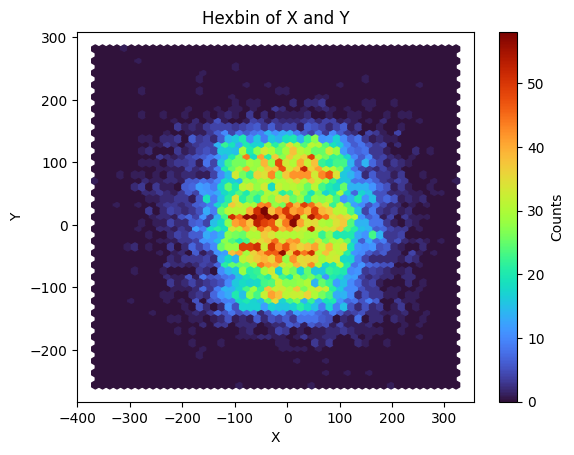

In [40]:
plt.hexbin(results_tracking['x'], results_tracking['y'], gridsize=50, cmap='turbo')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Counts')
plt.title('Hexbin of X and Y')
plt.show()

# ***HISTOGRAM OTHER RELATIONS BETWEEN VARIABLES IN 1D AND 2D, FOR EXAMPLE TO GET THE FLUX IN THE CELESTIAL SPHERE***

## **Part 3.b.** Efficiency calculation

The efficiency of detection in a certain plane can be calculated using the other three planes.

For example, if a particle is detected in the 1st plane, the 3rd and the 4th, the 2nd plane will be checked. In case there is an event in that plane, it will count to the efficiency, in case there is not an event, it will not count. In the end, a detected/crossed ratio is calculated. The same procedure is repeated for the four planes.

First check the elements in the 'type' column.

In [41]:
print(results_tracking['type'])

0         23.0
1         12.0
2         23.0
3         12.0
4         12.0
         ...  
22049    234.0
22050     13.0
22051    123.0
22052     12.0
22053     23.0
Name: type, Length: 17941, dtype: float64


The two plane events are not being considered for efficiency.

In [42]:
results_tracking_three_plane = results_tracking[results_tracking['type'].apply(lambda x: len(str(int(float(x)))) >= 3)]
types = results_tracking_three_plane['type']
print(types)

6         234.0
9        1234.0
14       1234.0
18       1234.0
19        134.0
          ...  
22039     123.0
22041     234.0
22045     123.0
22049     234.0
22051     123.0
Name: type, Length: 6552, dtype: float64


Now the efficiency can be estimated taking into account how many traces that passed by a plane were not detected, then calculating the complementary.

In [43]:
# Calculate the efficiency for each plane

# Count occurrences of each type
count_123 = sum(types == 123.0)
count_234 = sum(types == 234.0)
count_134 = sum(types == 134.0)
count_124 = sum(types == 124.0)
count_1234 = sum(types == 1234.0)

# Calculate efficiencies
detected_1 = count_123 + count_134 + count_124 + count_1234
detected_2 = count_123 + count_234 + count_124 + count_1234
detected_3 = count_123 + count_134 + count_234 + count_1234
detected_4 = count_134 + count_234 + count_124 + count_1234

eff_1 = detected_1 / len(types)
eff_2 = detected_2 / len(types)
eff_3 = detected_3 / len(types)
eff_4 = detected_4 / len(types)

print(f"Efficiency for 1: {eff_1:.2f}")
print(f"Efficiency for 2: {eff_2:.2f}")
print(f"Efficiency for 3: {eff_3:.2f}")
print(f"Efficiency for 4: {eff_4:.2f}")

Efficiency for 1: 0.80
Efficiency for 2: 0.89
Efficiency for 3: 0.94
Efficiency for 4: 0.62


# ***OPTIONAL: EXTEND THE CALCULATION INCLUDING TWO PLANE COINCIDENCE***

In [44]:
results_tracking_two_plane = results_tracking[results_tracking['type'].apply(lambda x: len(str(int(float(x)))) >= 2)]
types_two_plane = results_tracking_two_plane['type']
print(types_two_plane)

0         23.0
1         12.0
2         23.0
3         12.0
4         12.0
         ...  
22049    234.0
22050     13.0
22051    123.0
22052     12.0
22053     23.0
Name: type, Length: 17941, dtype: float64


## **Part 3.c.** Rates calculation

The main quest of the muon telescope is to monitor effectively the Cosmic Ray rate at ground, which requires to work with temporal series.

For example, the number of events inside of a minute can be determined.

<ipython-input-45-a346e404f503>:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_series = results_tracking_copy.set_index('datetime').resample('T').size()


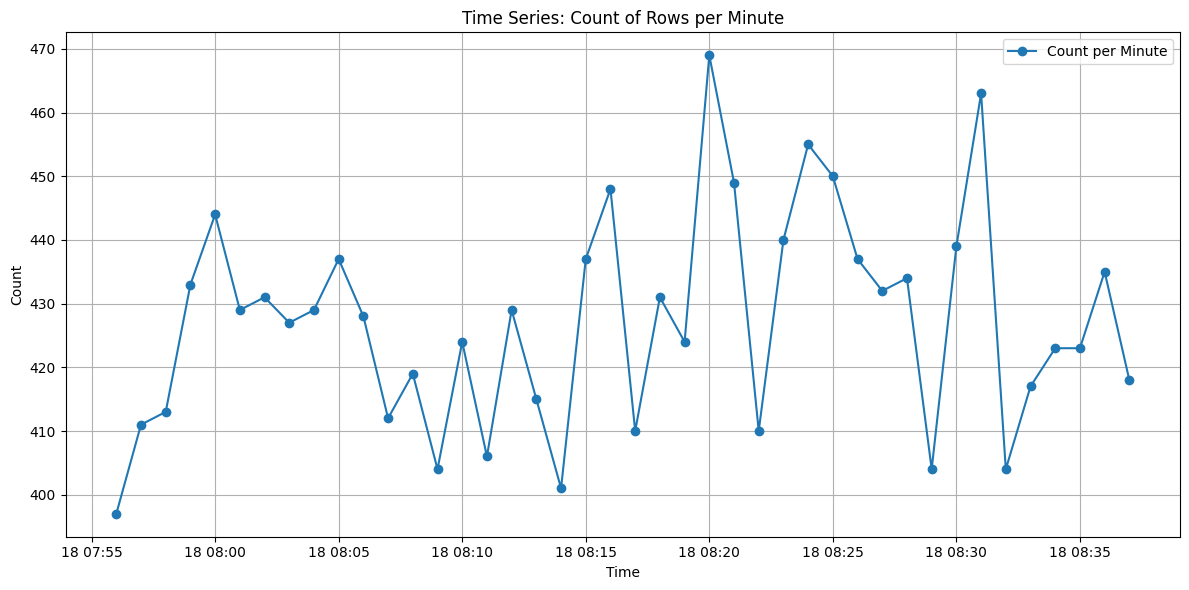

In [45]:
# Work on a copy of the DataFrame to avoid modifying the original
results_tracking_copy = results_tracking.copy()

# Ensure 'datetime' column is in datetime format
results_tracking_copy['datetime'] = pd.to_datetime(results_tracking_copy['datetime'])

# Resample data by minute and count rows
time_series = results_tracking_copy.set_index('datetime').resample('T').size()

# Convert the Series to a DataFrame with 'datetime' as a column
time_series_df = time_series.reset_index(name='count')

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['datetime'], time_series_df['count'], marker='o', linestyle='-', label='Count per Minute')

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Time Series: Count of Rows per Minute')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Which concludes the first section. **Questions? Ideas?**

---
---

# **HV scan**

As the HV varies, main magnitudes of the detector such as the efficiency or timing change. For a recent HV scan, we can get the following.

<ipython-input-46-a81d272deae4>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_df = pd.read_csv(file_path, delim_whitespace=True)


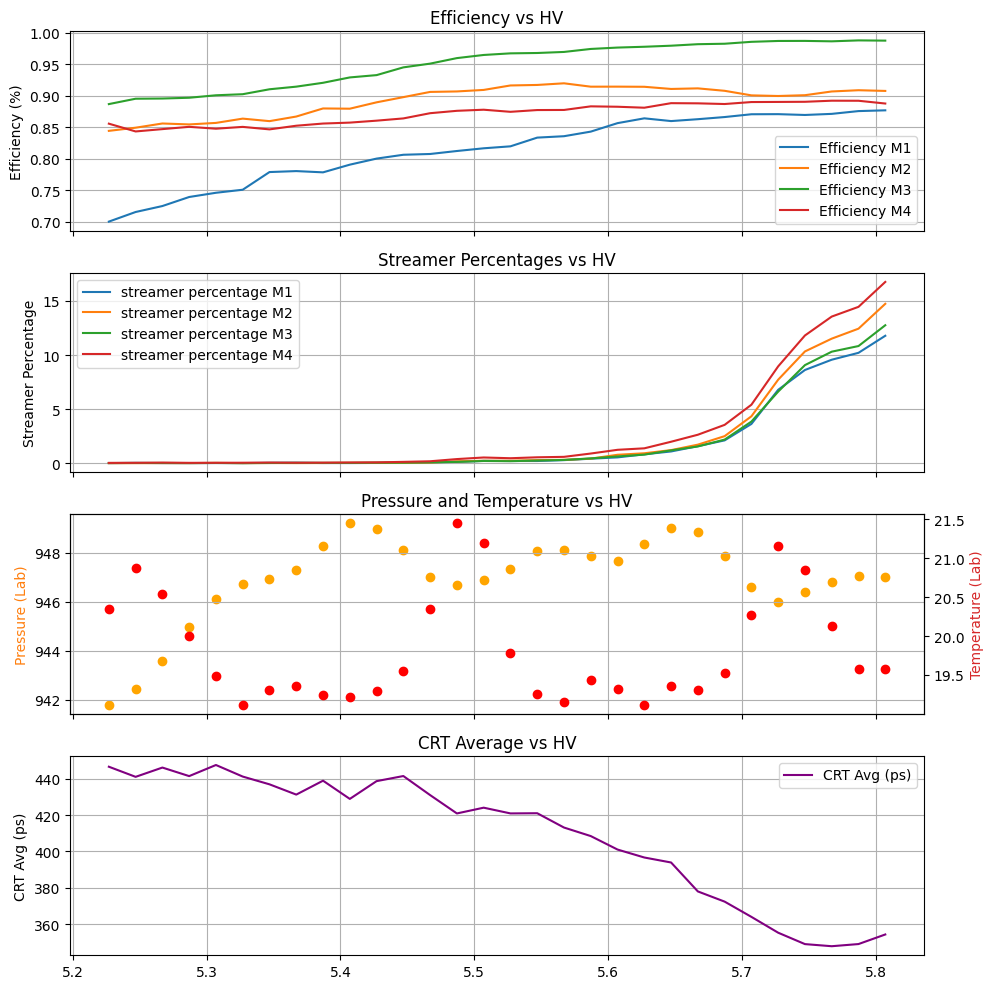

In [46]:
# Input data configuration
start_date = pd.to_datetime('2024-09-27 13:20:00')
end_date = pd.to_datetime('2024-09-30 01:45:00')
file_path = "/content/drive/My Drive/MRPC_DRD1_2024/DATA/accumulated_log_and_data.txt"

# Load and filter data
data_df = pd.read_csv(file_path, delim_whitespace=True)
data_df['time'] = pd.to_datetime(data_df['time'].str.strip('"'))
data_df = data_df[(data_df['time'] >= start_date) & (data_df['time'] <= end_date)]

# Group data by hv_mean and calculate the mean for numeric columns
numeric_cols = [
    'streamer_percentage_M1', 'streamer_percentage_M2', 'streamer_percentage_M3', 'streamer_percentage_M4',
    'global_efficiency', 'global_uncertainty', 'count', 'pressure_lab', 'temp_lab',
    'eff1', 'eff2', 'eff3', 'eff4'
]
numeric_cols.append('CRT_avg_mean')
data_grouped = data_df.groupby('hv_mean')[numeric_cols].mean()
hv = data_grouped.index

# Define smoothing function
def bin_and_average(hv, values, step_size=0.02):
    hv_bins = np.arange(hv.min(), hv.max() + step_size, step_size)
    hv_bin_centers = (hv_bins[:-1] + hv_bins[1:]) / 2
    binned_values = [
        np.nanmean(values[(hv >= hv_bins[i]) & (hv < hv_bins[i + 1])])
        for i in range(len(hv_bin_centers))
    ]
    return hv_bin_centers, np.array(binned_values)

# Smooth relevant columns
streamer_cols = ['streamer_percentage_M1', 'streamer_percentage_M2', 'streamer_percentage_M3', 'streamer_percentage_M4']
streamer_smooth = {col: bin_and_average(hv, data_grouped[col]) for col in streamer_cols}

pressure_centers, pressure_smooth = bin_and_average(hv, data_grouped['pressure_lab'])
temp_centers, temp_smooth = bin_and_average(hv, data_grouped['temp_lab'])

crt_centers, crt_smooth = bin_and_average(hv, data_grouped['CRT_avg_mean'])

# Plot data
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# Plot 1: Efficiency
axs[0].set_title('Efficiency vs HV')
axs[0].set_ylabel('Efficiency (%)')
# axs[0].set_ylim(0,1)
for i, eff_col in enumerate(['eff1', 'eff2', 'eff3', 'eff4'], 1):
    if eff_col in data_grouped:
        centers, smooth = bin_and_average(hv, data_grouped[eff_col])
        axs[0].plot(centers, smooth, label=f'Efficiency M{i}')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Streamer Percentages
axs[1].set_title('Streamer Percentages vs HV')
axs[1].set_ylabel('Streamer Percentage')
for col, (centers, smooth) in streamer_smooth.items():
    axs[1].plot(centers, smooth, label=col.replace('_', ' '))
axs[1].legend()
axs[1].grid(True)

# Plot 3: Pressure and Temperature
axs[2].set_title('Pressure and Temperature vs HV')
axs[2].set_ylabel('Pressure (Lab)', color='tab:orange')
axs[2].scatter(pressure_centers, pressure_smooth, label='Pressure', color='orange')
ax_temp = axs[2].twinx()
ax_temp.set_ylabel('Temperature (Lab)', color='tab:red')
ax_temp.scatter(temp_centers, temp_smooth, label='Temperature', color='red')
axs[2].grid(True)

# Plot 4: CRT Average
if 'CRT_avg_mean' in data_grouped:
    axs[3].set_title('CRT Average vs HV')
    axs[3].plot(crt_centers, crt_smooth * 1000, label='CRT Avg (ps)', color='purple')  # Convert to ps
    axs[3].set_ylabel('CRT Avg (ps)')
    axs[3].grid(True)
    axs[3].legend()

# Final adjustments
plt.xlabel('HV (Mean)')
plt.tight_layout()
plt.show()

### Which ends the Notebook.